# **CASO BELLABEAT** 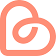

El siguiente proyecto lo he realizado como hito final del curso de Analista de Datos impartido por Google Certification Program. Se trata de realizar un análisis de datos para el equipo de Marketing de la empresa  Bellabeat, una empresa que fabrica productos tecnológicos de alto nivel, enfocados en el bienestar y salud de las mujeres.

**Fuente de datos**

https://www.kaggle.com/datasets/arashnic/fitbit

de Kaggle FitBit Fitness Tracker Data (conjunto de datos propiedad de https://www.kaggle.com/arashnic)
* 1 directorio comprimido de 334 MB
* 18 archivos .csv
* Se descartan 11, se analizarán 7 archivos
  * dailyActivity.csv
  * dailyCalories.csv
  * dailySteps.csv
  * heartrate_seconds.csv
  * hourlyIntensities.csv
  * sleepDay.csv
  * WeightLogInfo.csv




# 1. PROCESAR LOS DATOS.

Este primer paso se revisan y procesan los datos para luego limpiar, verificar, manipular y ordenarlos. Se dejan listos para el posterior Análisis

## Importamos los archivos seleccionados del dataset    

Se crea una variable por cada Dataframe importado:
* 'Activity'
* 'Calories'
* 'Steps'
* 'heart'
* 'Intensity'
* 'Sleep'
* 'Weight'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from scipy.stats import pearsonr
import statsmodels.api as sm

In [3]:
Activity = pd.read_csv("dailyActivity.csv", sep= ";")
Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        940 non-null    int64 
 1   ActivityDate              940 non-null    object
 2   TotalSteps                940 non-null    int64 
 3   TotalDistance             940 non-null    object
 4   TrackerDistance           940 non-null    object
 5   LoggedActivitiesDistance  940 non-null    object
 6   VeryActiveDistance        940 non-null    object
 7   ModeratelyActiveDistance  940 non-null    object
 8   LightActiveDistance       940 non-null    object
 9   SedentaryActiveDistance   940 non-null    object
 10  VeryActiveMinutes         940 non-null    int64 
 11  FairlyActiveMinutes       940 non-null    int64 
 12  LightlyActiveMinutes      940 non-null    int64 
 13  SedentaryMinutes          940 non-null    int64 
 14  Calories                  

In [4]:
Activity

Id ActivityDate  TotalSteps TotalDistance TrackerDistance  \
0    1503960366   04/12/2016       13162           8,5             8,5   
1    1503960366    4/13/2016       10735    6,96999979      6,96999979   
2    1503960366    4/14/2016       10460   6,739999771     6,739999771   
3    1503960366    4/15/2016        9762    6,28000021      6,28000021   
4    1503960366    4/16/2016       12669   8,159999847     8,159999847   
..          ...          ...         ...           ...             ...   
935  8877689391   05/08/2016       10686   8,109999657     8,109999657   
936  8877689391   05/09/2016       20226         18,25           18,25   
937  8877689391   05/10/2016       10733   8,149999619     8,149999619   
938  8877689391   05/11/2016       21420   19,55999947     19,55999947   
939  8877689391   05/12/2016        8064   6,119999886     6,119999886   

    LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance  \
0                          0        1,879999995              0,550000012   
1                          0        1,570000052              0,689999998   
2                          0        2,440000057              0,400000006   
3                          0        2,140000105               1,25999999   
4                          0        2,710000038              0,409999996   
..                       ...                ...                      ...   
935                        0        1,080000043              0,200000003   
936                        0        11,10000038              0,800000012   
937                        0        1,350000024              0,460000008   
938                        0        13,22000027              0,409999996   
939                        0        1,820000052              0,039999999   

    LightActiveDistance SedentaryActiveDistance  VeryActiveMinutes  \
0           6,059999943                       0                 25   
1           4,710000038                       0                 21   
2           3,910000086                       0                 30   
3           2,829999924                       0                 29   
4           5,039999962                       0                 36   
..                  ...                     ...                ...   
935         6,800000191                       0                 17   
936         6,239999771             0,050000001                 73   
937          6,28000021                       0                 18   
938         5,889999866                       0                 88   
939                4,25                       0                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

In [5]:
Calories = pd.read_csv("dailyCalories.csv")
Calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [6]:
heart=pd.read_csv("heartrate_seconds.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


Nos fijamos que en la 3ra columna 'Value' tiene una fila más que el restos de las dos columnas. Miraremos los primeras y ultimas filas del dataframe.

In [7]:
heart.head()

Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101

In [8]:
heart.tail()

Id                  Time  Value
2483653  8877689391  5/12/2016 2:43:53 PM     57
2483654  8877689391  5/12/2016 2:43:58 PM     56
2483655  8877689391  5/12/2016 2:44:03 PM     55
2483656  8877689391  5/12/2016 2:44:18 PM     55
2483657  8877689391  5/12/2016 2:44:28 PM     56

Efectivamente, la última fila carece de valor. La eliminamos

In [9]:
heart = heart.drop(heart.index[-1])
heart

Id                  Time  Value
0        2022484408  4/12/2016 7:21:00 AM     97
1        2022484408  4/12/2016 7:21:05 AM    102
2        2022484408  4/12/2016 7:21:10 AM    105
3        2022484408  4/12/2016 7:21:20 AM    103
4        2022484408  4/12/2016 7:21:25 AM    101
...             ...                   ...    ...
2483652  8877689391  5/12/2016 2:43:38 PM     58
2483653  8877689391  5/12/2016 2:43:53 PM     57
2483654  8877689391  5/12/2016 2:43:58 PM     56
2483655  8877689391  5/12/2016 2:44:03 PM     55
2483656  8877689391  5/12/2016 2:44:18 PM     55

[2483657 rows x 3 columns]

In [10]:
Intensity = pd.read_csv("hourlyIntensities.csv")
Intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [11]:
Intensity.head(5)

Id           ActivityHour  TotalIntensity  AverageIntensity
0  1503960366  4/12/2016 12:00:00 AM              20          0.333333
1  1503960366   4/12/2016 1:00:00 AM               8          0.133333
2  1503960366   4/12/2016 2:00:00 AM               7          0.116667
3  1503960366   4/12/2016 3:00:00 AM               0          0.000000
4  1503960366   4/12/2016 4:00:00 AM               0          0.000000

In [12]:
Steps = pd.read_csv("dailySteps.csv")
Steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [13]:
Steps.head(5)

Id ActivityDay  StepTotal
0  1503960366   4/12/2016      13162
1  1503960366   4/13/2016      10735
2  1503960366   4/14/2016      10460
3  1503960366   4/15/2016       9762
4  1503960366   4/16/2016      12669

In [14]:
Sleep = pd.read_csv("sleepDay.csv")
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [15]:
Sleep

Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2016 12:00:00 AM                  1                 327   
1    1503960366  4/13/2016 12:00:00 AM                  2                 384   
2    1503960366  4/15/2016 12:00:00 AM                  1                 412   
3    1503960366  4/16/2016 12:00:00 AM                  2                 340   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2016 12:00:00 AM                  1                 343   
409  8792009665   5/1/2016 12:00:00 AM                  1                 503   
410  8792009665   5/2/2016 12:00:00 AM                  1                 415   
411  8792009665   5/3/2016 12:00:00 AM                  1                 516   
412  8792009665   5/4/2016 12:00:00 AM                  1                 439   

     TotalTimeInBed  
0               346  
1               407  
2               442  
3               367  
4               712  
..              ...  
408             360  
409             527  
410             423  
411             545  
412             463  

[413 rows x 5 columns]

In [16]:
Weight = pd.read_csv("weightLogInfo.csv")
Weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


Se observa el tipo de datos que se encuentra en cada df con la función .info():
* Verificamos datos duplicados y nulos
* las columnas señaladas como fechas, están definidas como 'object', se debe cambiar
* en el dataset de 'Activity', hay varias columanas que deberían ser datos numéricos y están definidas como 'object', se debe cambiar
* en la tabla de 'Weight' se observan dos registros en la columna 'Fat', se elimina esta columna por poca aportación



## Duplicados y datos nulos

Se crea una función que verifique datos dúplicados de tabla en tabla.

In [17]:
dfs = [Activity, Calories, Intensity, Steps, Sleep, Weight, heart]

def check_duplicates(dfs):
    duplicates_dict = {}
    for i, df in enumerate(dfs):
        duplicates = df[df.duplicated()]
        duplicates_dict[f"DataFrame_{i+1}"] = duplicates
    return duplicates_dict

duplicates_dict = check_duplicates(dfs)

for key, value in duplicates_dict.items():
    print(f"Duplicates in {key}:")
    print(value)
    print()

Duplicates in DataFrame_1:
Empty DataFrame
Columns: [Id, ActivityDate, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories]
Index: []

Duplicates in DataFrame_2:
Empty DataFrame
Columns: [Id, ActivityDay, Calories]
Index: []

Duplicates in DataFrame_3:
Empty DataFrame
Columns: [Id, ActivityHour, TotalIntensity, AverageIntensity]
Index: []

Duplicates in DataFrame_4:
Empty DataFrame
Columns: [Id, ActivityDay, StepTotal]
Index: []

Duplicates in DataFrame_5:
             Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
161  4388161847   5/5/2016 12:00:00 AM                  1                 471   
223  4702921684   5/7/2016 12:00:00 AM                  1                 520   
380  8378563200  4/25/2016 12:00:00 AM                  1                 388   

     TotalTimeI

Se mantienen los datos, a pesar que en el df de 'Sleep' haya arrojado 3 registros duplicados.

Datos Nulos. Esta información se obtiene de la función .info()

Para Datos nulos o en blanco, verificamos el df 'Weight'

In [18]:
Weight

Id                   Date    WeightKg  WeightPounds   Fat  \
0   1503960366   5/2/2016 11:59:59 PM   52.599998    115.963147  22.0   
1   1503960366   5/3/2016 11:59:59 PM   52.599998    115.963147   NaN   
2   1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120   NaN   
3   2873212765  4/21/2016 11:59:59 PM   56.700001    125.002104   NaN   
4   2873212765  5/12/2016 11:59:59 PM   57.299999    126.324875   NaN   
..         ...                    ...         ...           ...   ...   
62  8877689391    5/6/2016 6:43:35 AM   85.000000    187.392923   NaN   
63  8877689391    5/8/2016 7:35:53 AM   85.400002    188.274775   NaN   
64  8877689391    5/9/2016 6:39:44 AM   85.500000    188.495234   NaN   
65  8877689391   5/11/2016 6:51:47 AM   85.400002    188.274775   NaN   
66  8877689391   5/12/2016 6:42:53 AM   84.000000    185.188300   NaN   

          BMI  IsManualReport          LogId  
0   22.650000            True  1462233599000  
1   22.650000            True  1462319999000  
2   47.540001           False  1460509732000  
3   21.450001            True  1461283199000  
4   21.690001            True  1463097599000  
..        ...             ...            ...  
62  25.440001           False  1462517015000  
63  25.559999           False  1462692953000  
64  25.610001           False  1462775984000  
65  25.559999           False  1462949507000  
66  25.139999           False  1463035373000  

[67 rows x 8 columns]

Deshechamos la columna 'Fat', porque no aporta valor con solo dos registros

In [19]:
# Deshechamos la columna 'Fat', porque no aporta valor con solo dos registros
Weight = Weight.drop('Fat', axis = 1)
Weight.head(10)

Id                   Date    WeightKg  WeightPounds        BMI  \
0  1503960366   5/2/2016 11:59:59 PM   52.599998    115.963147  22.650000   
1  1503960366   5/3/2016 11:59:59 PM   52.599998    115.963147  22.650000   
2  1927972279   4/13/2016 1:08:52 AM  133.500000    294.317120  47.540001   
3  2873212765  4/21/2016 11:59:59 PM   56.700001    125.002104  21.450001   
4  2873212765  5/12/2016 11:59:59 PM   57.299999    126.324875  21.690001   
5  4319703577  4/17/2016 11:59:59 PM   72.400002    159.614681  27.450001   
6  4319703577   5/4/2016 11:59:59 PM   72.300003    159.394222  27.379999   
7  4558609924  4/18/2016 11:59:59 PM   69.699997    153.662190  27.250000   
8  4558609924  4/25/2016 11:59:59 PM   70.300003    154.984977  27.459999   
9  4558609924   5/1/2016 11:59:59 PM   69.900002    154.103125  27.320000   

   IsManualReport          LogId  
0            True  1462233599000  
1            True  1462319999000  
2           False  1460509732000  
3            True  1461283199000  
4            True  1463097599000  
5            True  1460937599000  
6            True  1462406399000  
7            True  1461023999000  
8            True  1461628799000  
9            True  1462147199000

## Tipo de Datos

### FECHAS

Se dividen en dos grupos para tratarlos de forma diferente.
1. Fecha
2. Fecha y tiempo

In [20]:
Activity ['ActivityDate'] = pd.to_datetime(Activity['ActivityDate'])
Calories ['ActivityDay'] = pd.to_datetime(Calories['ActivityDay'])
Steps ['ActivityDay'] = pd.to_datetime(Steps['ActivityDay'] )

In [21]:
Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    object        
 4   TrackerDistance           940 non-null    object        
 5   LoggedActivitiesDistance  940 non-null    object        
 6   VeryActiveDistance        940 non-null    object        
 7   ModeratelyActiveDistance  940 non-null    object        
 8   LightActiveDistance       940 non-null    object        
 9   SedentaryActiveDistance   940 non-null    object        
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [22]:
Calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   Calories     940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [23]:
Steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   StepTotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [24]:
Steps.head(5)

Id ActivityDay  StepTotal
0  1503960366  2016-04-12      13162
1  1503960366  2016-04-13      10735
2  1503960366  2016-04-14      10460
3  1503960366  2016-04-15       9762
4  1503960366  2016-04-16      12669

In [25]:
Activity.head(5)

Id ActivityDate  TotalSteps TotalDistance TrackerDistance  \
0  1503960366   2016-04-12       13162           8,5             8,5   
1  1503960366   2016-04-13       10735    6,96999979      6,96999979   
2  1503960366   2016-04-14       10460   6,739999771     6,739999771   
3  1503960366   2016-04-15        9762    6,28000021      6,28000021   
4  1503960366   2016-04-16       12669   8,159999847     8,159999847   

  LoggedActivitiesDistance VeryActiveDistance ModeratelyActiveDistance  \
0                        0        1,879999995              0,550000012   
1                        0        1,570000052              0,689999998   
2                        0        2,440000057              0,400000006   
3                        0        2,140000105               1,25999999   
4                        0        2,710000038              0,409999996   

  LightActiveDistance SedentaryActiveDistance  VeryActiveMinutes  \
0         6,059999943                       0                 25   
1         4,710000038                       0                 21   
2         3,910000086                       0                 30   
3         2,829999924                       0                 29   
4         5,039999962                       0                 36   

   FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                   13                   328               728      1985  
1                   19                   217               776      1797  
2                   11                   181              1218      1776  
3                   34                   209               726      1745  
4                   10                   221               773      1863

2. Fechas con tiempo

In [26]:
Weight ['Date'] = pd.to_datetime(Weight['Date'], format= '%m/%d/%Y %H:%M:%S %p')

In [27]:
Weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   BMI             67 non-null     float64       
 5   IsManualReport  67 non-null     bool          
 6   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 3.3 KB


In [28]:
Weight

Id                Date    WeightKg  WeightPounds        BMI  \
0   1503960366 2016-05-02 11:59:59   52.599998    115.963147  22.650000   
1   1503960366 2016-05-03 11:59:59   52.599998    115.963147  22.650000   
2   1927972279 2016-04-13 01:08:52  133.500000    294.317120  47.540001   
3   2873212765 2016-04-21 11:59:59   56.700001    125.002104  21.450001   
4   2873212765 2016-05-12 11:59:59   57.299999    126.324875  21.690001   
..         ...                 ...         ...           ...        ...   
62  8877689391 2016-05-06 06:43:35   85.000000    187.392923  25.440001   
63  8877689391 2016-05-08 07:35:53   85.400002    188.274775  25.559999   
64  8877689391 2016-05-09 06:39:44   85.500000    188.495234  25.610001   
65  8877689391 2016-05-11 06:51:47   85.400002    188.274775  25.559999   
66  8877689391 2016-05-12 06:42:53   84.000000    185.188300  25.139999   

    IsManualReport          LogId  
0             True  1462233599000  
1             True  1462319999000  
2            False  1460509732000  
3             True  1461283199000  
4             True  1463097599000  
..             ...            ...  
62           False  1462517015000  
63           False  1462692953000  
64           False  1462775984000  
65           False  1462949507000  
66           False  1463035373000  

[67 rows x 7 columns]

In [29]:
Sleep ['SleepDay'] = pd.to_datetime(Sleep['SleepDay'], format = '%m/%d/%Y %H:%M:%S %p' )

In [30]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [31]:
Sleep

Id            SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12 12:00:00                  1                 327   
1    1503960366 2016-04-13 12:00:00                  2                 384   
2    1503960366 2016-04-15 12:00:00                  1                 412   
3    1503960366 2016-04-16 12:00:00                  2                 340   
4    1503960366 2016-04-17 12:00:00                  1                 700   
..          ...                 ...                ...                 ...   
408  8792009665 2016-04-30 12:00:00                  1                 343   
409  8792009665 2016-05-01 12:00:00                  1                 503   
410  8792009665 2016-05-02 12:00:00                  1                 415   
411  8792009665 2016-05-03 12:00:00                  1                 516   
412  8792009665 2016-05-04 12:00:00                  1                 439   

     TotalTimeInBed  
0               346  
1               407  
2               442  
3               367  
4               712  
..              ...  
408             360  
409             527  
410             423  
411             545  
412             463  

[413 rows x 5 columns]

### NUMERICO

Las columnas del dataset 'Activity' tienen una coma en vez de un punto para indicar los decimales.
Se debe de cambiar para poder seguir analizando.
A través de un bucle que itere en una lista de las columnas en cuestión se realiza el cambio

In [32]:
# List of columns to convert
columns_to_convert = [
    'TotalDistance',
    'TrackerDistance',
    'LoggedActivitiesDistance',
    'VeryActiveDistance',
    'ModeratelyActiveDistance',
    'LightActiveDistance',
    'SedentaryActiveDistance'
]

# Replace commas with dots (for decimal points) and convert to float
for column in columns_to_convert:
    Activity[column] = Activity[column].str.replace(',', '.').astype(float)

In [33]:
Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [34]:
Activity

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

In [35]:
heart

Id                  Time  Value
0        2022484408  4/12/2016 7:21:00 AM     97
1        2022484408  4/12/2016 7:21:05 AM    102
2        2022484408  4/12/2016 7:21:10 AM    105
3        2022484408  4/12/2016 7:21:20 AM    103
4        2022484408  4/12/2016 7:21:25 AM    101
...             ...                   ...    ...
2483652  8877689391  5/12/2016 2:43:38 PM     58
2483653  8877689391  5/12/2016 2:43:53 PM     57
2483654  8877689391  5/12/2016 2:43:58 PM     56
2483655  8877689391  5/12/2016 2:44:03 PM     55
2483656  8877689391  5/12/2016 2:44:18 PM     55

[2483657 rows x 3 columns]

In [36]:
#heart['Time'] = pd.to_datetime(heart['Time'], format ='%m/%d/%Y %H:%M:%S %p')
#Weight ['Date'] = pd.to_datetime(Weight['Date'], format= '%m/%d/%Y %H:%M:%S %p')
#Sleep ['SleepDay'] = pd.to_datetime(Sleep['SleepDay'], format = '%m/%d/%Y %H:%M:%S %p' )
heart['Time'] = pd.to_datetime(heart['Time'])


In [37]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483657 entries, 0 to 2483656
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


## Cantidad de Usuarios únicos



In [38]:
Id_heart = heart.Id.nunique()
Id_Activity = Activity.Id.nunique()
Id_Calories = Calories.Id.nunique()
Id_Step = Steps.Id.nunique()
Id_Sleep = Sleep.Id.nunique()
Id_Weight = Weight.Id.nunique()
Id_intensity = Intensity.Id.nunique()
data = {
    'DataFrame': ['heart', 'Activity', 'Calories' ,'Steps' , 'Sleep', 'Weight', 'Intensity'],
    'Usuarios_Registrados': [Id_heart, Id_Activity, Id_Calories, Id_Step, Id_Sleep, Id_Weight, Id_intensity],
}
Ususario_registrados = pd.DataFrame(data)

print( Ususario_registrados)

   DataFrame  Usuarios_Registrados
0      heart                    14
1   Activity                    33
2   Calories                    33
3      Steps                    33
4      Sleep                    24
5     Weight                     8
6  Intensity                    33


SE CONCLUYE EL 1ER PASO DE PROCESAR. LOS DATAFRAMES ESTAN LISTOS PARA SER ANALIZADOS

# ANALIZAMOS LOS DATOS

Para cada dataframe, se ralizaran varios pasos:
1. EDA (Exploratory Data Analysis)
2. Cambias formatos
3. Manipulación de los datos,
  * Crear otras columnas
  * Cálculos para obtener otros datos

Luego se analizará las variables y relación entre varios dataframes
4. Graficar variables y observar
  * relaciones,
  * distribuciones

## 'heart'

Exploramos su contenido

In [39]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483657 entries, 0 to 2483656
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 MB


Verificamos que los datos son como nos interesa para empezar el análisis.



*   Id , integer. Número de usuario
*   Time, datetime64. Fecha y hora de registro
*   Value, integer. Valor frecuencia cardíaca





In [40]:
heart

Id                Time  Value
0        2022484408 2016-04-12 07:21:00     97
1        2022484408 2016-04-12 07:21:05    102
2        2022484408 2016-04-12 07:21:10    105
3        2022484408 2016-04-12 07:21:20    103
4        2022484408 2016-04-12 07:21:25    101
...             ...                 ...    ...
2483652  8877689391 2016-05-12 14:43:38     58
2483653  8877689391 2016-05-12 14:43:53     57
2483654  8877689391 2016-05-12 14:43:58     56
2483655  8877689391 2016-05-12 14:44:03     55
2483656  8877689391 2016-05-12 14:44:18     55

[2483657 rows x 3 columns]

Cantidad de usuarios que registraron la Frecuencia Cardíaca.

In [41]:
heart.Id.nunique()

14

Cantidad de registros por usuario.

En un mes, 30 dias, cada usuario hizo registros indistintos del valor de la frecuencia cardíaca.

Veamos el promedio

In [42]:
Registro_Id = heart.Id.value_counts(ascending=True, dropna= False)
Promedio_Registro_Id = round(Registro_Id.mean())

print (Registro_Id, 'Promedio de registro: ', Promedio_Registro_Id)

Id
2026352035      2490
6775888955     32771
8792009665    122841
7007744171    133592
2347167796    152683
2022484408    154104
6117666160    158899
4558609924    192168
8877689391    228840
5577150313    248560
4388161847    249748
5553957443    255174
6962181067    266326
4020332650    285461
Name: count, dtype: int64 Promedio de registro:  177404


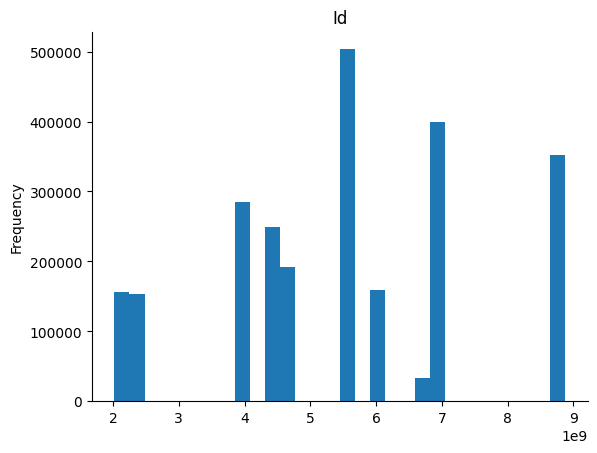

In [43]:
#Histograma los registros por Usuario
from matplotlib import pyplot as plt
heart['Id'].plot(kind='hist', bins=30, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

El histograma ayuda a visualizar cómo se distribuyen los diferentes Id en el DataFrame. Si los Id son únicos para cada individuo o para cada registro, el histograma puede mostrar si hay ciertos Id más frecuentes que otros o si están distribuidos de manera uniforme.

Ayuda a visualizar la distribución de Id en el conjunto de datos.

En este caso se observa que no es uniforme.

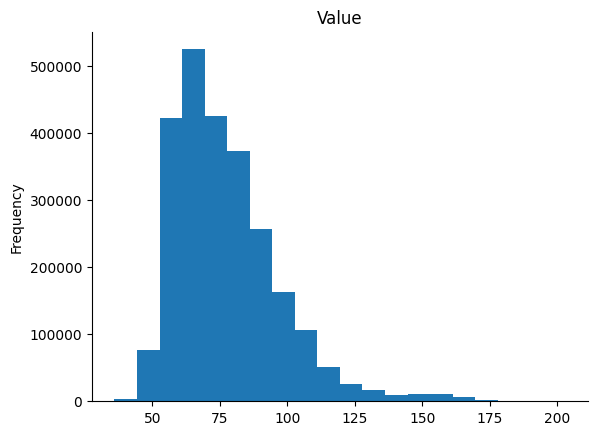

In [44]:
#Histograma de la frecuencia cardíaca
from matplotlib import pyplot as plt
heart['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

En el Histograma se visualiza que los valores de la frecuencia cardíaca se distribuyen uniformemente en el conjunto de datos. Concentrandose su mayor cantidad en un valor medio y en sus extremos (valores mínimos y máximos) en menor cantidad

Se puede considerar no analizar aquellos usuarios que hayan registrados poca actividad de la frecuencia cardíaca.

En tal caso, se aplican filtros.

Se renombra el dataset a 'heart_'

In [45]:
# heart_
usuarios = heart['Id'].value_counts()
usuarios_ = usuarios[usuarios>100000].index
heart_ = heart[heart['Id'].isin(usuarios_)]
heart_.Id.nunique()

12

In [46]:
Registro_Id2 = heart_.Id.value_counts(ascending=True, dropna= False)
Promedio_Registro_Id2 = round(Registro_Id2.mean())

print (Registro_Id2, 'Promedio de registros filtrado: ', Promedio_Registro_Id2)

Id
8792009665    122841
7007744171    133592
2347167796    152683
2022484408    154104
6117666160    158899
4558609924    192168
8877689391    228840
5577150313    248560
4388161847    249748
5553957443    255174
6962181067    266326
4020332650    285461
Name: count, dtype: int64 Promedio de registros filtrado:  204033


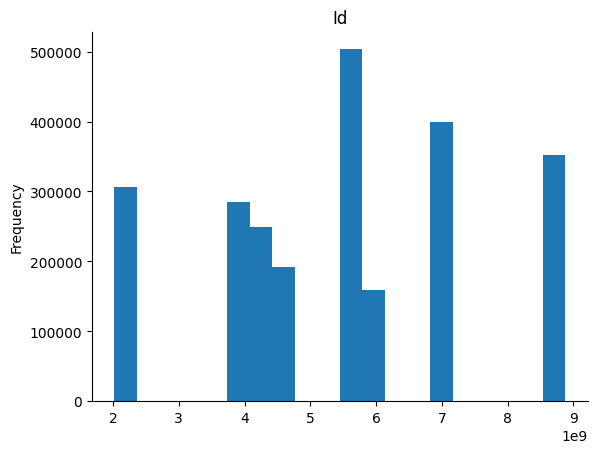

In [47]:
from matplotlib import pyplot as plt
heart_['Id'].plot(kind='hist', bins=20, title='Id')
plt.gca().spines[['top', 'right',]].set_visible(False)

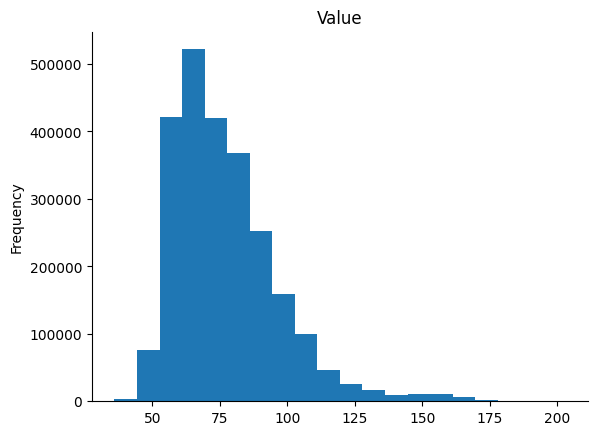

In [48]:
from matplotlib import pyplot as plt
heart_['Value'].plot(kind='hist', bins=20, title='Value')
plt.gca().spines[['top', 'right',]].set_visible(False)

Aplicamos Funciones de agregación para ver estadísticas del Conjunto

In [49]:
resultados = heart_.groupby(['Id']).agg(
   Cantidad_registro = ('Id', 'count'),
   valor_minimo=('Value', 'min'),
   valor_maximo=('Value', 'max'),
   media=('Value', 'mean')
).reset_index()

# Ordenar por Cantidad_registro
#resultados = resultados.sort_values(by='Cantidad_registro')
print(resultados)

            Id  Cantidad_registro  valor_minimo  valor_maximo      media
0   2022484408             154104            38           203  80.236860
1   2347167796             152683            49           195  76.722792
2   4020332650             285461            46           191  82.300577
3   4388161847             249748            39           180  66.132998
4   4558609924             192168            44           199  81.673947
5   5553957443             255174            47           165  68.633093
6   5577150313             248560            36           174  69.564516
7   6117666160             158899            52           189  83.749891
8   6962181067             266326            47           184  77.724045
9   7007744171             133592            54           166  91.123795
10  8792009665             122841            43           158  72.487484
11  8877689391             228840            46           180  83.611305


In [50]:
Prom_Max, Prom_Min, Prom_Media  = round(resultados[['valor_maximo','valor_minimo', 'media']].mean(),2)
print (Prom_Min, Prom_Max, Prom_Media)

45.08 182.0 77.83


Lo hacemos más preciso. Queremos ver las estadísticas por cada día y por cada usuario

In [52]:
#extraigo la fecha de la columna 'Time', creando otra columna 'Date'
heart_['Date'] = heart_['Time'].dt.date
heart_['Date'] = pd.to_datetime( heart_['Date'])
print(heart_)


<ipython-input-52-987759ba3c16>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_['Date'] = heart_['Time'].dt.date


                 Id                Time  Value       Date
0        2022484408 2016-04-12 07:21:00     97 2016-04-12
1        2022484408 2016-04-12 07:21:05    102 2016-04-12
2        2022484408 2016-04-12 07:21:10    105 2016-04-12
3        2022484408 2016-04-12 07:21:20    103 2016-04-12
4        2022484408 2016-04-12 07:21:25    101 2016-04-12
...             ...                 ...    ...        ...
2483652  8877689391 2016-05-12 14:43:38     58 2016-05-12
2483653  8877689391 2016-05-12 14:43:53     57 2016-05-12
2483654  8877689391 2016-05-12 14:43:58     56 2016-05-12
2483655  8877689391 2016-05-12 14:44:03     55 2016-05-12
2483656  8877689391 2016-05-12 14:44:18     55 2016-05-12

[2448396 rows x 4 columns]


<ipython-input-52-987759ba3c16>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_['Date'] = pd.to_datetime( heart_['Date'])


Ahora mostramos resultados

In [53]:
resultados1 = heart_.groupby(['Id', 'Date']).agg(
   Cantidad_registro = ('Id', 'count'),
   valor_minimo=('Value', 'min'),
   valor_maximo=('Value', 'max'),
   media= ('Value', 'mean')
).reset_index()
print(resultados1)

             Id       Date  Cantidad_registro  valor_minimo  valor_maximo  \
0    2022484408 2016-04-12               4836            52           134   
1    2022484408 2016-04-13               5332            51           156   
2    2022484408 2016-04-14               5560            50           127   
3    2022484408 2016-04-15               5302            53           189   
4    2022484408 2016-04-16               3143            49           136   
..          ...        ...                ...           ...           ...   
307  8877689391 2016-05-08               6403            54           137   
308  8877689391 2016-05-09               7612            51           176   
309  8877689391 2016-05-10               6242            50           141   
310  8877689391 2016-05-11               7913            48           180   
311  8877689391 2016-05-12               3510            53           122   

         media  
0    75.804177  
1    80.337584  
2    72.628597  
3    80

Obtenemos la cantidad de días que registró de cada Usuario

In [54]:
#Dias registrados: 'Days'
day_perUser = heart_.groupby('Id')['Date'].nunique().reset_index()
day_perUser.columns = ['Id', 'Days']
day_perUser

Id  Days
0   2022484408    31
1   2347167796    18
2   4020332650    16
3   4388161847    30
4   4558609924    31
5   5553957443    31
6   5577150313    28
7   6117666160    23
8   6962181067    31
9   7007744171    24
10  8792009665    18
11  8877689391    31

Unimos todos los resultados resumidos

In [55]:
# @title Summary Heart
Summary_Heart = pd.merge(day_perUser, resultados, on='Id')
print(Summary_Heart)

            Id  Days  Cantidad_registro  valor_minimo  valor_maximo      media
0   2022484408    31             154104            38           203  80.236860
1   2347167796    18             152683            49           195  76.722792
2   4020332650    16             285461            46           191  82.300577
3   4388161847    30             249748            39           180  66.132998
4   4558609924    31             192168            44           199  81.673947
5   5553957443    31             255174            47           165  68.633093
6   5577150313    28             248560            36           174  69.564516
7   6117666160    23             158899            52           189  83.749891
8   6962181067    31             266326            47           184  77.724045
9   7007744171    24             133592            54           166  91.123795
10  8792009665    18             122841            43           158  72.487484
11  8877689391    31             228840            4

In [56]:
stats_heart = Summary_Heart.describe()
stats_heart

Id       Days  Cantidad_registro  valor_minimo  valor_maximo  \
count  1.200000e+01  12.000000          12.000000     12.000000     12.000000   
mean   5.518763e+09  26.000000      204033.000000     45.083333    182.000000   
std    2.203072e+09   5.923758       57742.295971      5.451577     14.225457   
min    2.022484e+09  16.000000      122841.000000     36.000000    158.000000   
25%    4.296205e+09  21.750000      153748.750000     42.000000    172.000000   
50%    5.565554e+09  29.000000      210504.000000     46.000000    182.000000   
75%    6.973572e+09  31.000000      251104.500000     47.500000    192.000000   
max    8.877689e+09  31.000000      285461.000000     54.000000    203.000000   

           media  
count  12.000000  
mean   77.830108  
std     7.417727  
min    66.132998  
25%    71.756742  
50%    78.980452  
75%    82.628259  
max    91.123795

Convierto los resultados obtenidos en un archivo CSV para importar a PowerBI

In [57]:
# @title Creación de archivo .csv
df_results = pd.DataFrame(resultados1)
df_results.to_csv('heartrate_etlPython.csv')
df_results1 = pd.DataFrame(Summary_Heart)
df_results1.to_csv('heartrate_etlPython_summary.csv')

In [58]:
daily_summary_heart = heart_.groupby(['Id', 'Date'])['Value'].describe()
daily_summary_heart


count       mean        std   min   25%   50%   75%  \
Id         Date                                                               
2022484408 2016-04-12  4836.0  75.804177  16.291651  52.0  63.0  72.0  84.0   
           2016-04-13  5332.0  80.337584  18.193237  51.0  67.0  76.0  89.0   
           2016-04-14  5560.0  72.628597  13.482281  50.0  62.0  70.0  81.0   
           2016-04-15  5302.0  80.437382  17.901124  53.0  69.0  76.0  88.0   
           2016-04-16  3143.0  75.960547  16.745189  49.0  63.0  71.0  85.0   
...                       ...        ...        ...   ...   ...   ...   ...   
8877689391 2016-05-08  6403.0  72.550523  11.029599  54.0  65.0  70.0  77.0   
           2016-05-09  7612.0  89.615738  34.751877  51.0  65.0  78.0  92.0   
           2016-05-10  6242.0  71.544377  12.071133  50.0  64.0  69.0  75.0   
           2016-05-11  7913.0  89.149122  37.410929  48.0  63.0  74.0  93.0   
           2016-05-12  3510.0  71.091738  13.951862  53.0  61.0  66.0  78.0   

                         max  
Id         Date               
2022484408 2016-04-12  134.0  
           2016-04-13  156.0  
           2016-04-14  127.0  
           2016-04-15  189.0  
           2016-04-16  136.0  
...                      ...  
8877689391 2016-05-08  137.0  
           2016-05-09  176.0  
           2016-05-10  141.0  
           2016-05-11  180.0  
           2016-05-12  122.0  

[312 rows x 8 columns]

**Graficamos comportamiento de los registros de la frecuencia cardíaca**.

1. Seleccionamos aleatoriamente 3 usuarios

In [59]:
heart_

Id                Time  Value       Date
0        2022484408 2016-04-12 07:21:00     97 2016-04-12
1        2022484408 2016-04-12 07:21:05    102 2016-04-12
2        2022484408 2016-04-12 07:21:10    105 2016-04-12
3        2022484408 2016-04-12 07:21:20    103 2016-04-12
4        2022484408 2016-04-12 07:21:25    101 2016-04-12
...             ...                 ...    ...        ...
2483652  8877689391 2016-05-12 14:43:38     58 2016-05-12
2483653  8877689391 2016-05-12 14:43:53     57 2016-05-12
2483654  8877689391 2016-05-12 14:43:58     56 2016-05-12
2483655  8877689391 2016-05-12 14:44:03     55 2016-05-12
2483656  8877689391 2016-05-12 14:44:18     55 2016-05-12

[2448396 rows x 4 columns]

In [60]:
user_ids = heart_['Id'].unique()

# Verificar que hay al menos 3 IDs únicos
if len(user_ids) >= 3:
    user_1, user_2, user_3 = user_ids[0], user_ids[1], user_ids[2]
else:
    print(f"Error: Se necesitan al menos 3 IDs únicos, pero solo se encontraron {len(user_ids)}.")
    user_1, user_2, user_3 = None, None, None


Extraemos la hora del registro para observar el comportamiento en un día y luego comparar contra la Intensidad de los ejercicios realizados

In [61]:
'''
Intensity['ActivityHour'] = pd.to_datetime( Intensity['ActivityHour']) #confirmamos que esta variable sea del tipo datetime
Intensity['Date'] = Intensity['ActivityHour'].dt.date #extraemos la fecha de la columna del tiempo
Intensity['Date'] = pd.to_datetime( Intensity['Date']) #confirmamos que la columna 'date' es del tipo datetime

# Extraer la hora
Intensity['Hour'] = Intensity['ActivityHour'].dt.time #extraemos la hora de la columna del tiempo
Intensity['Hour'] = Intensity['ActivityHour'].dt.strftime('%H:%M:%S') #confirmamos el formato de la columna 'hour', pero es de tipo string

'''
# 'Date' ya se había extraido de la columna original 'Time'
#heart_['Date'] =  pd.to_datetime(heart_['Date']) #confirmamos que la columna 'date' es del tipo datetime

# Extraer la hora
heart_['Hour'] = heart_['Time'].dt.time #extraemos la hora de la columna del tiempo
heart_['Hour'] = heart_['Time'].dt.strftime('%H:%M:%S') #confirmamos que la columna 'hour' es del tipo datetime
heart_.info()

<ipython-input-61-01b0391134da>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_['Hour'] = heart_['Time'].dt.time #extraemos la hora de la columna del tiempo


<class 'pandas.core.frame.DataFrame'>
Index: 2448396 entries, 0 to 2483656
Data columns (total 5 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Id      int64         
 1   Time    datetime64[ns]
 2   Value   int64         
 3   Date    datetime64[ns]
 4   Hour    object        
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 112.1+ MB


<ipython-input-61-01b0391134da>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_['Hour'] = heart_['Time'].dt.strftime('%H:%M:%S') #confirmamos que la columna 'hour' es del tipo datetime


In [62]:
heart_

Id                Time  Value       Date      Hour
0        2022484408 2016-04-12 07:21:00     97 2016-04-12  07:21:00
1        2022484408 2016-04-12 07:21:05    102 2016-04-12  07:21:05
2        2022484408 2016-04-12 07:21:10    105 2016-04-12  07:21:10
3        2022484408 2016-04-12 07:21:20    103 2016-04-12  07:21:20
4        2022484408 2016-04-12 07:21:25    101 2016-04-12  07:21:25
...             ...                 ...    ...        ...       ...
2483652  8877689391 2016-05-12 14:43:38     58 2016-05-12  14:43:38
2483653  8877689391 2016-05-12 14:43:53     57 2016-05-12  14:43:53
2483654  8877689391 2016-05-12 14:43:58     56 2016-05-12  14:43:58
2483655  8877689391 2016-05-12 14:44:03     55 2016-05-12  14:44:03
2483656  8877689391 2016-05-12 14:44:18     55 2016-05-12  14:44:18

[2448396 rows x 5 columns]

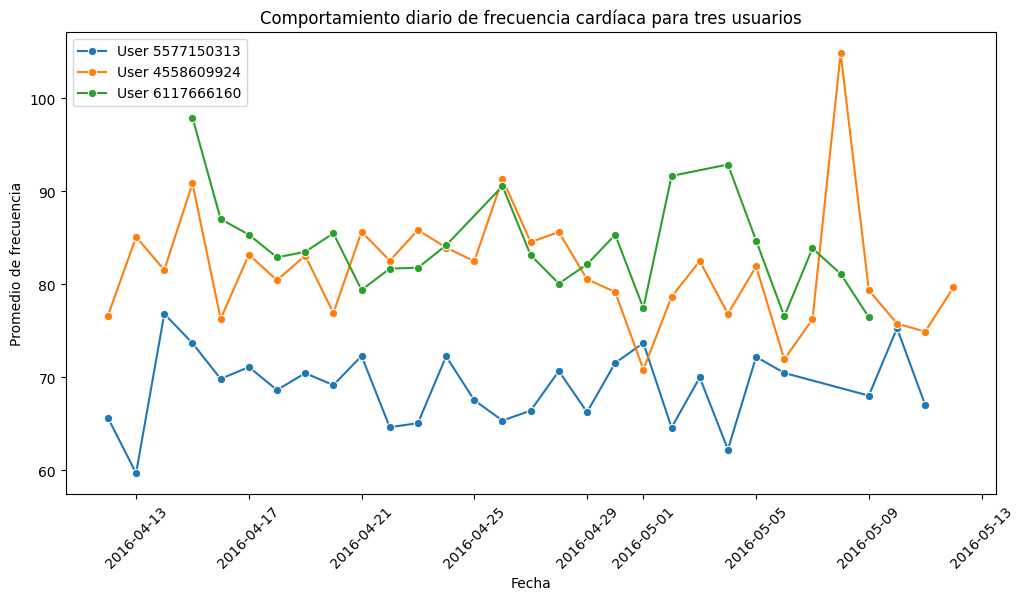

In [63]:
# @title Grafico comportamiento de la Frecuencia cardíaca

#si queremos que los Id´s sean aleatorios
random_ids = np.random.choice(heart_['Id'].unique(), size=3, replace=False)
id1_h, id2_h, id3_h = random_ids

# Agrupar por fecha e Id y calcular el promedio de 'Value' para los dos usuarios
daily_summary_user_1 = heart_[heart_['Id'] == id1_h].groupby('Date')['Value'].mean().reset_index()
daily_summary_user_2 = heart_[heart_['Id'] == id2_h].groupby('Date')['Value'].mean().reset_index()
daily_summary_user_3 = heart_[heart_['Id'] == id3_h].groupby('Date')['Value'].mean().reset_index()


# Graficar el comportamiento diario de 'Value' para los dos usuarios
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary_user_1, x='Date', y='Value', marker='o', label=f'User {id1_h}')
sns.lineplot(data=daily_summary_user_2, x='Date', y='Value', marker='o', label=f'User {id2_h}')
sns.lineplot(data=daily_summary_user_3, x='Date', y='Value', marker='o', label=f'User {id3_h}')

plt.title('Comportamiento diario de frecuencia cardíaca para tres usuarios')
plt.xlabel('Fecha')
plt.ylabel('Promedio de frecuencia')
plt.legend()
plt.xticks(rotation=45)
plt.show()


2. Seleccionando ID especificos

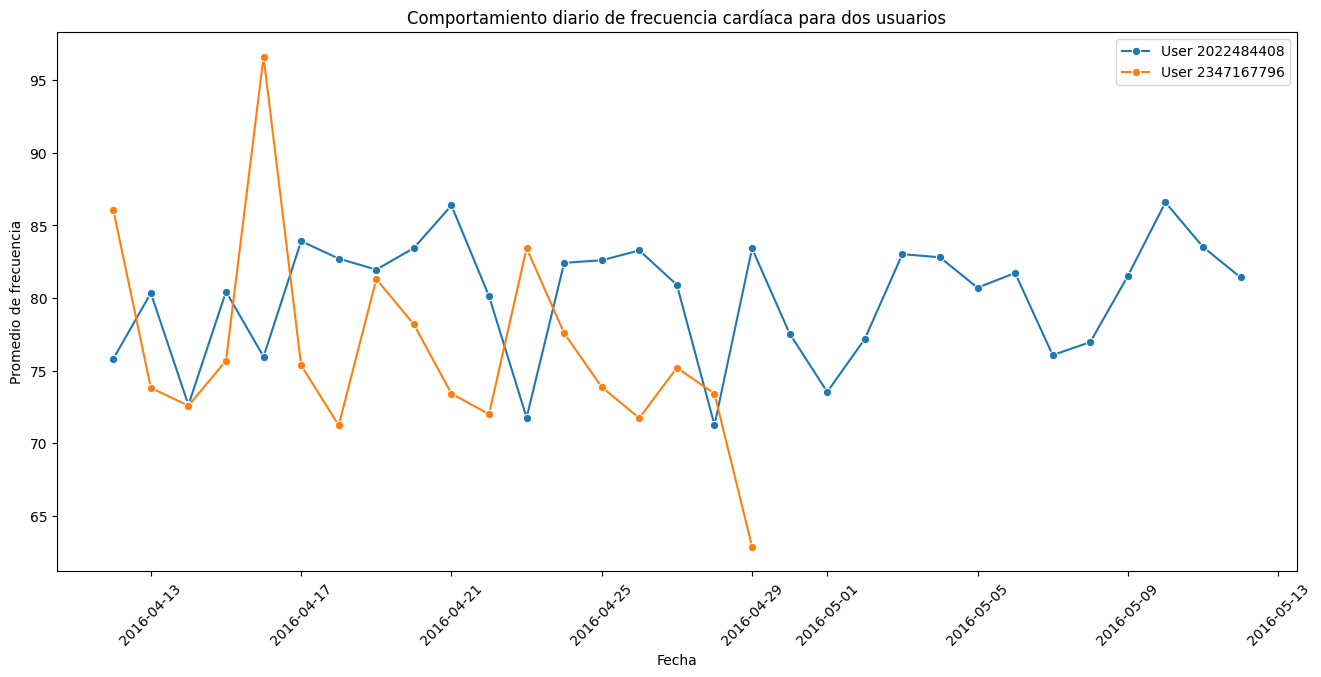

In [64]:
# Seleccionar dos o tres IDs

user_ids = heart_['Id'].unique()[:3]  # Selecciona los primeros dos IDs únicos
user_1, user_2, user_3 = user_ids[0], user_ids[1], user_ids[2]
'''
# Seleccionar dos IDs específicos
user_ids = heart_['Id'].unique()  # Seleccionar
user_1, user_2 = user_ids[0], user_ids[3]
'''
# Agrupar por fecha e Id y calcular el promedio de 'Value' para los dos usuarios
daily_summary_user_1 = heart_[heart_['Id'] == user_1].groupby('Date')['Value'].mean().reset_index()
daily_summary_user_2 = heart_[heart_['Id'] == user_2].groupby('Date')['Value'].mean().reset_index()

# Graficar el comportamiento diario de 'Value' para los dos usuarios
plt.figure(figsize=(16, 7)) #plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_summary_user_1, x='Date', y='Value', marker='o', label=f'User {user_1}')
sns.lineplot(data=daily_summary_user_2, x='Date', y='Value', marker='o', label=f'User {user_2}')


plt.title('Comportamiento diario de frecuencia cardíaca para dos usuarios')
plt.xlabel('Fecha')
plt.ylabel('Promedio de frecuencia')
plt.legend()
plt.xticks(rotation=45)
plt.show()


Vemos el comportamiento por día de la semana.

Extraemos de las fechas, los días de la semana


In [65]:
# @title Gráfico de la Frecuencia por usuario/dia o mes
'''
# Seleccionar un ID y una fecha específicos
specific_id_h = 2022484408
Date_ = '2016-04-12'

# Filtrar los datos
Data_specific_h = heart_[(heart_['Id'] == specific_id_h) & (heart_['Date'] == Date_)]

# Graficar el comportamiento de la Frecuencia en un día específico
plt.figure(figsize=(12, 6))
sns.lineplot(data=Data_specific_h, x='Hour', y='Value', marker='o')

# Agregar título y etiquetas
plt.title(f'Comportamiento de la Frecuencia cardíaca durante el DIA: {specific_id_h} / {Date_}')
plt.xlabel('Hora del Día')
plt.ylabel('Valor de la frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
'''

"\n# Seleccionar un ID y una fecha específicos\nspecific_id_h = 2022484408\nDate_ = '2016-04-12'\n\n# Filtrar los datos\nData_specific_h = heart_[(heart_['Id'] == specific_id_h) & (heart_['Date'] == Date_)]\n\n# Graficar el comportamiento de la Frecuencia en un día específico\nplt.figure(figsize=(12, 6))\nsns.lineplot(data=Data_specific_h, x='Hour', y='Value', marker='o')\n\n# Agregar título y etiquetas\nplt.title(f'Comportamiento de la Frecuencia cardíaca durante el DIA: {specific_id_h} / {Date_}')\nplt.xlabel('Hora del Día')\nplt.ylabel('Valor de la frecuencia')\nplt.xticks(rotation=45)\nplt.grid(True)\nplt.show()\n"

Otra forma de obtener los resultados, partiendo del archivo original sin filtrar

In [66]:
#extraigo la fecha de la columna 'Time', creando otra columna 'Date'
heart['Date'] = heart['Time'].dt.date
day_perUser_original = heart.groupby('Id')['Date'].nunique().reset_index()
# Ordenar por Cantidad_registro
#resultados2 = resultados2.sort_values(by='Date')
day_perUser_original.columns = ['Id', 'Days']
print(day_perUser_original)

            Id  Days
0   2022484408    31
1   2026352035     4
2   2347167796    18
3   4020332650    16
4   4388161847    30
5   4558609924    31
6   5553957443    31
7   5577150313    28
8   6117666160    23
9   6775888955    18
10  6962181067    31
11  7007744171    24
12  8792009665    18
13  8877689391    31


In [67]:
#extraigo la fecha de la columna 'Time', creando otra columna 'Date'
heart['Date'] = heart['Time'].dt.date
print(heart)

                 Id                Time  Value        Date
0        2022484408 2016-04-12 07:21:00     97  2016-04-12
1        2022484408 2016-04-12 07:21:05    102  2016-04-12
2        2022484408 2016-04-12 07:21:10    105  2016-04-12
3        2022484408 2016-04-12 07:21:20    103  2016-04-12
4        2022484408 2016-04-12 07:21:25    101  2016-04-12
...             ...                 ...    ...         ...
2483652  8877689391 2016-05-12 14:43:38     58  2016-05-12
2483653  8877689391 2016-05-12 14:43:53     57  2016-05-12
2483654  8877689391 2016-05-12 14:43:58     56  2016-05-12
2483655  8877689391 2016-05-12 14:44:03     55  2016-05-12
2483656  8877689391 2016-05-12 14:44:18     55  2016-05-12

[2483657 rows x 4 columns]


In [68]:
resultados2_originales = heart.groupby('Id').agg(
   Cantidad_registro = ('Id', 'count'),
   valor_minimo=('Value', 'min'),
   valor_maximo=('Value', 'max'),
   media=('Value', 'mean')
).reset_index()

print(resultados2_originales)

            Id  Cantidad_registro  valor_minimo  valor_maximo      media
0   2022484408             154104            38           203  80.236860
1   2026352035               2490            63           125  93.776305
2   2347167796             152683            49           195  76.722792
3   4020332650             285461            46           191  82.300577
4   4388161847             249748            39           180  66.132998
5   4558609924             192168            44           199  81.673947
6   5553957443             255174            47           165  68.633093
7   5577150313             248560            36           174  69.564516
8   6117666160             158899            52           189  83.749891
9   6775888955              32771            55           177  92.029630
10  6962181067             266326            47           184  77.724045
11  7007744171             133592            54           166  91.123795
12  8792009665             122841            43    

In [69]:
resultados_originales = heart.groupby(['Id', 'Date']).agg(
   Cantidad_registro = ('Id', 'count'),
   valor_minimo=('Value', 'min'),
   valor_maximo=('Value', 'max'),
   media=('Value', 'mean')
).reset_index()

print(resultados_originales)

             Id        Date  Cantidad_registro  valor_minimo  valor_maximo  \
0    2022484408  2016-04-12               4836            52           134   
1    2022484408  2016-04-13               5332            51           156   
2    2022484408  2016-04-14               5560            50           127   
3    2022484408  2016-04-15               5302            53           189   
4    2022484408  2016-04-16               3143            49           136   
..          ...         ...                ...           ...           ...   
329  8877689391  2016-05-08               6403            54           137   
330  8877689391  2016-05-09               7612            51           176   
331  8877689391  2016-05-10               6242            50           141   
332  8877689391  2016-05-11               7913            48           180   
333  8877689391  2016-05-12               3510            53           122   

         media  
0    75.804177  
1    80.337584  
2    72.6285

In [70]:
Summary_Heart_original = pd.merge(day_perUser_original, resultados2_originales, on='Id')
print(Summary_Heart_original)

            Id  Days  Cantidad_registro  valor_minimo  valor_maximo      media
0   2022484408    31             154104            38           203  80.236860
1   2026352035     4               2490            63           125  93.776305
2   2347167796    18             152683            49           195  76.722792
3   4020332650    16             285461            46           191  82.300577
4   4388161847    30             249748            39           180  66.132998
5   4558609924    31             192168            44           199  81.673947
6   5553957443    31             255174            47           165  68.633093
7   5577150313    28             248560            36           174  69.564516
8   6117666160    23             158899            52           189  83.749891
9   6775888955    18              32771            55           177  92.029630
10  6962181067    31             266326            47           184  77.724045
11  7007744171    24             133592            5

In [71]:
Verifica =  pd.merge(day_perUser_original, day_perUser, how = 'outer' ,on='Id')
Verifica

Id  Days_x  Days_y
0   2022484408      31    31.0
1   2026352035       4     NaN
2   2347167796      18    18.0
3   4020332650      16    16.0
4   4388161847      30    30.0
5   4558609924      31    31.0
6   5553957443      31    31.0
7   5577150313      28    28.0
8   6117666160      23    23.0
9   6775888955      18     NaN
10  6962181067      31    31.0
11  7007744171      24    24.0
12  8792009665      18    18.0
13  8877689391      31    31.0

In [72]:
# Otra forma de contabilizar el registro por Id y Día, directo del archivo original
records_per_day = heart.groupby(['Id', 'Date']).size().reset_index(name='RecordsPerDay')
print(records_per_day)

             Id        Date  RecordsPerDay
0    2022484408  2016-04-12           4836
1    2022484408  2016-04-13           5332
2    2022484408  2016-04-14           5560
3    2022484408  2016-04-15           5302
4    2022484408  2016-04-16           3143
..          ...         ...            ...
329  8877689391  2016-05-08           6403
330  8877689391  2016-05-09           7612
331  8877689391  2016-05-10           6242
332  8877689391  2016-05-11           7913
333  8877689391  2016-05-12           3510

[334 rows x 3 columns]


JOIN OPERATIONS

In [73]:
 merged_df = pd.merge(Steps, Calories, on='Id', how='outer')

# Continue joining the remaining DataFrames
# merged_df = pd.merge(merged_df, Activity, on='Id', how='inner')
# merged_df = pd.merge(merged_df, df4, on='Id', how='inner')
# merged_df = pd.merge(merged_df, df5, on='Id', how='inner')

In [74]:
print (merged_df)

               Id ActivityDay_x  StepTotal ActivityDay_y  Calories
0      1503960366    2016-04-12      13162    2016-04-12      1985
1      1503960366    2016-04-12      13162    2016-04-13      1797
2      1503960366    2016-04-12      13162    2016-04-14      1776
3      1503960366    2016-04-12      13162    2016-04-15      1745
4      1503960366    2016-04-12      13162    2016-04-16      1863
...           ...           ...        ...           ...       ...
27795  8877689391    2016-05-12       8064    2016-05-08      2847
27796  8877689391    2016-05-12       8064    2016-05-09      3710
27797  8877689391    2016-05-12       8064    2016-05-10      2832
27798  8877689391    2016-05-12       8064    2016-05-11      3832
27799  8877689391    2016-05-12       8064    2016-05-12      1849

[27800 rows x 5 columns]


## 'Activity'

Con el dataset 'Activity' buscamos diferentes relaciones entre los campos que se muestran.


1. Calorías vs DistanciaTotal
2. Calorias vs Steps
3. Steps vs Distance
4. Histograma de los valores

Exploramos su contenido

In [75]:
Activity

Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0    1503960366   2016-04-12       13162       8.500000         8.500000   
1    1503960366   2016-04-13       10735       6.970000         6.970000   
2    1503960366   2016-04-14       10460       6.740000         6.740000   
3    1503960366   2016-04-15        9762       6.280000         6.280000   
4    1503960366   2016-04-16       12669       8.160000         8.160000   
..          ...          ...         ...            ...              ...   
935  8877689391   2016-05-08       10686       8.110000         8.110000   
936  8877689391   2016-05-09       20226      18.250000        18.250000   
937  8877689391   2016-05-10       10733       8.150000         8.150000   
938  8877689391   2016-05-11       21420      19.559999        19.559999   
939  8877689391   2016-05-12        8064       6.120000         6.120000   

     LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                         0.0                1.88                      0.55   
1                         0.0                1.57                      0.69   
2                         0.0                2.44                      0.40   
3                         0.0                2.14                      1.26   
4                         0.0                2.71                      0.41   
..                        ...                 ...                       ...   
935                       0.0                1.08                      0.20   
936                       0.0               11.10                      0.80   
937                       0.0                1.35                      0.46   
938                       0.0               13.22                      0.41   
939                       0.0                1.82                      0.04   

     LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                   6.06                     0.00                 25   
1                   4.71                     0.00                 21   
2                   3.91                     0.00                 30   
3                   2.83                     0.00                 29   
4                   5.04                     0.00                 36   
..                   ...                      ...                ...   
935                 6.80                     0.00                 17   
936                 6.24                     0.05                 73   
937                 6.28                     0.00                 18   
938                 5.89                     0.00                 88   
939                 4.25                     0.00                 23   

     FairlyActiveMinutes  LightlyActiveMinutes  SedentaryMinutes  Calories  
0                     13                   328               728      1985  
1                     19                   217               776      1797  
2                     11                   181              1218      1776  
3                     34                   209               726      1745  
4                     10                   221               773      1863  
..                   ...                   ...               ...       ...  
935                    4                   245              1174      2847  
936                   19                   217              1131      3710  
937                   11                   224              1187      2832  
938                   12                   213              1127      3832  
939                    1                   137               770      1849  

[940 rows x 15 columns]

In [76]:
Registro_Id_activity = Activity.Id.value_counts(ascending=True, dropna= False)
Promedio_Registro_Id_activity = round(Registro_Id_activity.mean())

print (Registro_Id_activity, 'Promedio de registro: ', Promedio_Registro_Id_activity)

Id
4057192912     4
2347167796    18
8253242879    19
3372868164    20
7007744171    26
6775888955    26
6117666160    28
8792009665    29
6290855005    29
1644430081    30
5577150313    30
3977333714    30
1503960366    31
6962181067    31
8053475328    31
8378563200    31
8583815059    31
7086361926    31
5553957443    31
4445114986    31
4558609924    31
4388161847    31
4319703577    31
4020332650    31
2873212765    31
2320127002    31
2026352035    31
2022484408    31
1927972279    31
1844505072    31
1624580081    31
4702921684    31
8877689391    31
Name: count, dtype: int64 Promedio de registro:  28


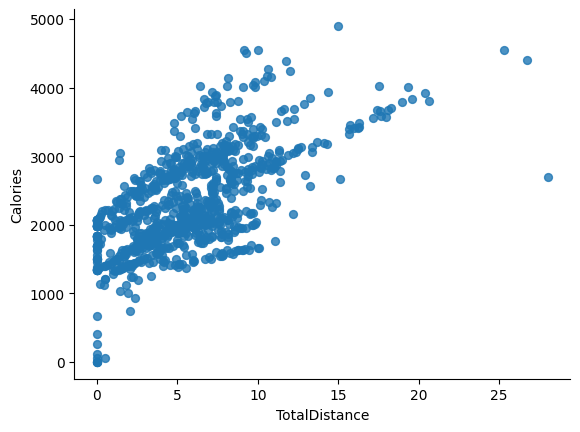

In [77]:
# @title 1.Distance vs Calories
Activity.plot(kind='scatter', x='TotalDistance', y='Calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [78]:
# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(Activity['TotalDistance'], Activity['Calories'])
print(f'Pearson correlation coefficient: {correlation}')

# Fit a linear regression model
X = Activity['TotalDistance']
y = Activity['Calories']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print the model summary
print(model.summary())


Pearson correlation coefficient: 0.644961873681284
                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     668.1
Date:                Fri, 05 Jul 2024   Prob (F-statistic):          1.15e-111
Time:                        15:53:25   Log-Likelihood:                -7262.6
No. Observations:                 940   AIC:                         1.453e+04
Df Residuals:                     938   BIC:                         1.454e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

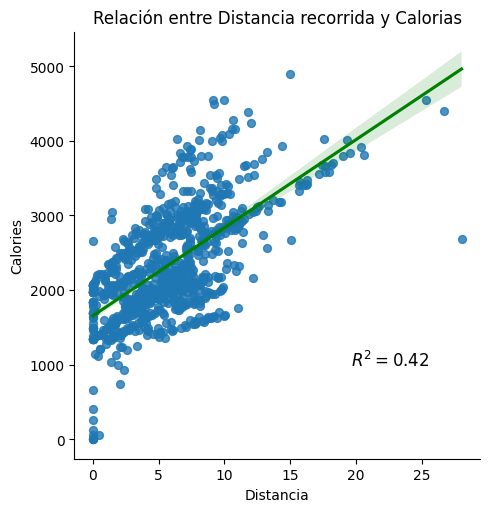

In [79]:
# Extract R-squared value
r_squared = model.rsquared

# Create the scatter plot with regression line using seaborn
sns.lmplot(x='TotalDistance', y='Calories', data=Activity, scatter_kws={'s':32, 'alpha':0.8}, line_kws={'color': 'green'})

# Add R-squared value to the plot
plt.text(Activity['TotalDistance'].max()*0.7, Activity['Calories'].max()*0.2, f'$R^2 = {r_squared:.2f}$', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Relación entre Distancia recorrida y Calorias')
plt.xlabel('Distancia')
plt.ylabel('Calories')
plt.show()

In [80]:
# Calculate the Pearson correlation coefficient
correlation, _ = pearsonr(Activity['TotalSteps'], Activity['Calories'])
print(f'Pearson correlation coefficient: {correlation}')

# Fit a linear regression model
X = Activity['TotalSteps']
y = Activity['Calories']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print the model summary
print(model.summary())

Pearson correlation coefficient: 0.5915680862453359
                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     505.0
Date:                Fri, 05 Jul 2024   Prob (F-statistic):           8.20e-90
Time:                        15:53:25   Log-Likelihood:                -7313.0
No. Observations:                 940   AIC:                         1.463e+04
Df Residuals:                     938   BIC:                         1.464e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


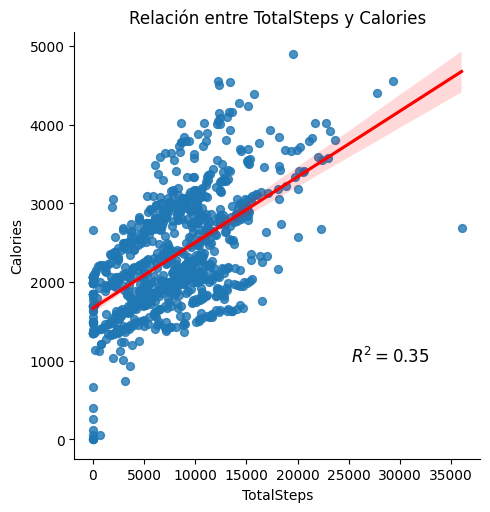

In [81]:
# @title 2.Steps vs Calories

# Extract R-squared value
r_squared = model.rsquared

# Create the scatter plot with regression line using seaborn
sns.lmplot(x='TotalSteps', y='Calories', data=Activity, scatter_kws={'s':32, 'alpha':0.8}, line_kws={'color': 'red'})

# Add R-squared value to the plot
plt.text(Activity['TotalSteps'].max()*0.7, Activity['Calories'].max()*0.2, f'$R^2 = {r_squared:.2f}$', fontsize=12)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Relación entre TotalSteps y Calories')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.show()





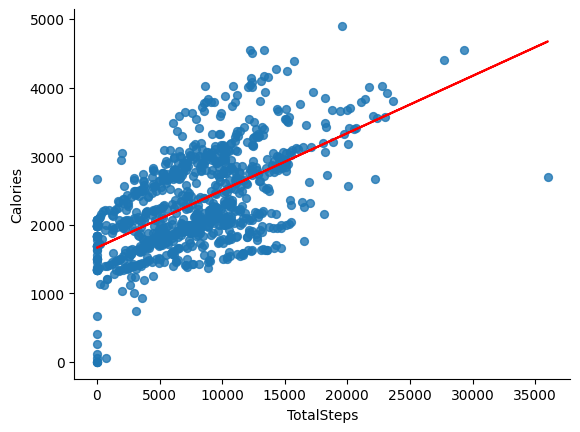

In [82]:
# Fit a linear regression model
X = Activity['TotalSteps']
y = Activity['Calories']
X = sm.add_constant(X)  # Adds a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Create the scatter plot
plt.scatter(Activity['TotalSteps'], Activity['Calories'], s=32, alpha=0.8)
plt.gca().spines[['top', 'right']].set_visible(False)

# Plot the regression line
plt.plot(Activity['TotalSteps'], predictions, color='red')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')
plt.show()


Pearson correlation coefficient: 0.9853688433590536


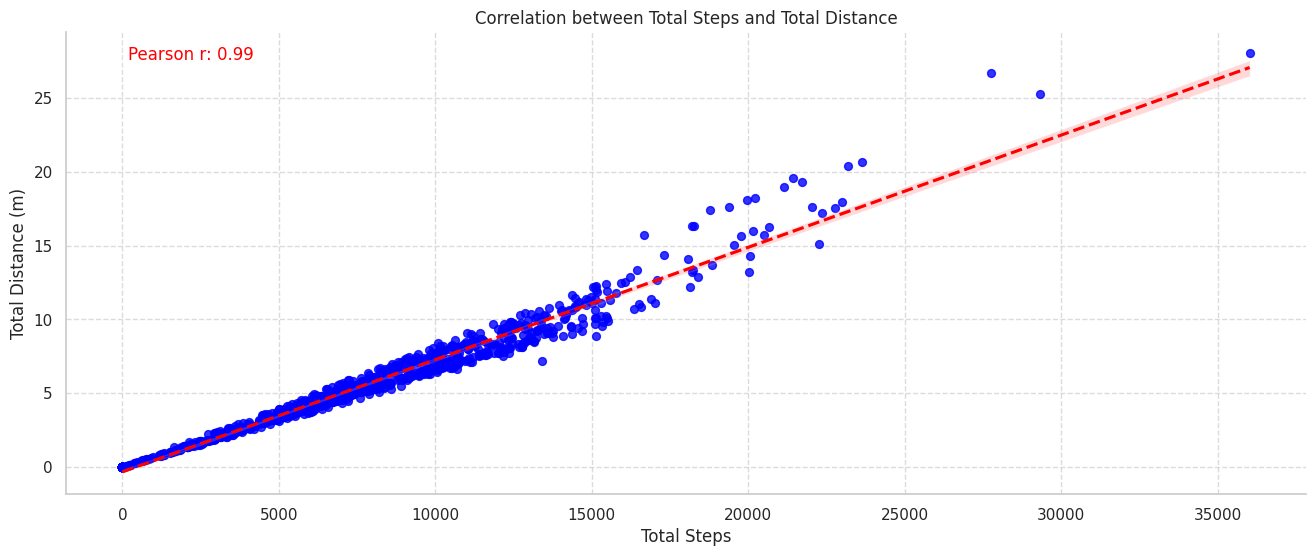

In [83]:
# @title 3.Steps vs Distance
# Asegúrate de que las columnas 'TotalSteps' y 'TotalDistance' están en formato numérico
Activity['TotalDistance'] = pd.to_numeric(Activity['TotalDistance'], errors='coerce')

# Calcular el coeficiente de correlación de Pearson
correlation, _ = pearsonr(Activity['TotalSteps'], Activity['TotalDistance'])
print(f'Pearson correlation coefficient: {correlation}')

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(16, 6))
plt.scatter(Activity['TotalSteps'], Activity['TotalDistance'], s=32, alpha=0.8, color='blue')

# Añadir línea de tendencia
sns.regplot(x='TotalSteps', y='TotalDistance', data=Activity, scatter=False, color='red', line_kws={'linestyle':'--'})

# Configurar ejes
plt.xlabel('Total Steps')
plt.ylabel('Total Distance (m)')
plt.title('Correlation between Total Steps and Total Distance')

# Añadir el coeficiente de correlación en el gráfico
plt.text(0.05, 0.95, f'Pearson r: {correlation:.2f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))

# Mejorar las espinas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


### 4.Histogramas

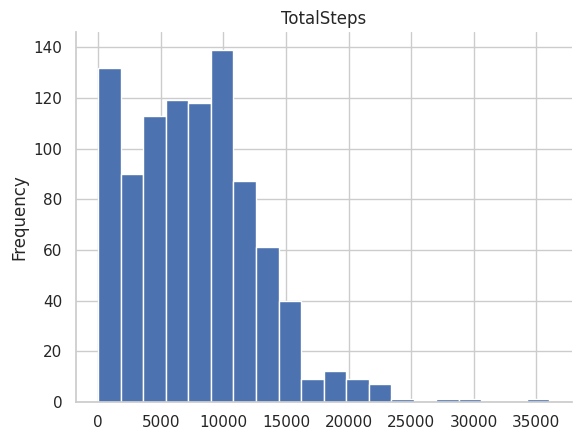

In [84]:
# @title Steps
from matplotlib import pyplot as plt
Activity['TotalSteps'].plot(kind='hist', bins=20, title='TotalSteps')
plt.gca().spines[['top', 'right',]].set_visible(False)

Se observa la distribución de la cantidad de pasos registrados en todo el dataset, concentrandose la mayor cantidad entre valores de 5mil a 10mil

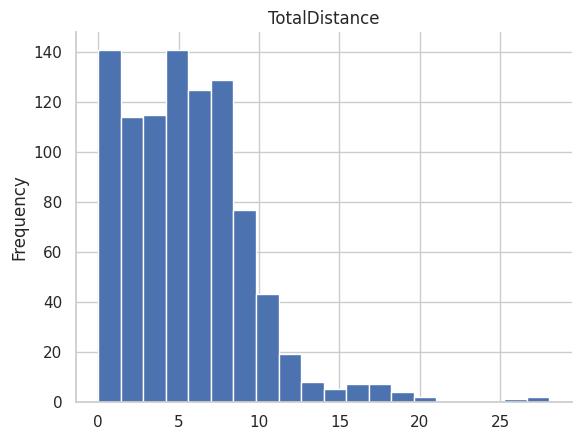

In [85]:
# @title Distancia recorrida
from matplotlib import pyplot as plt
Activity['TotalDistance'].plot(kind='hist', bins=20, title='TotalDistance')
plt.gca().spines[['top', 'right',]].set_visible(False)

* Asimetría: Sesgo hacia la izquierda indica que las distancias recorridas por los usuarios fueron significativamente menores en ciertos casos.
* Una distribución centrada en distancias cortas podría indicar que la mayoría de las personas no se mueven mucho diariamente.
* Una dispersión amplia podría sugerir una variabilidad en los hábitos de movimiento entre diferentes individuos

### Estadísticas

In [86]:
# @title Summary Activity Steps-Distancia
Activity_summary = Activity.groupby('Id').agg(
    days_used = ('Id', 'size'),
    Avg_dist_user = ('TotalDistance', 'mean'),
    Avg_Step_user = ('TotalSteps', 'mean')
).reset_index()
Activity_summary

Id  days_used  Avg_dist_user  Avg_Step_user
0   1503960366         31       7.809677   12116.741935
1   1624580081         31       3.914839    5743.903226
2   1644430081         30       5.295333    7282.966667
3   1844505072         31       1.706129    2580.064516
4   1927972279         31       0.634516     916.129032
5   2022484408         31       8.084193   11370.645161
6   2026352035         31       3.454839    5566.870968
7   2320127002         31       3.187742    4716.870968
8   2347167796         18       6.355556    9519.666667
9   2873212765         31       5.101613    7555.774194
10  3372868164         20       4.707000    6861.650000
11  3977333714         30       7.517000   10984.566667
12  4020332650         31       1.626129    2267.225806
13  4057192912          4       2.862500    3838.000000
14  4319703577         31       4.892258    7268.838710
15  4388161847         31       8.393226   10813.935484
16  4445114986         31       3.245806    4796.548387
17  4558609924         31       5.080645    7685.129032
18  4702921684         31       6.955161    8572.064516
19  5553957443         31       5.639677    8612.580645
20  5577150313         30       6.213333    8304.433333
21  6117666160         28       5.342143    7046.714286
22  6290855005         29       4.272414    5649.551724
23  6775888955         26       1.813462    2519.692308
24  6962181067         31       6.585806    9794.806452
25  7007744171         26       8.015385   11323.423077
26  7086361926         31       6.388065    9371.774194
27  8053475328         31      11.475161   14763.290323
28  8253242879         19       4.667368    6482.157895
29  8378563200         31       6.913548    8717.709677
30  8583815059         31       5.615484    7198.516129
31  8792009665         29       1.186552    1853.724138
32  8877689391         31      13.212903   16040.032258

In [87]:
# @title Estadisticas de Actividades y tiempos de actividad
selected_columns = Activity[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes', 'Calories']]

# Generar el resumen estadístico
Activity_summary2 = selected_columns.describe()
Activity_summary2

TotalSteps  TotalDistance  SedentaryMinutes  LightlyActiveMinutes  \
count    940.000000     940.000000        940.000000            940.000000   
mean    7637.910638       5.489702        991.210638            192.812766   
std     5087.150742       3.924606        301.267437            109.174700   
min        0.000000       0.000000          0.000000              0.000000   
25%     3789.750000       2.620000        729.750000            127.000000   
50%     7405.500000       5.245000       1057.500000            199.000000   
75%    10727.000000       7.712500       1229.500000            264.000000   
max    36019.000000      28.030001       1440.000000            518.000000   

       FairlyActiveMinutes  VeryActiveMinutes     Calories  
count           940.000000         940.000000   940.000000  
mean             13.564894          21.164894  2303.609574  
std              19.987404          32.844803   718.166862  
min               0.000000           0.000000     0.000000  
25%               0.000000           0.000000  1828.500000  
50%               6.000000           4.000000  2134.000000  
75%              19.000000          32.000000  2793.250000  
max             143.000000         210.000000  4900.000000

**Información que se extrae (Insights)**:

* Tiempo sedentario: SedentaryMinutes 991.21/60 minutoshora = 16.5 horas
* Promedio de Steps diarios: 7637
* Distancia media diaria: 5.48km

Alrededor del 51,5% de los usuarios cumplen con el nivel de actividad recomendado, lo que deja al 48,5% de los usuarios vulnerables a complicaciones de salud debido a la falta de actividad física. Es posible comercializar para estos usuarios permitiendo que nuestro producto realice un seguimiento de su progreso a lo largo de la semana y les notifique diariamente sobre el resto de su objetivo semanal.

## 'Weight'

Analizaremos:   
1. Indice (BMI)
2. vs otras actividades

Exploramos su contenido

In [88]:
Weight

Id                Date    WeightKg  WeightPounds        BMI  \
0   1503960366 2016-05-02 11:59:59   52.599998    115.963147  22.650000   
1   1503960366 2016-05-03 11:59:59   52.599998    115.963147  22.650000   
2   1927972279 2016-04-13 01:08:52  133.500000    294.317120  47.540001   
3   2873212765 2016-04-21 11:59:59   56.700001    125.002104  21.450001   
4   2873212765 2016-05-12 11:59:59   57.299999    126.324875  21.690001   
..         ...                 ...         ...           ...        ...   
62  8877689391 2016-05-06 06:43:35   85.000000    187.392923  25.440001   
63  8877689391 2016-05-08 07:35:53   85.400002    188.274775  25.559999   
64  8877689391 2016-05-09 06:39:44   85.500000    188.495234  25.610001   
65  8877689391 2016-05-11 06:51:47   85.400002    188.274775  25.559999   
66  8877689391 2016-05-12 06:42:53   84.000000    185.188300  25.139999   

    IsManualReport          LogId  
0             True  1462233599000  
1             True  1462319999000  
2            False  1460509732000  
3             True  1461283199000  
4             True  1463097599000  
..             ...            ...  
62           False  1462517015000  
63           False  1462692953000  
64           False  1462775984000  
65           False  1462949507000  
66           False  1463035373000  

[67 rows x 7 columns]

**Analisis del IBM** .
Indice del peso contra la estatura del individuo (kg/m2), se podria calcular la altura de los usuarios que registraron este valor.
Confirmando que este valor sea lógico.
Clasificaremos los usuarios de acuerdo al siguiente baremo:

0 - 18.5 : Por debajo del peso (underweight)

18.5 - 24.9 : Peso adecuado (healthy range)

25 - 29.9 : Sobrepeso (overweight)

30 - 39.9 : Obesidad (obesity)

40<   : Obesidad severa (severe obesity)


In [89]:
#Definimos los labels and bins
labels = ['underweight', 'healthy range', 'overweight', 'obesity', 'severe obesity']
bins = [0, 18.5, 24.9, 29.9, 39.9, float('inf')]

# Añadimos a new column 'Category' al dataset original Weight y al nuevo BMI_avg
Weight ['Category'] = pd.cut(Weight['BMI'], bins=bins, labels =labels, right=False)

In [90]:
Weight

Id                Date    WeightKg  WeightPounds        BMI  \
0   1503960366 2016-05-02 11:59:59   52.599998    115.963147  22.650000   
1   1503960366 2016-05-03 11:59:59   52.599998    115.963147  22.650000   
2   1927972279 2016-04-13 01:08:52  133.500000    294.317120  47.540001   
3   2873212765 2016-04-21 11:59:59   56.700001    125.002104  21.450001   
4   2873212765 2016-05-12 11:59:59   57.299999    126.324875  21.690001   
..         ...                 ...         ...           ...        ...   
62  8877689391 2016-05-06 06:43:35   85.000000    187.392923  25.440001   
63  8877689391 2016-05-08 07:35:53   85.400002    188.274775  25.559999   
64  8877689391 2016-05-09 06:39:44   85.500000    188.495234  25.610001   
65  8877689391 2016-05-11 06:51:47   85.400002    188.274775  25.559999   
66  8877689391 2016-05-12 06:42:53   84.000000    185.188300  25.139999   

    IsManualReport          LogId        Category  
0             True  1462233599000   healthy range  
1             True  1462319999000   healthy range  
2            False  1460509732000  severe obesity  
3             True  1461283199000   healthy range  
4             True  1463097599000   healthy range  
..             ...            ...             ...  
62           False  1462517015000      overweight  
63           False  1462692953000      overweight  
64           False  1462775984000      overweight  
65           False  1462949507000      overweight  
66           False  1463035373000      overweight  

[67 rows x 8 columns]

In [91]:
# @title Height
#Calculado la altura, podemos fijarnos la contextura del usuario, y discernir si realmente la mayoria son mujeres
#Para eso añadimos otra columna , calculando la altura

Weight ['Height'] = np.sqrt(Weight['WeightKg'] / Weight['BMI'])


In [92]:
# @title Summary Weight
#Calculo del average
BMI_Summary = Weight.groupby('Id').agg(
    days_used =('Id', 'size'),
    max_weight=('WeightKg', 'max'),
    min_weight=('WeightKg', 'min'),
    Avg_BMI_user = ('BMI', 'mean'),
    Height_user = ('Height', 'mean'),
).reset_index()


In [93]:
BMI_Summary['Category'] = pd.cut(BMI_Summary['Avg_BMI_user'], bins=bins, labels =labels, right=False)

In [94]:
BMI_Summary

Id  days_used  max_weight  min_weight  Avg_BMI_user  Height_user  \
0  1503960366          2   52.599998   52.599998     22.650000     1.523908   
1  1927972279          1  133.500000  133.500000     47.540001     1.675757   
2  2873212765          2   57.299999   56.700001     21.570001     1.625596   
3  4319703577          2   72.400002   72.300003     27.415000     1.624521   
4  4558609924          5   70.300003   69.099998     27.214000     1.599680   
5  5577150313          1   90.699997   90.699997     28.000000     1.799802   
6  6962181067         30   62.500000   61.000000     24.028000     1.600542   
7  8877689391         24   85.800003   84.000000     25.487083     1.827770   

         Category  
0   healthy range  
1  severe obesity  
2   healthy range  
3      overweight  
4      overweight  
5      overweight  
6   healthy range  
7      overweight

Calculamos altura promedio de los usuarios.

Confirmamos que la altura corresponde al género femenino (1.65 m)

In [95]:
Altura_prom = BMI_Summary['Height_user'].mean()
print(Altura_prom)


1.6596969875827954


Vemos el promedio de registros que hizo cada usuario (8,3 dias en un mes)

In [96]:
Promedio_Registro = BMI_Summary['days_used'].mean()
print(Promedio_Registro)

8.375


Calculamos el porcentaje de usuarios de acuerdo a su categoria por el BMI

In [97]:
# Agrupar por Category y contar el número de usuarios en cada categoria
Weight_level = BMI_Summary.groupby('Category').size().reset_index(name='total')

# Calcular el total de usuarios por categoria
total_users = Weight_level['total'].sum()

# Calcular el porcentaje de usuarios en cada nivel
Weight_level['total_percent'] = Weight_level['total'] /total_users
#Weight_level['total_percent'] = round(((Weight_level['total'] /'total_users')*100),2)
Weight_level


Category  total  total_percent
0     underweight      0          0.000
1   healthy range      3          0.375
2      overweight      4          0.500
3         obesity      0          0.000
4  severe obesity      1          0.125

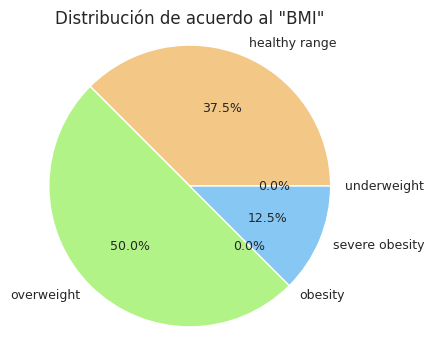

In [98]:
# @title Distribución del peso (BMI)
# Crear el gráfico circular
plt.figure(figsize=(4, 4))
colors = ['#86C7F3', '#F3C786', '#B1F386', '#F38686'] # Colores pasteles
#['#F25022','#7FBA00','#00A4EF','#FFB900'] #colores con contraste
plt.pie(Weight_level ['total'], labels=Weight_level ['Category'],
        autopct='%1.1f%%', startangle=0, textprops=dict(fontsize=9), colors=colors )

# Añadir un título
plt.title('Distribución de acuerdo al "BMI"')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

Tenemos con un 50% de sobrepeso, seguido de un peso adecuado con 37.5%

In [99]:
BMI_Summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Id            8 non-null      int64   
 1   days_used     8 non-null      int64   
 2   max_weight    8 non-null      float64 
 3   min_weight    8 non-null      float64 
 4   Avg_BMI_user  8 non-null      float64 
 5   Height_user   8 non-null      float64 
 6   Category      8 non-null      category
dtypes: category(1), float64(4), int64(2)
memory usage: 732.0 bytes


Unimos los dataframe para obtener más relación entre variables

In [100]:
# @title Activity & BMI
combined_BMI_Activity = pd.merge(BMI_Summary, Activity_summary, on='Id')
combined_BMI_Activity

Id  days_used_x  max_weight  min_weight  Avg_BMI_user  Height_user  \
0  1503960366            2   52.599998   52.599998     22.650000     1.523908   
1  1927972279            1  133.500000  133.500000     47.540001     1.675757   
2  2873212765            2   57.299999   56.700001     21.570001     1.625596   
3  4319703577            2   72.400002   72.300003     27.415000     1.624521   
4  4558609924            5   70.300003   69.099998     27.214000     1.599680   
5  5577150313            1   90.699997   90.699997     28.000000     1.799802   
6  6962181067           30   62.500000   61.000000     24.028000     1.600542   
7  8877689391           24   85.800003   84.000000     25.487083     1.827770   

         Category  days_used_y  Avg_dist_user  Avg_Step_user  
0   healthy range           31       7.809677   12116.741935  
1  severe obesity           31       0.634516     916.129032  
2   healthy range           31       5.101613    7555.774194  
3      overweight           31       4.892258    7268.838710  
4      overweight           31       5.080645    7685.129032  
5      overweight           30       6.213333    8304.433333  
6   healthy range           31       6.585806    9794.806452  
7      overweight           31      13.212903   16040.032258

(15.0, 50.0)

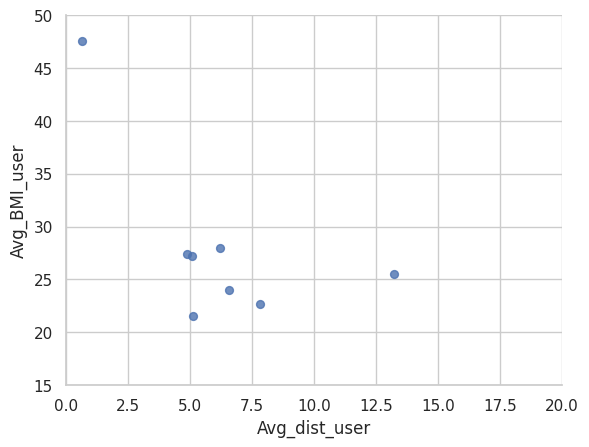

In [101]:
# @title BMI vs Distance
from matplotlib import pyplot as plt
combined_BMI_Activity.plot(kind='scatter', x='Avg_dist_user', y='Avg_BMI_user', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlim(0, 20)  #modificar la escala de los ejes
plt.ylim(15, 50)

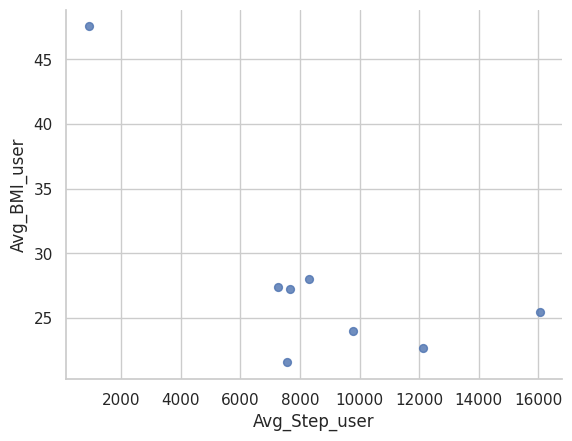

In [102]:
# @title BMI vs Steps
from matplotlib import pyplot as plt
combined_BMI_Activity.plot(kind='scatter', x='Avg_Step_user', y='Avg_BMI_user', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


Relación entre BMI y steps o Distancia recorrida:
* Comportamiento del usuario con un peso más saludable puede realizar una media de más pasos o recorrer mayor distancia

## 'Intensity'

Exploramos su contenido

In [103]:
Intensity

Id           ActivityHour  TotalIntensity  AverageIntensity
0      1503960366  4/12/2016 12:00:00 AM              20          0.333333
1      1503960366   4/12/2016 1:00:00 AM               8          0.133333
2      1503960366   4/12/2016 2:00:00 AM               7          0.116667
3      1503960366   4/12/2016 3:00:00 AM               0          0.000000
4      1503960366   4/12/2016 4:00:00 AM               0          0.000000
...           ...                    ...             ...               ...
22094  8877689391  5/12/2016 10:00:00 AM              12          0.200000
22095  8877689391  5/12/2016 11:00:00 AM              29          0.483333
22096  8877689391  5/12/2016 12:00:00 PM              93          1.550000
22097  8877689391   5/12/2016 1:00:00 PM               6          0.100000
22098  8877689391   5/12/2016 2:00:00 PM               9          0.150000

[22099 rows x 4 columns]

In [104]:
Intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


Extraemos el día ('Date') y la hora ('Hour') de la columna 'ActivityHour'


In [127]:
Intensity['ActivityHour'] = pd.to_datetime( Intensity['ActivityHour']) #confirmamos que esta variable sea del tipo datetime
Intensity['Date'] = Intensity['ActivityHour'].dt.date #extraemos la fecha de la columna del tiempo
Intensity['Date'] = pd.to_datetime( Intensity['Date']) #confirmamos que la columna 'date' es del tipo datetime

# Extraer la hora
Intensity['Hour'] = Intensity['ActivityHour'].dt.time #extraemos la hora de la columna del tiempo
#Intensity['Hour'] = Intensity['ActivityHour'].dt.strftime('%H:%M:%S') #confirmamos el formato de la columna 'hour', pero es de tipo string


In [128]:
Intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
 4   Date              22099 non-null  datetime64[ns]
 5   Hour              22099 non-null  object        
 6   logDateTime       22099 non-null  datetime64[ns]
 7   weekDay           22099 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(2), object(2)
memory usage: 1.3+ MB


In [129]:
Intensity

Id        ActivityHour  TotalIntensity  AverageIntensity  \
0      1503960366 2016-04-12 00:00:00              20          0.333333   
1      1503960366 2016-04-12 01:00:00               8          0.133333   
2      1503960366 2016-04-12 02:00:00               7          0.116667   
3      1503960366 2016-04-12 03:00:00               0          0.000000   
4      1503960366 2016-04-12 04:00:00               0          0.000000   
...           ...                 ...             ...               ...   
22094  8877689391 2016-05-12 10:00:00              12          0.200000   
22095  8877689391 2016-05-12 11:00:00              29          0.483333   
22096  8877689391 2016-05-12 12:00:00              93          1.550000   
22097  8877689391 2016-05-12 13:00:00               6          0.100000   
22098  8877689391 2016-05-12 14:00:00               9          0.150000   

            Date      Hour         logDateTime   weekDay  
0     2016-04-12  00:00:00 2016-04-12 00:00:00   Tuesday  
1     2016-04-12  01:00:00 2016-04-12 01:00:00   Tuesday  
2     2016-04-12  02:00:00 2016-04-12 02:00:00   Tuesday  
3     2016-04-12  03:00:00 2016-04-12 03:00:00   Tuesday  
4     2016-04-12  04:00:00 2016-04-12 04:00:00   Tuesday  
...          ...       ...                 ...       ...  
22094 2016-05-12  10:00:00 2016-05-12 10:00:00  Thursday  
22095 2016-05-12  11:00:00 2016-05-12 11:00:00  Thursday  
22096 2016-05-12  12:00:00 2016-05-12 12:00:00  Thursday  
22097 2016-05-12  13:00:00 2016-05-12 13:00:00  Thursday  
22098 2016-05-12  14:00:00 2016-05-12 14:00:00  Thursday  

[22099 rows x 8 columns]

Graficamos:
1. Histograma de los valores
2. Comportamiento en un DIA (por Usuario)
3. Comportamiento en un MES
4. Comparamos dos o tres usuarios

### 1. Histograma

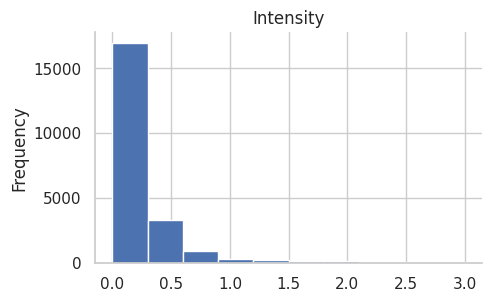

In [108]:
Intensity['AverageIntensity'].plot(kind='hist', bins=10, title='Intensity', figsize=(5,3))
plt.gca().spines[['top', 'right',]].set_visible(False)

La distribución está enfocada en valores igual a 0.

Buscamos como interpretar la distribución aplicando:
* Filtrado de valores cero: Excluye los valores cero para centrar la atención en los valores positivos
* Transformación logaritmica: reduce el impacto de los valores extremos y resalta la variabilidad en los valores más bajos
* Submuestreo: reduce la cantidad de valores cero mediante un muestreo aleatorio, sin perder la parte representativa de los valores cero sin perder esta información.
* Histogramas separados: crear dos histogramas para los valores cero y los positivos


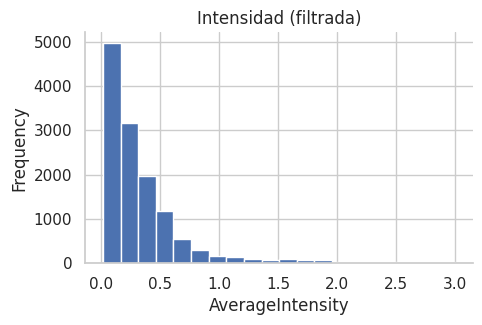

In [109]:
# prompt: histogram

# @title 1. Histograma de los valores

# Filtrar los valores cero
df_filtered = Intensity[Intensity['AverageIntensity'] > 0]

# Crear el histograma
plt.figure(figsize=(5, 3))
df_filtered['AverageIntensity'].plot(kind='hist', bins=20, title='Intensidad (filtrada)')
plt.xlabel('AverageIntensity')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

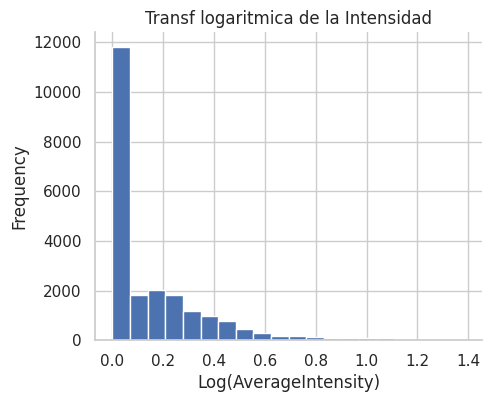

In [110]:
#histograma transformación logaritmica
df_log = np.log(Intensity['AverageIntensity'] + 1)
#df_log ['Log_AverageIntensity']
# Crear el histograma
plt.figure(figsize=(5,4))
df_log.plot(kind='hist', bins=20, title='Transf logaritmica de la Intensidad')
plt.xlabel('Log(AverageIntensity)')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


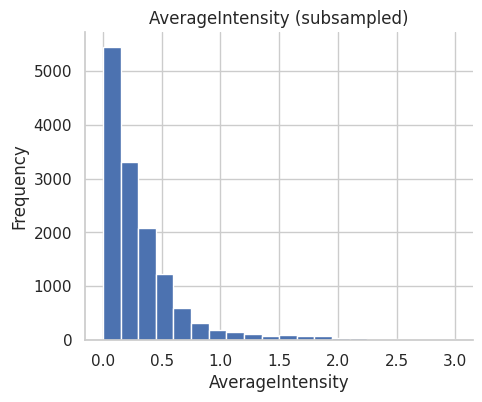

In [111]:
# Filtrar valores cero
zeros = Intensity[Intensity['AverageIntensity'] == 0]
non_zeros = Intensity[Intensity['AverageIntensity'] > 0]

# Submuestreo de valores cero (por ejemplo, tomar 10% de los valores cero)
zeros_sample = zeros.sample(frac=0.1, random_state=1)

# Concatenar de nuevo los valores no cero y la muestra de valores cero
df_subsampled = pd.concat([non_zeros, zeros_sample])

# Crear el histograma
plt.figure(figsize=(5,4))
df_subsampled['AverageIntensity'].plot(kind='hist', bins=20, title='AverageIntensity (subsampled)')
plt.xlabel('AverageIntensity')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


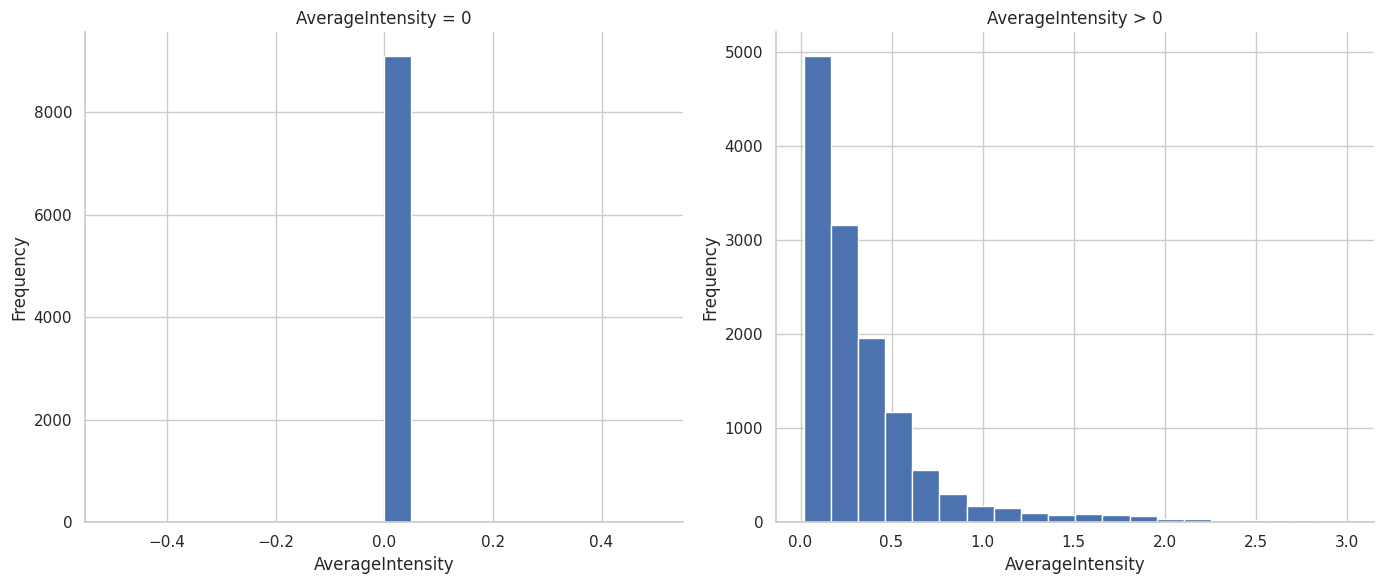

In [112]:
# Crear histogramas separados
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
Intensity[Intensity['AverageIntensity'] == 0]['AverageIntensity'].plot(kind='hist', bins=20, title='AverageIntensity = 0')
plt.xlabel('AverageIntensity')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.subplot(1, 2, 2)
Intensity[Intensity['AverageIntensity'] > 0]['AverageIntensity'].plot(kind='hist', bins=20, title='AverageIntensity > 0')
plt.xlabel('AverageIntensity')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()


### 2. Comportamiento durante un DIA

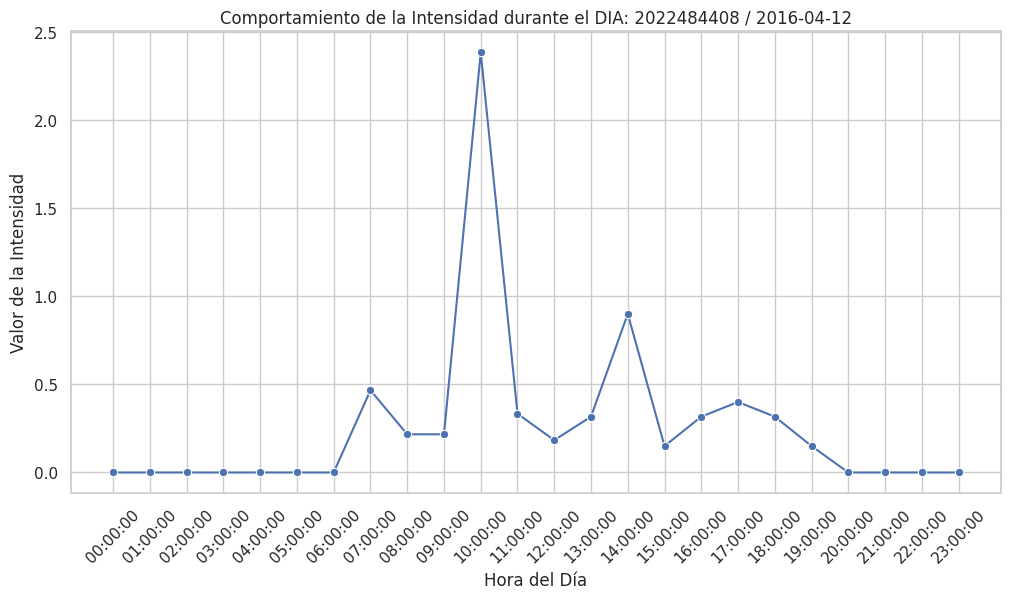

In [113]:
# @title Usuario y fecha especifico
# Seleccionar un ID y una fecha específicos
specific_id_i = 2022484408
Date_ = '2016-04-12'

# Filtrar los datos
Data_specific_i = Intensity[(Intensity['Id'] == specific_id_i) & (Intensity['Date'] == Date_)]

# Graficar el comportamiento de la Intensidad en un día específico
plt.figure(figsize=(12, 6))
sns.lineplot(data=Data_specific_i, x='Hour', y='AverageIntensity', marker='o')

# Agregar título y etiquetas
plt.title(f'Comportamiento de la Intensidad durante el DIA: {specific_id_i} / {Date_}')
plt.xlabel('Hora del Día')
plt.ylabel('Valor de la Intensidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


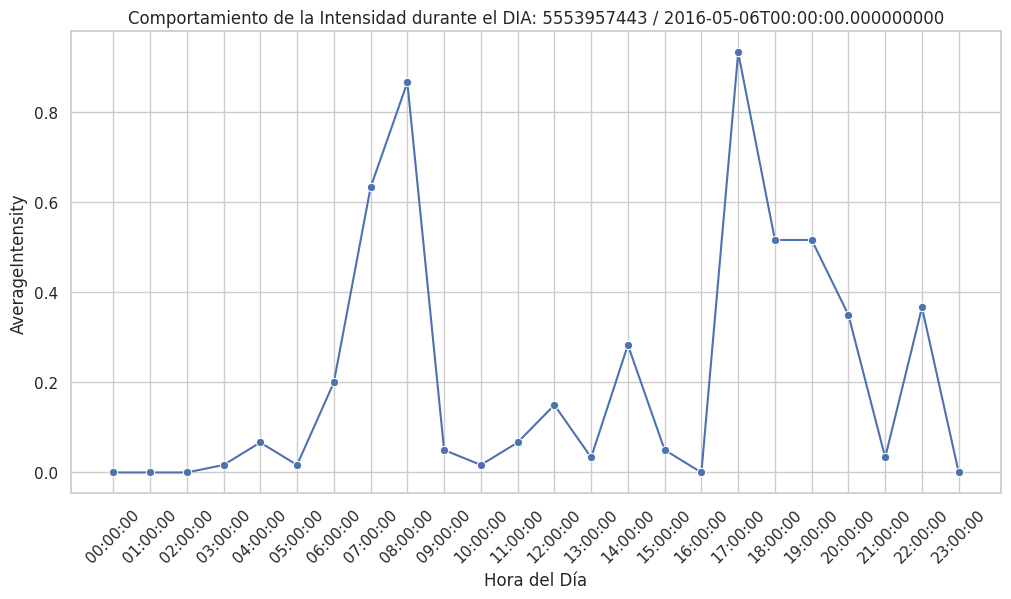

In [114]:
# @title Usuario y fecha Random

random_id_i = np.random.choice(Intensity['Id'].unique())
random_date = np.random.choice(Intensity['Date'].unique())

#Vemos otro dataset aleatorio
Data_specific_random = Intensity[(Intensity['Id'] == random_id_i) & (Intensity['Date'] == random_date)]

# Graficar el comportamiento de AverageIntensity en el día específico
plt.figure(figsize=(12, 6))
sns.lineplot(data=Data_specific_random, x='Hour', y='AverageIntensity', marker='o')

# Agregar título y etiquetas
plt.title(f'Comportamiento de la Intensidad durante el DIA: {random_id_i} / {random_date}')
plt.xlabel('Hora del Día')
plt.ylabel('AverageIntensity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


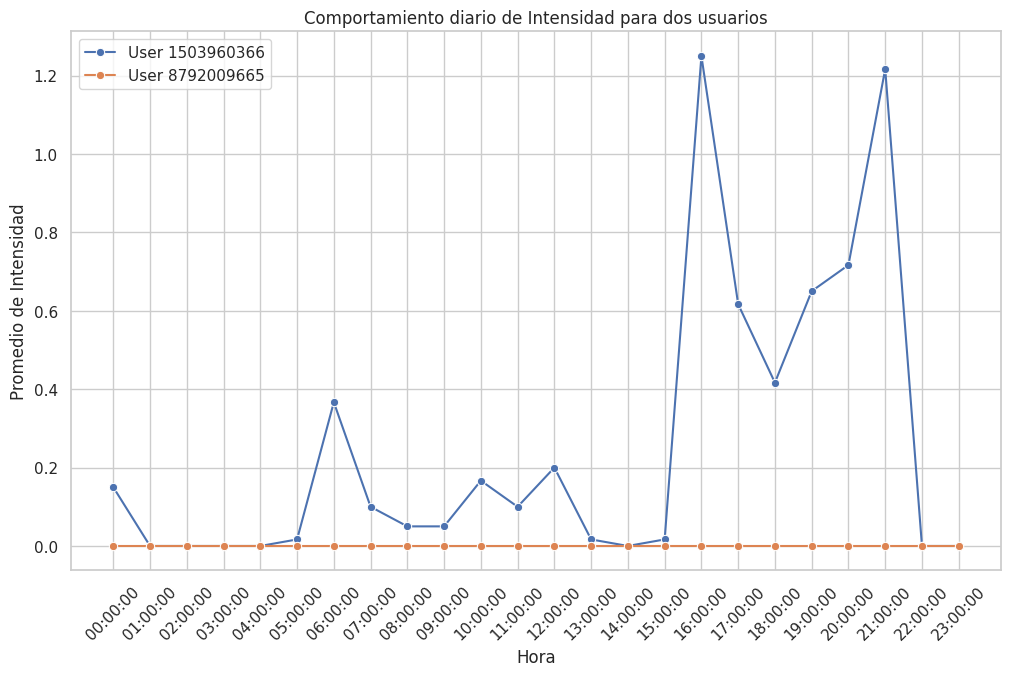

In [115]:
# @title Comparar varios usuarios Random
#si queremos que los Id´s sean aleatorios
random_ids = np.random.choice(Intensity['Id'].unique(), size=3, replace=False)
id1_i, id2_i, id3_i = random_ids

random_date = np.random.choice(Intensity['Date'].unique(), size=2, replace=False)
date1_i, date2_i = random_date

# Filtrar los datos
#Data_specific = Intensity[(Intensity['Id'] == specific_id1) & (Intensity['Date'] == Date_)]

# Agrupar por fecha e Id y calcular el promedio de 'Intensity' para los dos usuarios
daily_summary_user_1 = Intensity[(Intensity['Id'] == id1_i) & (Intensity['Date'] == date1_i)]
daily_summary_user_2 = Intensity[(Intensity['Id'] == id2_i) & (Intensity['Date'] == date1_i)]

# Graficar el comportamiento diario de 'Intensity' para los dos usuarios
plt.figure(figsize=(12, 7))
sns.lineplot(data=daily_summary_user_1, x='Hour', y='AverageIntensity', marker='o', label=f'User {id1_i}')
sns.lineplot(data=daily_summary_user_2, x='Hour', y='AverageIntensity', marker='o', label=f'User {id2_i}')


plt.title('Comportamiento diario de Intensidad para dos usuarios')
plt.xlabel('Hora')
plt.ylabel('Promedio de Intensidad')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Creamos el dataset ('Data_specific') que se grafica con UN usuario y UNA fecha específica.


```
# Seleccionar un ID y una fecha específicos
specific_id1 = Intensity['Id'].unique()[-1]
Date_ = '2016-04-12'

# Filtrar los datos
Data_specific = Intensity[(Intensity['Id'] == specific_id1) & (Intensity['Date'] == Date_)]
Data_specific

# Seleccionar dos o tres IDs específicos
user_ids = Intensity['Id'].unique()[-3:]  # Selecciona los primeros dos IDs únicos
user_1, user_2, user_3 = user_ids[0], user_ids[-2], user_ids[-1]

# Agrupar por fecha e Id y calcular el promedio de 'AverageIntensity' para los dos usuarios
daily_summary_user_1 = Intensity[Intensity['Id'] == user_1].groupby('Date')['AverageIntensity'].mean().reset_index()
daily_summary_user_2 = Intensity[Intensity['Id'] == user_2].groupby('Date')['AverageIntensity'].mean().reset_index()
daily_summary_user_3 = Intensity[Intensity['Id'] == user_3].groupby('Date')['AverageIntensity'].mean().reset_index()
```

Si queremos que los Id´s y fechas sean aleatorios

```
# random_ids = np.random.choice(Intensity['Id'].unique(), size=3, replace=False)
id1_i, id2_i, id3_i = random_ids

random_date = np.random.choice(Intensity['Date'].unique(), size=2, replace=False)
date1_i, date2_i = random_date
```

### 3. Comportamiento durante un MES

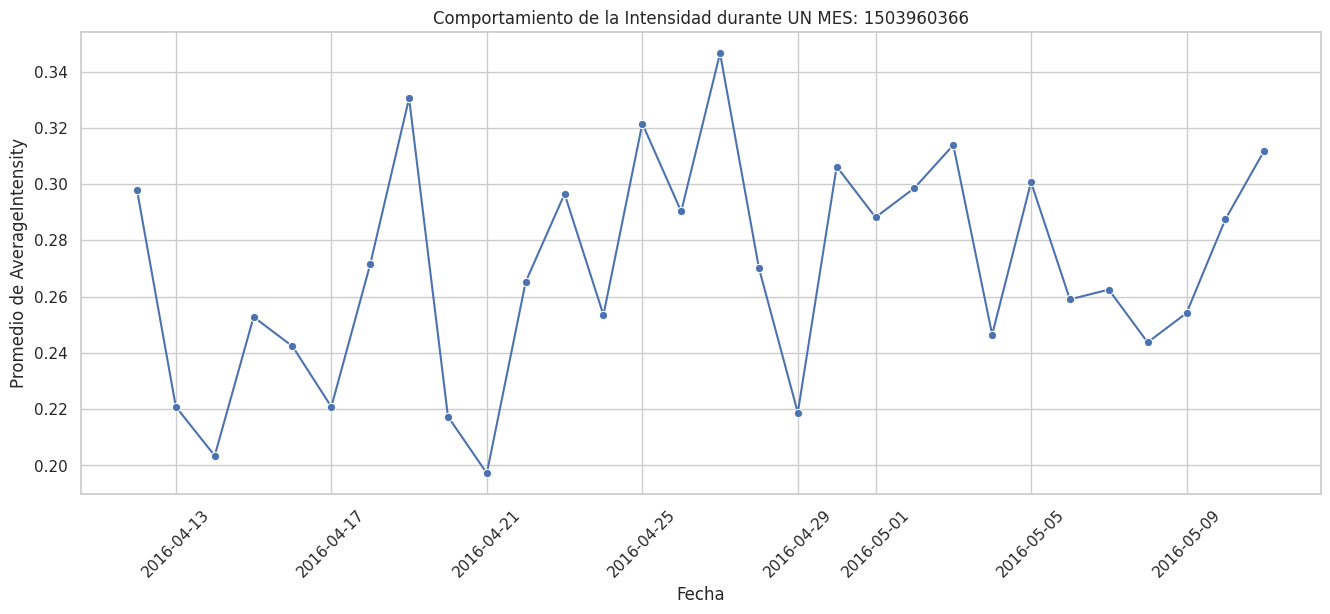

In [116]:
# @title Un sólo usuario
# Para visualizar, seleccionamos una ID específica
specific_id = Intensity['Id'].unique()[0]
daily_summary_id = Intensity[Intensity['Id'] == specific_id].groupby('Date')['AverageIntensity'].mean().reset_index()

# Graficar el comportamiento diario de 'AverageIntensity' para un usuario específico
plt.figure(figsize=(16, 6))
sns.lineplot(data=daily_summary_id, x='Date', y='AverageIntensity', marker='o')
plt.title(f'Comportamiento de la Intensidad durante UN MES: {specific_id}')
plt.xlabel('Fecha')
plt.ylabel('Promedio de AverageIntensity')
plt.xticks(rotation=45)
plt.show()


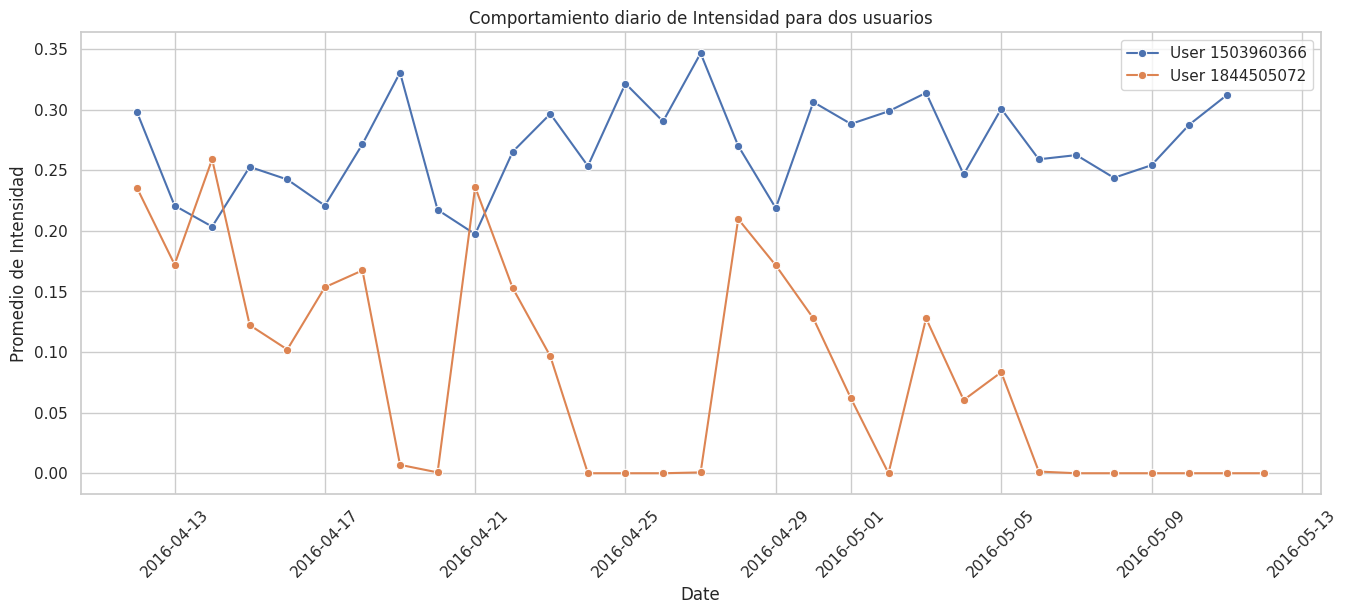

In [117]:
# @title Usuarios especificos

# Seleccionar dos IDs específicos
user_ids = Intensity['Id'].unique()  # Seleccionar de acuerdo a la posición
user_1, user_2 = user_ids[0], user_ids[3]

# Agrupar por fecha e Id y calcular el promedio de 'Intensity' para los dos usuarios
daily_summary_user_1 = Intensity[Intensity['Id'] == user_1].groupby('Date')['AverageIntensity'].mean().reset_index()
daily_summary_user_2 = Intensity[Intensity['Id'] == user_2].groupby('Date')['AverageIntensity'].mean().reset_index()

# Graficar el comportamiento diario de 'Intensity' para los dos usuarios
plt.figure(figsize=(16, 6))
sns.lineplot(data=daily_summary_user_1, x='Date', y='AverageIntensity', marker='o', label=f'User {user_1}')
sns.lineplot(data=daily_summary_user_2, x='Date', y='AverageIntensity', marker='o', label=f'User {user_2}')


plt.title('Comportamiento diario de Intensidad para dos usuarios')
plt.ylabel('Promedio de Intensidad')
plt.legend()
plt.xticks(rotation=45)
plt.show()


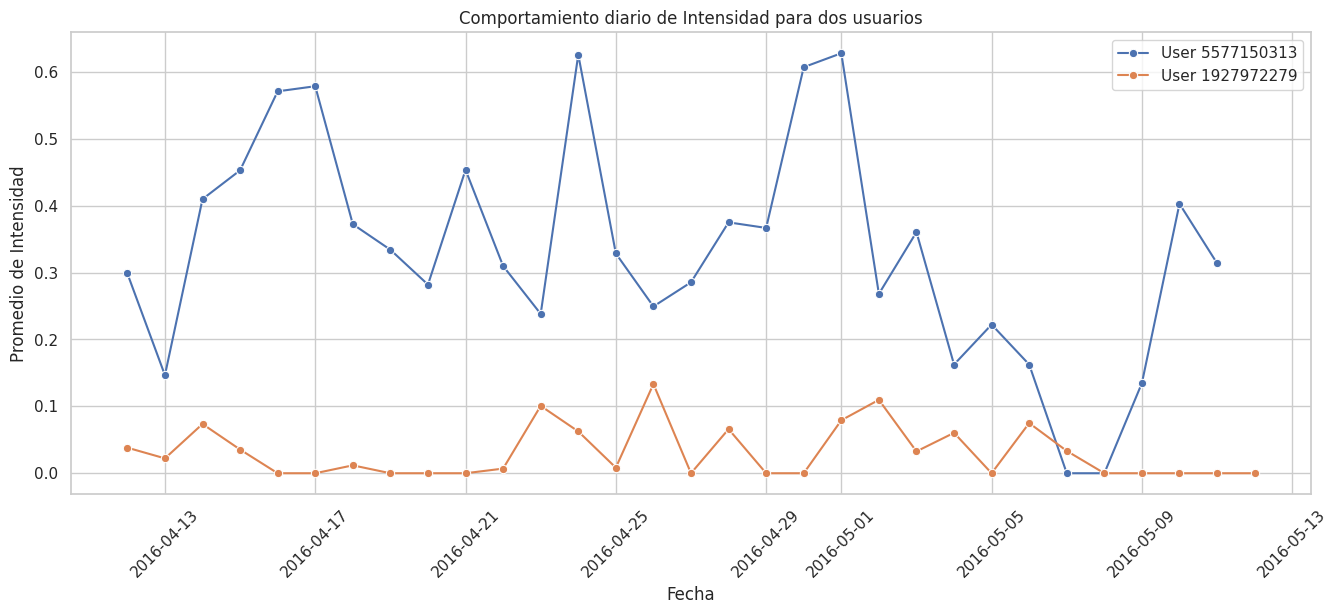

In [118]:
# @title Comparamos 2 o 3 usuarios Random

random_ids = np.random.choice(Intensity['Id'].unique(), size=3, replace=False)
id1_i, id2_i, id3_i = random_ids

# Agrupar por fecha e Id y calcular el promedio de 'Intensity' para los dos usuarios
daily_summary_user_1 = Intensity[Intensity['Id'] == id1_i].groupby('Date')['AverageIntensity'].mean().reset_index()
daily_summary_user_2 = Intensity[Intensity['Id'] == id2_i].groupby('Date')['AverageIntensity'].mean().reset_index()
#daily_summary_user_3 = Intensity[Intensity['Id'] == id3_i].groupby('Date')['AverageIntensity'].mean().reset_index()

# Graficar el comportamiento diario de 'Intensity' para los dos usuarios
plt.figure(figsize=(16, 6))
sns.lineplot(data=daily_summary_user_1, x='Date', y='AverageIntensity', marker='o', label=f'User {id1_i}')
sns.lineplot(data=daily_summary_user_2, x='Date', y='AverageIntensity', marker='o', label=f'User {id2_i}')
#sns.lineplot(data=daily_summary_user_3, x='Date', y='AverageIntensity', marker='o', label=f'User {id3_i}')

plt.title('Comportamiento diario de Intensidad para dos usuarios')
plt.xlabel('Fecha')
plt.ylabel('Promedio de Intensidad')
plt.legend()
plt.xticks(rotation=45)
plt.show()


```
# Vemos el comportamiento por día de la semana.
#
# Extraemos de las fechas, los días de la semana
#
# @title Gráfico de la Intensidad por usuario/dia o mes
'''
# Seleccionar un ID y una fecha específicos
specific_id_i = 2022484408
Date_ = '2016-04-12'

# Filtrar los datos
Data_specific_i = Intensity[(Intensity['Id'] == specific_id_i) & (Intensity['Date'] == Date_)]

# Graficar el comportamiento de la Intensidad en un día específico
plt.figure(figsize=(12, 6))
sns.lineplot(data=Data_specific_i, x='Hour', y='Intensity', marker='o')

# Agregar título y etiquetas
plt.title(f'Comportamiento de la Intensidad durante el DIA: {specific_id_i} / {Date_}')
plt.xlabel('Hora del Día')
plt.ylabel('Valor de la Intensidad')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
'''
# Otra forma de obtener los resultados, partiendo del archivo original sin filtrar
#extraigo la fecha de la columna 'Time', creando otra columna 'Date'
Intensity['Date'] = Intensity['ActivityHour'].dt.date
day_perUser_original = Intensity.groupby('Id')['Date'].nunique().reset_index()
# Ordenar por Cantidad_registro
#resultados2 = resultados2.sort_values(by='Date')
day_perUser_original.columns = ['Id', 'Days']
print(day_perUser_original)
#extraigo la fecha de la columna 'Time', creando otra columna 'Date'
Intensity['Date'] = Intensity['ActivityHour'].dt.date
print(Intensity)
resultados2_originales = Intensity.groupby('Id').agg(
   Cantidad_registro = ('Id', 'count'),
   valor_minimo=('Intensity', 'min'),
   valor_maximo=('Intensity', 'max'),
   media=('Intensity', 'mean')
).reset_index()

print(resultados2_originales)
resultados_originales = Intensity.groupby(['Id', 'Date']).agg(
   Cantidad_registro = ('Id', 'count'),
   valor_minimo=('Intensity', 'min'),
   valor_maximo=('Intensity', 'max'),
   media=('Intensity', 'mean')
).reset_index()

print(resultados_originales)
Summary_Intensity_original = pd.merge(day_perUser_original, resultados2_originales, on='Id')
print(Summary_Intensity_original)
Verifica =  pd.merge(day_perUser_original, day_perUser, how = 'outer' ,on='Id')
Verifica
# Otra forma de contabilizar el registro por Id y Día, directo del archivo original
records_per_day = Intensity.groupby(['Id', 'Date']).size().reset_index(name='RecordsPerDay')
print(records_per_day)
# JOIN OPERATIONS
 merged_df = pd.merge(Steps, Calories, on='Id', how='outer')

# Continue joining the remaining DataFrames
# merged_df = pd.merge(merged_df, Activity, on='Id', how='inner')
# merged_df = pd.merge(merged_df, df4, on='Id', how='inner')
# merged_df = pd.merge(merged_df, df5, on='Id', how='inner')
print (merged_df)
# ## 'SleepDay'
#
```

### Estadísticas

Vemos la cantidad de días registrados por usuario

In [119]:
days_Intensity = Intensity.groupby('Id')['Date'].nunique().reset_index()
days_Intensity.columns = ['Id', 'Days']
days_Intensity

Id  Days
0   1503960366    30
1   1624580081    31
2   1644430081    30
3   1844505072    31
4   1927972279    31
5   2022484408    31
6   2026352035    31
7   2320127002    31
8   2347167796    18
9   2873212765    31
10  3372868164    20
11  3977333714    29
12  4020332650    31
13  4057192912     4
14  4319703577    31
15  4388161847    31
16  4445114986    31
17  4558609924    31
18  4702921684    31
19  5553957443    31
20  5577150313    30
21  6117666160    28
22  6290855005    28
23  6775888955    26
24  6962181067    31
25  7007744171    26
26  7086361926    31
27  8053475328    31
28  8253242879    18
29  8378563200    31
30  8583815059    30
31  8792009665    28
32  8877689391    31

In [120]:
Registro_Id_inten = Intensity.Id.value_counts(ascending=True, dropna= False)
Promedio_Registro_Id_inte = round(Registro_Id_inten.mean())

print (Registro_Id_inten, 'Promedio de registro: ', Promedio_Registro_Id_inte)

Id
4057192912     88
2347167796    414
8253242879    431
3372868164    472
7007744171    601
6775888955    610
6117666160    660
6290855005    665
8792009665    672
3977333714    696
1644430081    708
5577150313    708
1503960366    717
8583815059    718
4319703577    724
5553957443    730
1844505072    731
4702921684    731
4020332650    732
6962181067    732
7086361926    733
8053475328    735
8378563200    735
4445114986    735
4388161847    735
2320127002    735
8877689391    735
2873212765    736
2026352035    736
2022484408    736
1927972279    736
1624580081    736
4558609924    736
Name: count, dtype: int64 Promedio de registro:  670


In [121]:
Intensity_sum = Intensity.groupby('Id')['AverageIntensity'].describe()
Intensity_sum

count      mean       std  min       25%       50%       75%  \
Id                                                                         
1503960366  717.0  0.269503  0.370071  0.0  0.016667  0.150000  0.350000   
1624580081  736.0  0.133990  0.259625  0.0  0.000000  0.050000  0.166667   
1644430081  708.0  0.175330  0.297314  0.0  0.000000  0.050000  0.216667   
1844505072  731.0  0.083698  0.164166  0.0  0.000000  0.000000  0.066667   
1927972279  736.0  0.030956  0.101575  0.0  0.000000  0.000000  0.000000   
2022484408  736.0  0.283854  0.452558  0.0  0.000000  0.091667  0.400000   
2026352035  736.0  0.180208  0.195178  0.0  0.000000  0.133333  0.283333   
2320127002  735.0  0.145714  0.179580  0.0  0.000000  0.033333  0.266667   
2347167796  414.0  0.242029  0.326826  0.0  0.000000  0.141667  0.333333   
2873212765  736.0  0.251698  0.302610  0.0  0.000000  0.175000  0.400000   
3372868164  472.0  0.256321  0.288831  0.0  0.016667  0.183333  0.404167   
3977333714  696.0  0.253807  0.430721  0.0  0.000000  0.075000  0.283333   
4020332650  732.0  0.072632  0.197530  0.0  0.000000  0.000000  0.000000   
4057192912   88.0  0.081629  0.118689  0.0  0.000000  0.000000  0.133333   
4319703577  724.0  0.188513  0.251084  0.0  0.000000  0.050000  0.304167   
4388161847  735.0  0.238526  0.357527  0.0  0.000000  0.116667  0.283333   
4445114986  735.0  0.163220  0.226321  0.0  0.000000  0.100000  0.250000   
4558609924  736.0  0.240829  0.301423  0.0  0.000000  0.166667  0.383333   
4702921684  731.0  0.215527  0.282948  0.0  0.000000  0.100000  0.341666   
5553957443  730.0  0.214064  0.332458  0.0  0.000000  0.075000  0.300000   
5577150313  708.0  0.331591  0.559009  0.0  0.000000  0.083333  0.370834   
6117666160  660.0  0.209015  0.275960  0.0  0.000000  0.016667  0.400000   
6290855005  665.0  0.176667  0.235288  0.0  0.000000  0.000000  0.333333   
6775888955  610.0  0.072896  0.235339  0.0  0.000000  0.000000  0.000000   
6962181067  732.0  0.247928  0.374959  0.0  0.000000  0.083333  0.383333   
7007744171  601.0  0.293012  0.462645  0.0  0.000000  0.133333  0.416667   
7086361926  733.0  0.226057  0.471584  0.0  0.000000  0.050000  0.216667   
8053475328  735.0  0.299161  0.545820  0.0  0.000000  0.050000  0.291666   
8253242879  431.0  0.151779  0.341388  0.0  0.000000  0.016667  0.158334   
8378563200  735.0  0.247642  0.494861  0.0  0.033333  0.133333  0.216667   
8583815059  718.0  0.152182  0.320262  0.0  0.000000  0.000000  0.150000   
8792009665  672.0  0.073909  0.158356  0.0  0.000000  0.000000  0.066667   
8877689391  735.0  0.318027  0.527344  0.0  0.000000  0.166667  0.350000   

                 max  
Id                    
1503960366  2.650000  
1624580081  2.816667  
1644430081  2.166667  
1844505072  1.116667  
1927972279  1.050000  
2022484408  2.616667  
2026352035  0.933333  
2320127002  1.116667  
2347167796  2.200000  
2873212765  2.466667  
3372868164  1.750000  
3977333714  2.450000  
4020332650  1.966667  
4057192912  0.516667  
4319703577  1.450000  
4388161847  2.566667  
4445114986  2.283333  
4558609924  2.050000  
4702921684  1.983333  
5553957443  2.400000  
5577150313  3.000000  
6117666160  1.183333  
6290855005  1.700000  
6775888955  1.866667  
6962181067  2.650000  
7007744171  2.900000  
7086361926  2.766667  
8053475328  2.983333  
8253242879  2.483333  
8378563200  2.750000  
8583815059  2.966667  
8792009665  1.400000  
8877689391  3.000000

<ipython-input-122-5d55cdd64714>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_intensity_by_id, x='Id', y='AverageIntensity', palette='viridis')


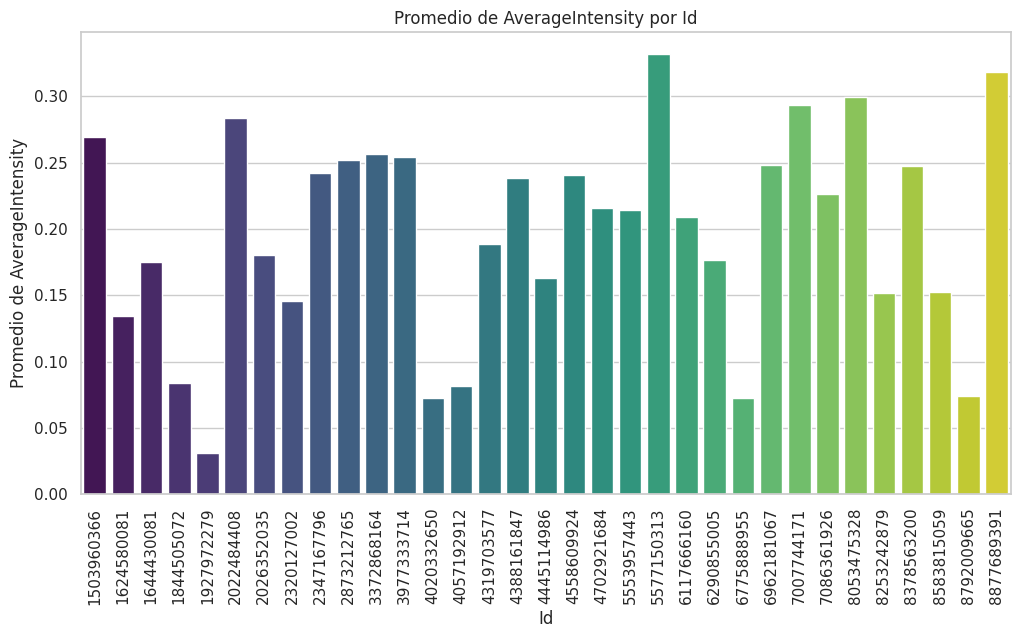

In [122]:
# Agrupar por 'Id' y calcular el promedio de 'AverageIntensity'
avg_intensity_by_id = Intensity.groupby('Id')['AverageIntensity'].mean().reset_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_intensity_by_id, x='Id', y='AverageIntensity', palette='viridis')
plt.title('Promedio de AverageIntensity por Id')
plt.xlabel('Id')
plt.ylabel('Promedio de AverageIntensity')
plt.xticks(rotation=90)
plt.show()


* Se podría enfocar el análisis en aquellos usuarios cuya intensidad media sea relevante ( > 0.20) y observar la tendencia en el ejercicio físico, actividades, con respecto a la frecuencia cardíaca y el tiempo de descanso.
* Podemos pensar que estas personas han usado el dispositivo de manera más frecuente

In [123]:
# Mostrar las estadísticas descriptivas diarias
daily_summary = Intensity.groupby(['Id', 'Date'])['AverageIntensity'].describe()

# Para visualizar, seleccionamos una ID específica
specific_id = Intensity['Id'].unique()[0]
daily_summary_id = Intensity[Intensity['Id'] == specific_id].groupby('Date')['AverageIntensity'].mean().reset_index()
daily_summary

count      mean       std  min       25%       50%  \
Id         Date                                                             
1503960366 2016-04-12   24.0  0.297917  0.261606  0.0  0.112500  0.216667   
           2016-04-13   24.0  0.220833  0.238415  0.0  0.000000  0.191667   
           2016-04-14   24.0  0.203472  0.267028  0.0  0.000000  0.100000   
           2016-04-15   24.0  0.252778  0.393506  0.0  0.012500  0.108333   
           2016-04-16   24.0  0.242361  0.332680  0.0  0.029167  0.158334   
...                      ...       ...       ...  ...       ...       ...   
8877689391 2016-05-08   24.0  0.211111  0.239951  0.0  0.000000  0.208334   
           2016-05-09   24.0  0.329167  0.497609  0.0  0.000000  0.225000   
           2016-05-10   24.0  0.208333  0.267616  0.0  0.000000  0.158334   
           2016-05-11   24.0  0.347917  0.621812  0.0  0.000000  0.166666   
           2016-05-12   15.0  0.218889  0.395353  0.0  0.000000  0.100000   

                            75%       max  
Id         Date                            
1503960366 2016-04-12  0.487500  0.966667  
           2016-04-13  0.254167  0.933333  
           2016-04-14  0.316667  0.950000  
           2016-04-15  0.266667  1.583333  
           2016-04-16  0.291666  1.500000  
...                         ...       ...  
8877689391 2016-05-08  0.300000  0.900000  
           2016-05-09  0.329167  2.216667  
           2016-05-10  0.283333  1.183333  
           2016-05-11  0.320833  2.716667  
           2016-05-12  0.233333  1.550000  

[934 rows x 8 columns]

In [124]:
# @title Summary Intensity
# per Day per User
Intensity_summary = Intensity.groupby('Id').agg(
    Registros_total = ('Id', 'size'),
    minIntensity=('AverageIntensity', 'min'),
    maxIntensity=('AverageIntensity', 'max'),
    AverageIntensity = ('AverageIntensity', 'mean')
).reset_index()
Intensity_summary

Id  Registros_total  minIntensity  maxIntensity  AverageIntensity
0   1503960366              717           0.0      2.650000          0.269503
1   1624580081              736           0.0      2.816667          0.133990
2   1644430081              708           0.0      2.166667          0.175330
3   1844505072              731           0.0      1.116667          0.083698
4   1927972279              736           0.0      1.050000          0.030956
5   2022484408              736           0.0      2.616667          0.283854
6   2026352035              736           0.0      0.933333          0.180208
7   2320127002              735           0.0      1.116667          0.145714
8   2347167796              414           0.0      2.200000          0.242029
9   2873212765              736           0.0      2.466667          0.251698
10  3372868164              472           0.0      1.750000          0.256321
11  3977333714              696           0.0      2.450000          0.253807
12  4020332650              732           0.0      1.966667          0.072632
13  4057192912               88           0.0      0.516667          0.081629
14  4319703577              724           0.0      1.450000          0.188513
15  4388161847              735           0.0      2.566667          0.238526
16  4445114986              735           0.0      2.283333          0.163220
17  4558609924              736           0.0      2.050000          0.240829
18  4702921684              731           0.0      1.983333          0.215527
19  5553957443              730           0.0      2.400000          0.214064
20  5577150313              708           0.0      3.000000          0.331591
21  6117666160              660           0.0      1.183333          0.209015
22  6290855005              665           0.0      1.700000          0.176667
23  6775888955              610           0.0      1.866667          0.072896
24  6962181067              732           0.0      2.650000          0.247928
25  7007744171              601           0.0      2.900000          0.293012
26  7086361926              733           0.0      2.766667          0.226057
27  8053475328              735           0.0      2.983333          0.299161
28  8253242879              431           0.0      2.483333          0.151779
29  8378563200              735           0.0      2.750000          0.247642
30  8583815059              718           0.0      2.966667          0.152182
31  8792009665              672           0.0      1.400000          0.073909
32  8877689391              735           0.0      3.000000          0.318027

In [125]:
#Juntamos para tener los dias y el resumen por Id
Intensity_summary_total = pd.merge(days_Intensity, Intensity_summary, on='Id')
Intensity_summary_total['Registos_Diarios'] = round(Intensity_summary_total['Registros_total']/Intensity_summary_total['Days'], 2)
Intensity_summary_total


Id  Days  Registros_total  minIntensity  maxIntensity  \
0   1503960366    30              717           0.0      2.650000   
1   1624580081    31              736           0.0      2.816667   
2   1644430081    30              708           0.0      2.166667   
3   1844505072    31              731           0.0      1.116667   
4   1927972279    31              736           0.0      1.050000   
5   2022484408    31              736           0.0      2.616667   
6   2026352035    31              736           0.0      0.933333   
7   2320127002    31              735           0.0      1.116667   
8   2347167796    18              414           0.0      2.200000   
9   2873212765    31              736           0.0      2.466667   
10  3372868164    20              472           0.0      1.750000   
11  3977333714    29              696           0.0      2.450000   
12  4020332650    31              732           0.0      1.966667   
13  4057192912     4               88           0.0      0.516667   
14  4319703577    31              724           0.0      1.450000   
15  4388161847    31              735           0.0      2.566667   
16  4445114986    31              735           0.0      2.283333   
17  4558609924    31              736           0.0      2.050000   
18  4702921684    31              731           0.0      1.983333   
19  5553957443    31              730           0.0      2.400000   
20  5577150313    30              708           0.0      3.000000   
21  6117666160    28              660           0.0      1.183333   
22  6290855005    28              665           0.0      1.700000   
23  6775888955    26              610           0.0      1.866667   
24  6962181067    31              732           0.0      2.650000   
25  7007744171    26              601           0.0      2.900000   
26  7086361926    31              733           0.0      2.766667   
27  8053475328    31              735           0.0      2.983333   
28  8253242879    18              431           0.0      2.483333   
29  8378563200    31              735           0.0      2.750000   
30  8583815059    30              718           0.0      2.966667   
31  8792009665    28              672           0.0      1.400000   
32  8877689391    31              735           0.0      3.000000   

    AverageIntensity  Registos_Diarios  
0           0.269503             23.90  
1           0.133990             23.74  
2           0.175330             23.60  
3           0.083698             23.58  
4           0.030956             23.74  
5           0.283854             23.74  
6           0.180208             23.74  
7           0.145714             23.71  
8           0.242029             23.00  
9           0.251698             23.74  
10          0.256321             23.60  
11          0.253807             24.00  
12          0.072632             23.61  
13          0.081629             22.00  
14          0.188513             23.35  
15          0.238526             23.71  
16          0.163220             23.71  
17          0.240829             23.74  
18          0.215527             23.58  
19          0.214064             23.55  
20          0.331591             23.60  
21          0.209015             23.57  
22          0.176667             23.75  
23          0.072896             23.46  
24          0.247928             23.61  
25          0.293012             23.12  
26          0.226057             23.65  
27          0.299161             23.71  
28          0.151779             23.94  
29          0.247642             23.71  
30          0.152182             23.93  
31          0.073909             24.00  
32          0.318027             23.71

In [132]:
intensityWeekDay


weekDay      Hour  intensity
0       Friday  00:00:00   2.349206
1       Friday  01:00:00   1.206349
2       Friday  02:00:00   0.968254
3       Friday  03:00:00   0.817460
4       Friday  04:00:00   0.738095
..         ...       ...        ...
163  Wednesday  19:00:00  21.074830
164  Wednesday  20:00:00  14.176871
165  Wednesday  21:00:00   9.815068
166  Wednesday  22:00:00   7.841379
167  Wednesday  23:00:00   5.193103

[168 rows x 3 columns]

AttributeError: 'DataFrame' object has no attribute 'xaxis'

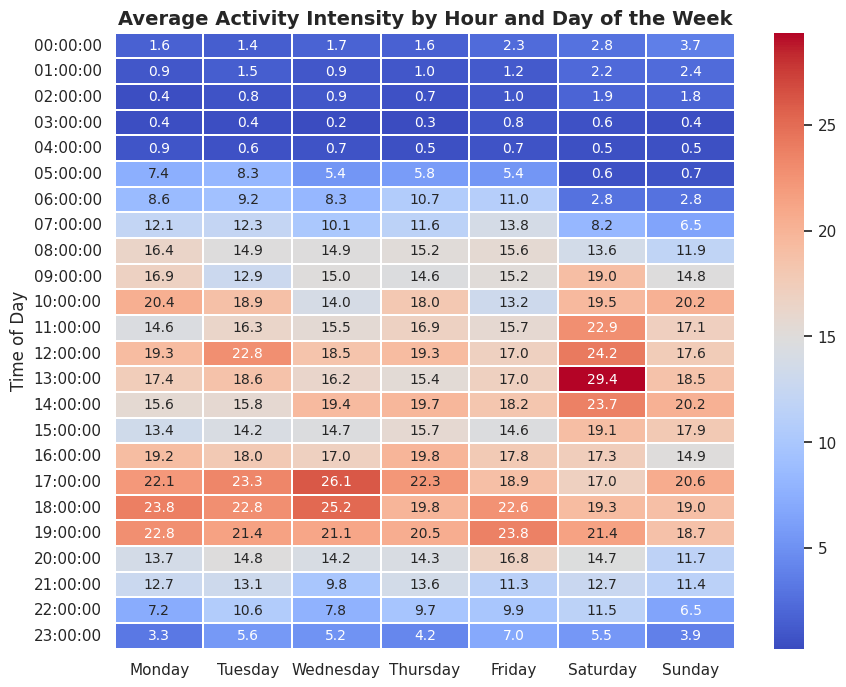

In [143]:
# @title Distribucion horaria y semanal

intensity = Intensity

# Asegurarse de que las columnas de fechas y horas están en el formato correcto
intensity['weekDay'] = intensity['Date'].dt.day_name()

# Agrupar los datos por día de la semana y hora, y calcular la media de la intensidad
intensityWeekDay = intensity.groupby(['weekDay', 'Hour']).agg(
    intensity=('TotalIntensity', 'mean')
).reset_index()

# Ordenar los días de la semana correctamente
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=0.8)  # Ajustar el tamaño de la fuente
heatmap_data = intensityWeekDay.pivot( index='Hour', columns='weekDay', values='intensity')
heatmap_data = heatmap_data[order]  # Ordenar los días de la semana

# Aplicar estilo al mapa de calor
sns.set_theme(style="whitegrid")

# Crear el heatmap
ax = sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.1, linecolor='white', annot=True, fmt='.1f', cbar=True, annot_kws={"size": 10})

# Añadir títulos y etiquetas
ax.set_title('Average Activity Intensity by Hour and Day of the Week', fontsize=14, weight='bold')
ax.set_xlabel('')
ax.set_ylabel('Time of Day', fontsize=12)

heatmap_data.xaxis.tick_top()
heatmap_data.xaxis.set_label_position('top')

# Girar etiquetas de los días de la semana
plt.xticks(rotation=45)

# Mostrar el heatmap
plt.show()


## Combinamos tablas

In [144]:
# @title Intensity & Activity
combined_Intensity_Actitity = pd.merge(Intensity_summary, Activity_summary, on='Id')
combined_Intensity_Actitity

Id  Registros_total  minIntensity  maxIntensity  AverageIntensity  \
0   1503960366              717           0.0      2.650000          0.269503   
1   1624580081              736           0.0      2.816667          0.133990   
2   1644430081              708           0.0      2.166667          0.175330   
3   1844505072              731           0.0      1.116667          0.083698   
4   1927972279              736           0.0      1.050000          0.030956   
5   2022484408              736           0.0      2.616667          0.283854   
6   2026352035              736           0.0      0.933333          0.180208   
7   2320127002              735           0.0      1.116667          0.145714   
8   2347167796              414           0.0      2.200000          0.242029   
9   2873212765              736           0.0      2.466667          0.251698   
10  3372868164              472           0.0      1.750000          0.256321   
11  3977333714              696           0.0      2.450000          0.253807   
12  4020332650              732           0.0      1.966667          0.072632   
13  4057192912               88           0.0      0.516667          0.081629   
14  4319703577              724           0.0      1.450000          0.188513   
15  4388161847              735           0.0      2.566667          0.238526   
16  4445114986              735           0.0      2.283333          0.163220   
17  4558609924              736           0.0      2.050000          0.240829   
18  4702921684              731           0.0      1.983333          0.215527   
19  5553957443              730           0.0      2.400000          0.214064   
20  5577150313              708           0.0      3.000000          0.331591   
21  6117666160              660           0.0      1.183333          0.209015   
22  6290855005              665           0.0      1.700000          0.176667   
23  6775888955              610           0.0      1.866667          0.072896   
24  6962181067              732           0.0      2.650000          0.247928   
25  7007744171              601           0.0      2.900000          0.293012   
26  7086361926              733           0.0      2.766667          0.226057   
27  8053475328              735           0.0      2.983333          0.299161   
28  8253242879              431           0.0      2.483333          0.151779   
29  8378563200              735           0.0      2.750000          0.247642   
30  8583815059              718           0.0      2.966667          0.152182   
31  8792009665              672           0.0      1.400000          0.073909   
32  8877689391              735           0.0      3.000000          0.318027   

    days_used  Avg_dist_user  Avg_Step_user  
0          31       7.809677   12116.741935  
1          31       3.914839    5743.903226  
2          30       5.295333    7282.966667  
3          31       1.706129    2580.064516  
4          31       0.634516     916.129032  
5          31       8.084193   11370.645161  
6          31       3.454839    5566.870968  
7          31       3.187742    4716.870968  
8          18       6.355556    9519.666667  
9          31       5.101613    7555.774194  
10         20       4.707000    6861.650000  
11         30       7.517000   10984.566667  
12         31       1.626129    2267.225806  
13          4       2.862500    3838.000000  
14         31       4.892258    7268.838710  
15         31       8.393226   10813.935484  
16         31       3.245806    4796.548387  
17         31       5.080645    7685.129032  
18         31       6.955161    8572.064516  
19         31       5.639677    8612.580645  
20         30       6.213333    8304.433333  
21         28       5.342143    7046.714286  
22         29       4.272414    5649.551724  
23         26       1.813462    2519.692308  
24         31       6.585806    9794.806452  
25         26       8.015385   11323.423077  
26         31  

Graficamos:
1. Steps vs Intensidad
2. Distancia vs Intensidad
3. Distancia recorrida vs Steps ('Activity')
4. Intensidad vs IBM

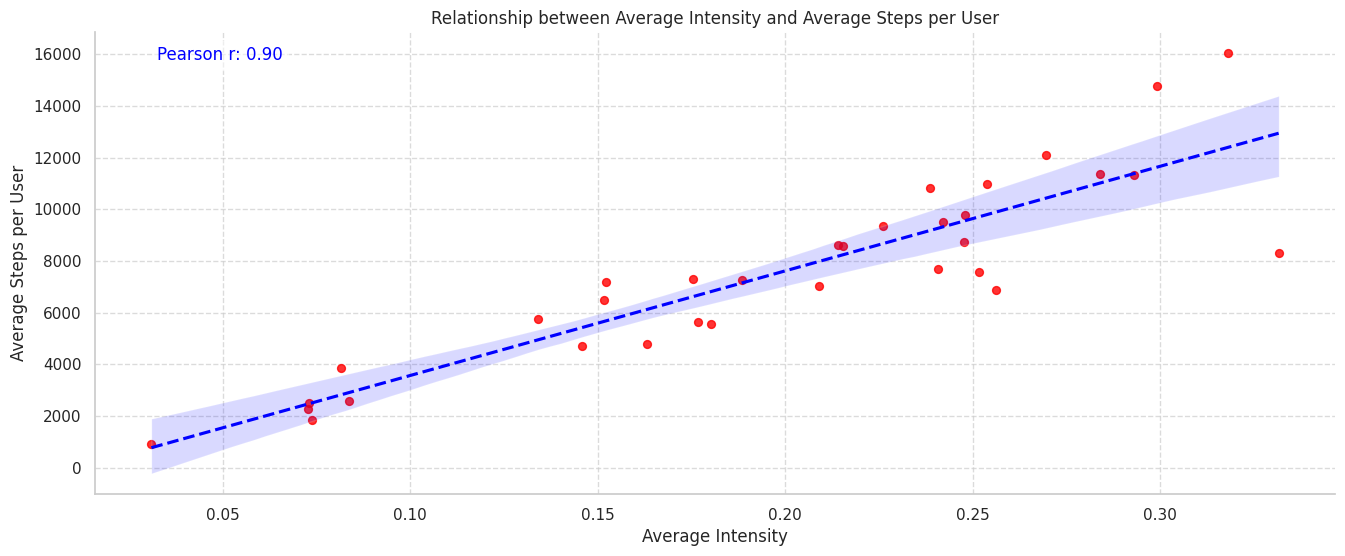

In [145]:
# @title Step vs Intensidad
# Calcular el coeficiente de correlación de Pearson
correlation, _ = pearsonr(combined_Intensity_Actitity['AverageIntensity'], combined_Intensity_Actitity['Avg_Step_user'])

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(16, 6))
plt.scatter(combined_Intensity_Actitity['AverageIntensity'], combined_Intensity_Actitity['Avg_Step_user'], s=32, alpha=0.8, color='red')

# Añadir línea de tendencia
sns.regplot(x='AverageIntensity', y='Avg_Step_user', data=combined_Intensity_Actitity, scatter=False, color='blue', line_kws={'linestyle':'--'})

# Configurar ejes
plt.xlabel('Average Intensity')
plt.ylabel('Average Steps per User')
plt.title('Relationship between Average Intensity and Average Steps per User')

# Añadir el coeficiente de correlación en el gráfico
plt.text(0.05, 0.95, f'Pearson r: {correlation:.2f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.5))

# Mejorar las espinas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


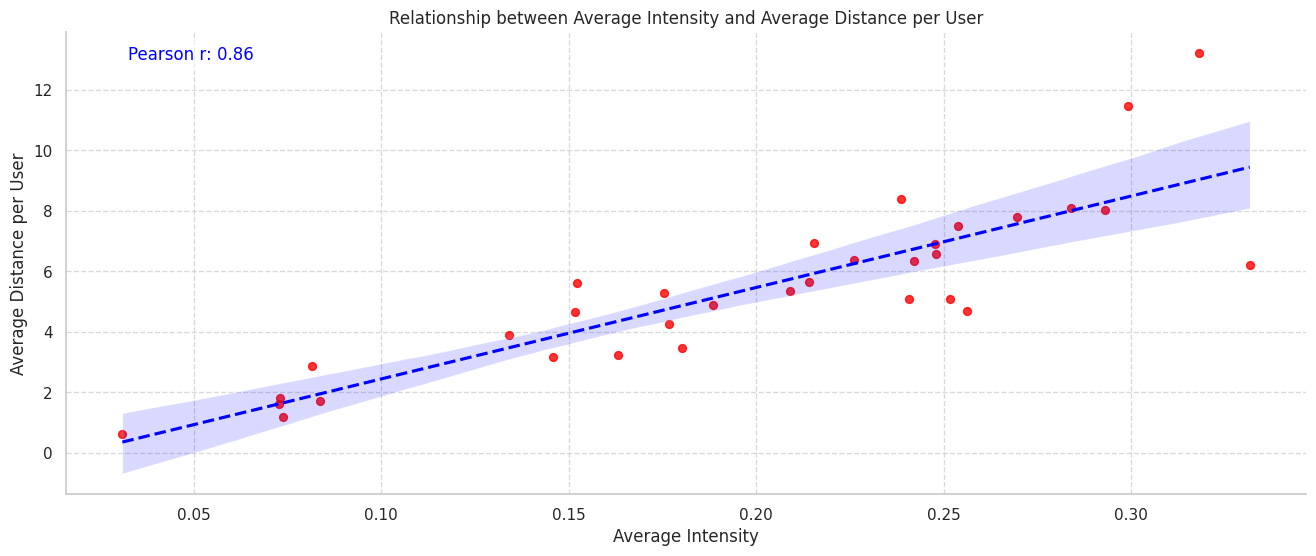

In [146]:
# @title Distancia vs Intensidad
# Calcular el coeficiente de correlación de Pearson
correlation, _ = pearsonr(combined_Intensity_Actitity['AverageIntensity'], combined_Intensity_Actitity['Avg_dist_user'])

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(16, 6))
plt.scatter(combined_Intensity_Actitity['AverageIntensity'], combined_Intensity_Actitity['Avg_dist_user'], s=32, alpha=0.8, color='red')

# Añadir línea de tendencia
sns.regplot(x='AverageIntensity', y='Avg_dist_user', data=combined_Intensity_Actitity, scatter=False, color='blue', line_kws={'linestyle':'--'})

# Configurar ejes
plt.xlabel('Average Intensity')
plt.ylabel('Average Distance per User')
plt.title('Relationship between Average Intensity and Average Distance per User')

# Añadir el coeficiente de correlación en el gráfico
plt.text(0.05, 0.95, f'Pearson r: {correlation:.2f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.5))

# Mejorar las espinas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


In [147]:
Intensity_Heart =  pd.merge(Intensity_summary, Summary_Heart,  on='Id')
df_results2 = pd.DataFrame(Intensity_Heart)
df_results2.to_csv('Intensity_HeartRate.csv')
Intensity_Heart

Id  Registros_total  minIntensity  maxIntensity  AverageIntensity  \
0   2022484408              736           0.0      2.616667          0.283854   
1   2347167796              414           0.0      2.200000          0.242029   
2   4020332650              732           0.0      1.966667          0.072632   
3   4388161847              735           0.0      2.566667          0.238526   
4   4558609924              736           0.0      2.050000          0.240829   
5   5553957443              730           0.0      2.400000          0.214064   
6   5577150313              708           0.0      3.000000          0.331591   
7   6117666160              660           0.0      1.183333          0.209015   
8   6962181067              732           0.0      2.650000          0.247928   
9   7007744171              601           0.0      2.900000          0.293012   
10  8792009665              672           0.0      1.400000          0.073909   
11  8877689391              735           0.0      3.000000          0.318027   

    Days  Cantidad_registro  valor_minimo  valor_maximo      media  
0     31             154104            38           203  80.236860  
1     18             152683            49           195  76.722792  
2     16             285461            46           191  82.300577  
3     30             249748            39           180  66.132998  
4     31             192168            44           199  81.673947  
5     31             255174            47           165  68.633093  
6     28             248560            36           174  69.564516  
7     23             158899            52           189  83.749891  
8     31             266326            47           184  77.724045  
9     24             133592            54           166  91.123795  
10    18             122841            43           158  72.487484  
11    31             228840            46           180  83.611305

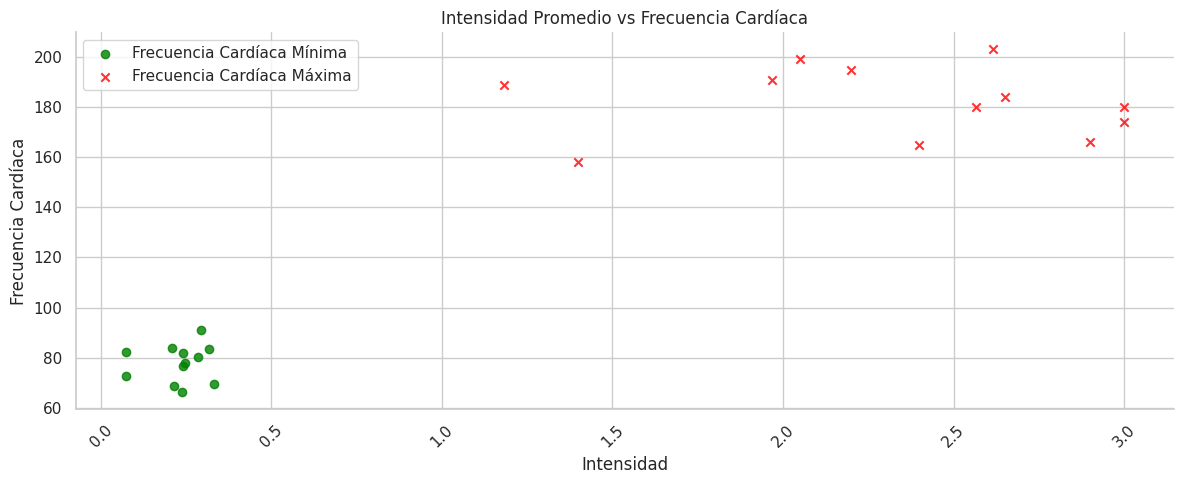

In [148]:
# @title Intensidad vs Frecuencia Cardíaca
# Crear el gráfico de dispersión
plt.figure(figsize=(12, 5))

# Gráfico para la frecuencia cardíaca mínima
plt.scatter(Intensity_Heart['AverageIntensity'], Intensity_Heart['media'], color='green', label='Frecuencia Cardíaca Mínima', alpha=0.8, marker='o')

# Gráfico para la frecuencia cardíaca máxima
plt.scatter(Intensity_Heart['maxIntensity'], Intensity_Heart['valor_maximo'], color='red', label='Frecuencia Cardíaca Máxima', alpha=0.8, marker='x')

# Personalizar el gráfico
plt.gca().spines[['top', 'right']].set_visible(False)
plt.title('Intensidad Promedio vs Frecuencia Cardíaca')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia Cardíaca')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')  # Añadir la leyenda y la ajusta para diferenciar las series
plt.tight_layout()  # Ajustar el espaciado automáticamente
plt.show()


                         Id  Registros_total  minIntensity  maxIntensity  \
Id                 1.000000         0.244933           NaN     -0.011989   
Registros_total    0.244933         1.000000           NaN      0.146137   
minIntensity            NaN              NaN           NaN           NaN   
maxIntensity      -0.011989         0.146137           NaN      1.000000   
AverageIntensity  -0.056522        -0.032430           NaN      0.752596   
Days               0.048040         0.569706           NaN      0.569692   
Cantidad_registro -0.032100         0.540541           NaN      0.355433   
valor_minimo       0.263944        -0.462054           NaN     -0.270965   
valor_maximo      -0.711515        -0.049731           NaN     -0.067293   
media              0.123741        -0.164698           NaN     -0.025175   

                   AverageIntensity      Days  Cantidad_registro  \
Id                        -0.056522  0.048040          -0.032100   
Registros_total           -

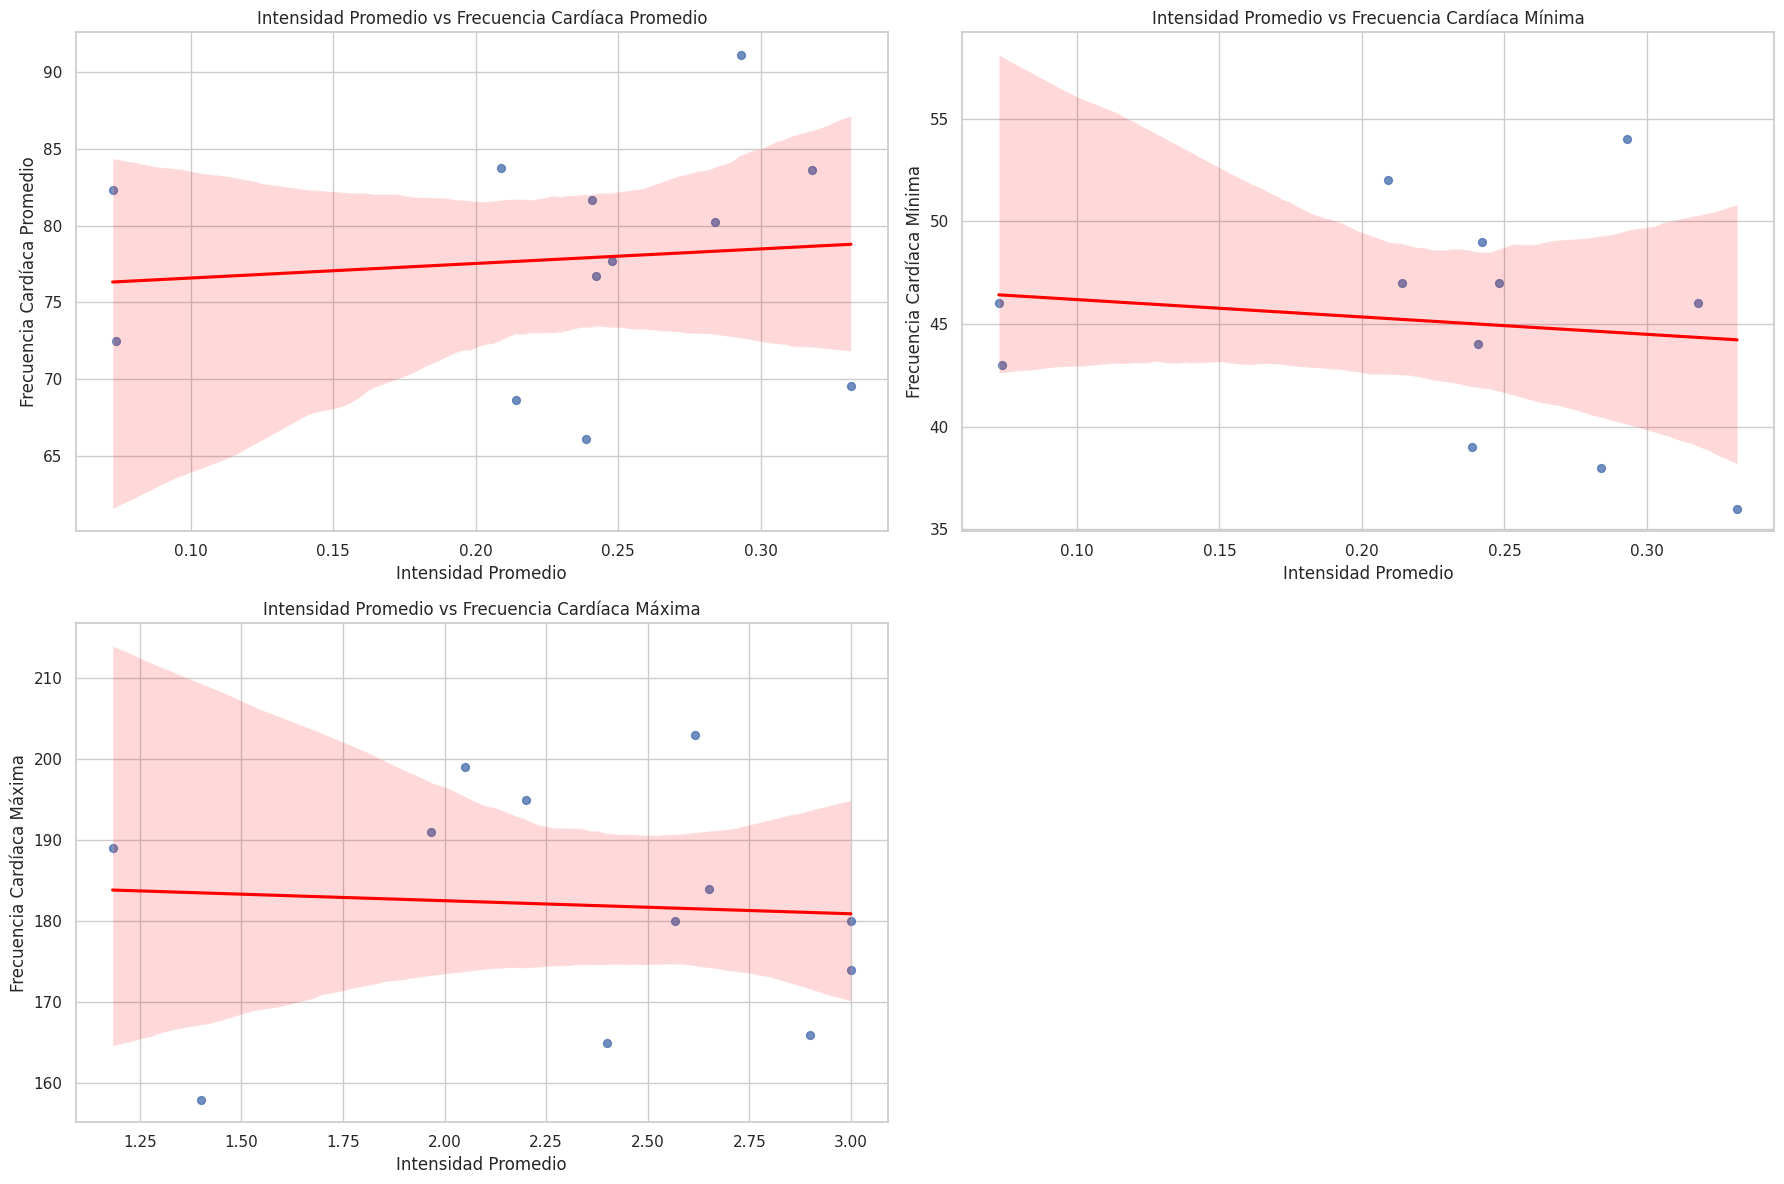

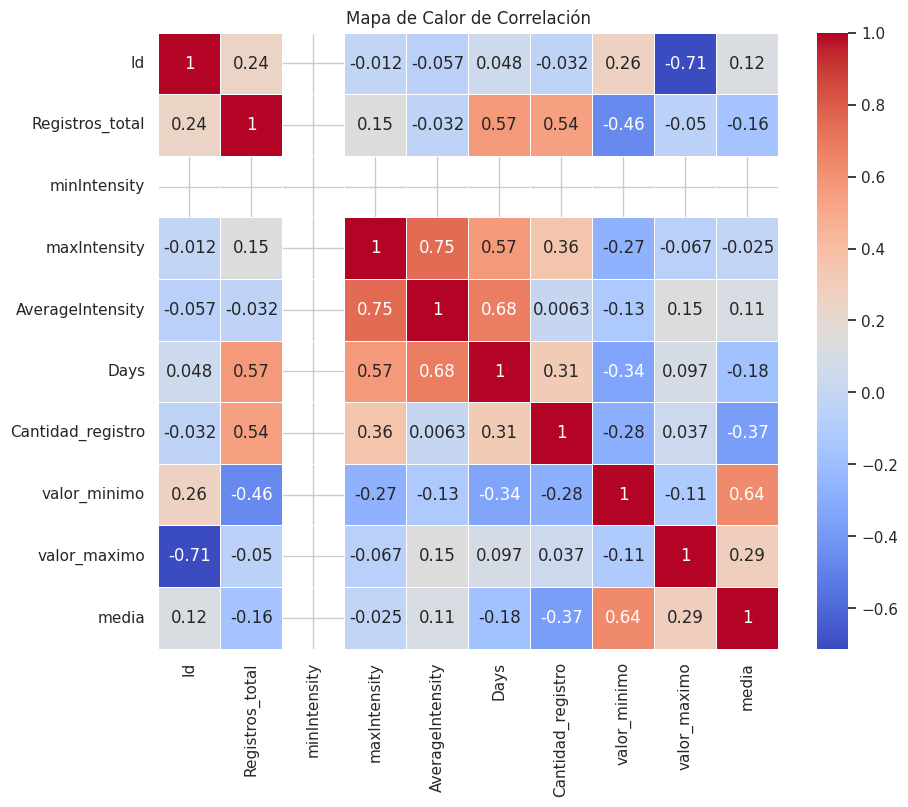

In [149]:
# Calcular las correlaciones
data = Intensity_Heart
correlations = data.corr()

# Mostrar las correlaciones
print(correlations)


# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear gráficos de dispersión con líneas de tendencia
plt.figure(figsize=(18, 12))

# Gráfico 1: Intensidad promedio vs Frecuencia cardíaca promedio
plt.subplot(2, 2, 1)
sns.regplot(x='AverageIntensity', y='media', data=data, scatter_kws={'s': 32, 'alpha': 0.8}, line_kws={'color': 'red'})
plt.title('Intensidad Promedio vs Frecuencia Cardíaca Promedio')
plt.xlabel('Intensidad Promedio')
plt.ylabel('Frecuencia Cardíaca Promedio')

# Gráfico 2: Intensidad promedio vs Frecuencia cardíaca mínima
plt.subplot(2, 2, 2)
sns.regplot(x='AverageIntensity', y='valor_minimo', data=data, scatter_kws={'s': 32, 'alpha': 0.8}, line_kws={'color': 'red'})
plt.title('Intensidad Promedio vs Frecuencia Cardíaca Mínima')
plt.xlabel('Intensidad Promedio')
plt.ylabel('Frecuencia Cardíaca Mínima')

# Gráfico 3: Intensidad promedio vs Frecuencia cardíaca máxima
plt.subplot(2, 2, 3)
sns.regplot(x='maxIntensity', y='valor_maximo', data=data, scatter_kws={'s': 32, 'alpha': 0.8}, line_kws={'color': 'red'})
plt.title('Intensidad Promedio vs Frecuencia Cardíaca Máxima')
plt.xlabel('Intensidad Promedio')
plt.ylabel('Frecuencia Cardíaca Máxima')

# Ajustar diseño y mostrar gráficos
plt.tight_layout()
plt.show()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()


## Full Summary 'Activity', 'Weight', 'Intensity'

In [150]:
# @title Full Summary (Activity, IBM y Intensity)
# Combinamos la tabla de Activity, IBM y Intensity
Full_summary =  pd.merge(combined_BMI_Activity, Intensity_summary,  on='Id')
Full_summary

Id  days_used_x  max_weight  min_weight  Avg_BMI_user  Height_user  \
0  1503960366            2   52.599998   52.599998     22.650000     1.523908   
1  1927972279            1  133.500000  133.500000     47.540001     1.675757   
2  2873212765            2   57.299999   56.700001     21.570001     1.625596   
3  4319703577            2   72.400002   72.300003     27.415000     1.624521   
4  4558609924            5   70.300003   69.099998     27.214000     1.599680   
5  5577150313            1   90.699997   90.699997     28.000000     1.799802   
6  6962181067           30   62.500000   61.000000     24.028000     1.600542   
7  8877689391           24   85.800003   84.000000     25.487083     1.827770   

         Category  days_used_y  Avg_dist_user  Avg_Step_user  Registros_total  \
0   healthy range           31       7.809677   12116.741935              717   
1  severe obesity           31       0.634516     916.129032              736   
2   healthy range           31       5.101613    7555.774194              736   
3      overweight           31       4.892258    7268.838710              724   
4      overweight           31       5.080645    7685.129032              736   
5      overweight           30       6.213333    8304.433333              708   
6   healthy range           31       6.585806    9794.806452              732   
7      overweight           31      13.212903   16040.032258              735   

   minIntensity  maxIntensity  AverageIntensity  
0           0.0      2.650000          0.269503  
1           0.0      1.050000          0.030956  
2           0.0      2.466667          0.251698  
3           0.0      1.450000          0.188513  
4           0.0      2.050000          0.240829  
5           0.0      3.000000          0.331591  
6           0.0      2.650000          0.247928  
7           0.0      3.000000          0.318027

Script más sencillo de Gráfico de dispersión

```
Full_summary.plot(kind='scatter', x='AverageIntensity', y='Avg_BMI_user', s=32, alpha=.8, color = 'blue', figsize=(10, 6))
plt.xlabel('Average Intensity')
plt.ylabel('Average BMI per User')
plt.title('Relationship between Average Intensity and Average BMI per User')
plt.gca().spines[['top', 'right',]].set_visible(False)
```



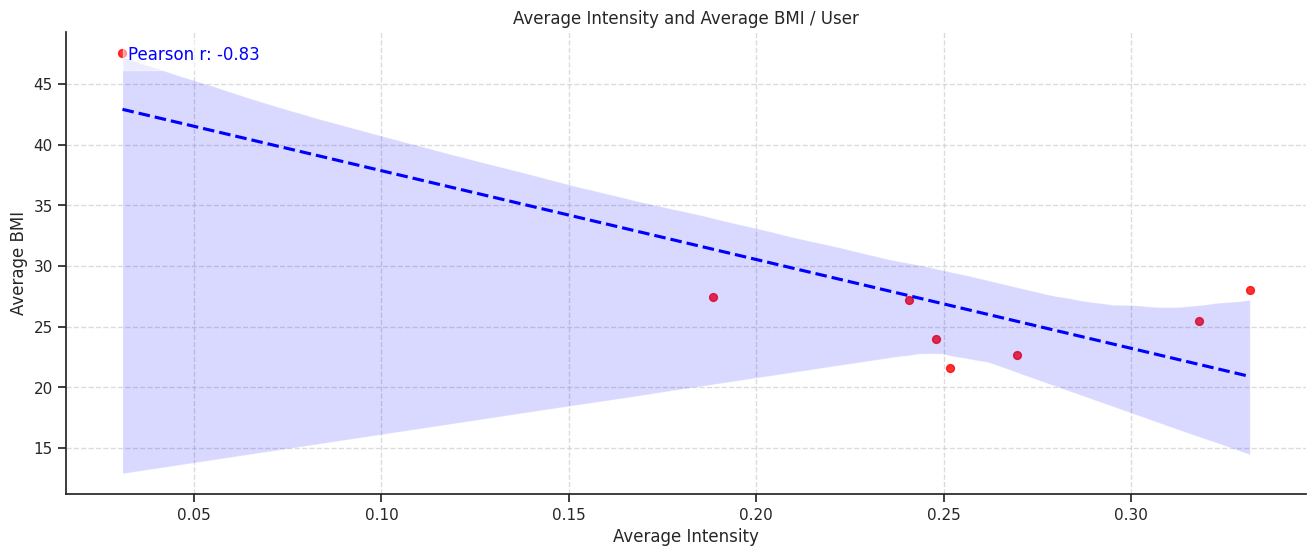

In [151]:
# @title Intensity vs IBM
# Calcular el coeficiente de correlación de Pearson
correlation, _ = pearsonr(Full_summary['AverageIntensity'], Full_summary['Avg_BMI_user'])

# Configuración de estilo
sns.set(style="ticks")

# Crear el gráfico
plt.figure(figsize=(16, 6))
plt.scatter(Full_summary['AverageIntensity'], Full_summary['Avg_BMI_user'], s=32, alpha=0.8, color='red')

# Añadir línea de tendencia
sns.regplot(x='AverageIntensity', y='Avg_BMI_user', data=Full_summary, scatter=False, color='blue', line_kws={'linestyle':'--'})

# Configurar ejes
plt.xlabel('Average Intensity')
plt.ylabel('Average BMI')
plt.title('Average Intensity and Average BMI / User')

# Añadir el coeficiente de correlación en el gráfico
plt.text(0.05, 0.95, f'Pearson r: {correlation:.2f}', ha='left', va='center', transform=plt.gca().transAxes, fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.5))

# Mejorar las espinas
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Añadir cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

## Análisis del tiempo invertido para el uso de los dispositivos

Con el dataset 'Activity', agruparemos por Id y contamos los dias que cada usuario ha registrado. Luego clasificamos los usuarios de acuerdo a esta cantidad de la siguiente manera:
* 0 a 10 dias: Poco Uso
* 11 a 20 días: Uso Moderado
* 21 a 31 días: Uso Normal (ideal)

In [152]:
# Se usa la tabla Activity_summary y se agrega otra columna con la clasificación establecida

# Asignar niveles de usuario basado en days_used
Activity_summary['user_level'] = pd.cut(Activity_summary['days_used'],
                                    bins=[0, 10,20,32],
                                    labels=["Poco", "Moderado", "Normal"],
                                    include_lowest=True, right=True)
# Ordenar por day_used
Activity_summary = Activity_summary.sort_values(by='days_used')

# Mostrar los registros
print(Activity_summary)


            Id  days_used  Avg_dist_user  Avg_Step_user user_level
13  4057192912          4       2.862500    3838.000000       Poco
8   2347167796         18       6.355556    9519.666667   Moderado
28  8253242879         19       4.667368    6482.157895   Moderado
10  3372868164         20       4.707000    6861.650000   Moderado
25  7007744171         26       8.015385   11323.423077     Normal
23  6775888955         26       1.813462    2519.692308     Normal
21  6117666160         28       5.342143    7046.714286     Normal
31  8792009665         29       1.186552    1853.724138     Normal
22  6290855005         29       4.272414    5649.551724     Normal
2   1644430081         30       5.295333    7282.966667     Normal
20  5577150313         30       6.213333    8304.433333     Normal
11  3977333714         30       7.517000   10984.566667     Normal
0   1503960366         31       7.809677   12116.741935     Normal
24  6962181067         31       6.585806    9794.806452     No

In [153]:
# Agrupar por user_level y contar el número de usuarios en cada nivel
Activity_summary_level = Activity_summary.groupby('user_level').size().reset_index(name='total')

# Calcular el total de usuarios
total_users = Activity_summary_level['total'].sum()

'''
# Calcular el porcentaje de usuarios en cada nivel
Activity_summary_level['total_percent'] = round(((Activity_summary_level['total'] / total_users)*100),2)
'''
Activity_summary_level


user_level  total
0       Poco      1
1   Moderado      3
2     Normal     29

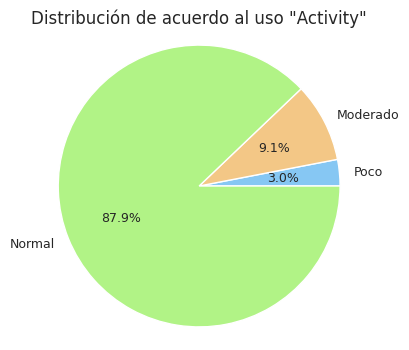

In [154]:
# @title Gráfico Circular de uso por Activity

#Activity_summary_level ['labels'] = (Activity_summary_level ['total_percent']).map("{:.2f}%".format)

# Crear el gráfico circular
plt.figure(figsize=(4, 4))

colors = ['#86C7F3', '#F3C786', '#B1F386', '#F38686'] # Colores pasteles
#colors = ['#F25022', '#7FBA00', '#00A4EF', '#FFB900'] # Define los colores para cada nivel
#colors = ['#3182bd', '#6baed6', '#9ecae1', '#c6dbef'] #Colores azules

plt.pie(Activity_summary_level ['total'], labels=Activity_summary_level ['user_level'],
        autopct='%1.1f%%', startangle=0, textprops=dict(fontsize=9), colors=colors)

# Añadir un título
plt.title('Distribución de acuerdo al uso "Activity"')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()



Repetimos con la tabla 'Calories'. Mismos resultados

In [155]:
# Agrupar por id y contar los días registrados
Calory_Summary = Calories.groupby('Id').size().reset_index(name='days_used')

# Asignar niveles de usuario basado en day_used, quedan clasificados
Calory_Summary['user_level'] = pd.cut(Calory_Summary['days_used'],
                                    bins=[0, 7, 15, 23, 31],
                                    labels=["Silver", "Gold", "Platinum", "Diamond"],
                                    include_lowest=True, right=True)

# Ordenar por day_used
Calory_Summary = Calory_Summary.sort_values(by='days_used')

# Mostrar los primeros registros
#print(daysCalory_perUser)


# Agrupar por user_level y contar el número de usuarios en cada nivel
Calory_Summary_level = Calory_Summary.groupby('user_level').size().reset_index(name='total')

# Calcular el total de usuarios
total_users = Calory_Summary_level['total'].sum()

# Calcular el porcentaje de usuarios en cada nivel
# Calory_Summary_level['total_percent'] = round(((Calory_Summary_level['total'] / total_users)*100),2)

Calory_Summary_level

user_level  total
0     Silver      1
1       Gold      0
2   Platinum      3
3    Diamond     29

Los resultados son los mismos, a pesar que las tablas son diferentes. Asumimos que de la tabla 'Calories' arrojará mismos resultados

## 'Sleep'
Exploramos su contenido

In [156]:
Sleep

Id            SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12 12:00:00                  1                 327   
1    1503960366 2016-04-13 12:00:00                  2                 384   
2    1503960366 2016-04-15 12:00:00                  1                 412   
3    1503960366 2016-04-16 12:00:00                  2                 340   
4    1503960366 2016-04-17 12:00:00                  1                 700   
..          ...                 ...                ...                 ...   
408  8792009665 2016-04-30 12:00:00                  1                 343   
409  8792009665 2016-05-01 12:00:00                  1                 503   
410  8792009665 2016-05-02 12:00:00                  1                 415   
411  8792009665 2016-05-03 12:00:00                  1                 516   
412  8792009665 2016-05-04 12:00:00                  1                 439   

     TotalTimeInBed  
0               346  
1               407  
2               442  
3               367  
4               712  
..              ...  
408             360  
409             527  
410             423  
411             545  
412             463  

[413 rows x 5 columns]

In [157]:
Sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


Extraemos la fecha

In [158]:
Sleep ['Date'] = Sleep ['SleepDay'].dt.date #extraemos la fecha de la columna del tiempo
Sleep ['Date']= pd.to_datetime( Sleep ['Date']) #confirmamos que la columna 'date' es del tipo datetime

In [159]:
Sleep

Id            SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12 12:00:00                  1                 327   
1    1503960366 2016-04-13 12:00:00                  2                 384   
2    1503960366 2016-04-15 12:00:00                  1                 412   
3    1503960366 2016-04-16 12:00:00                  2                 340   
4    1503960366 2016-04-17 12:00:00                  1                 700   
..          ...                 ...                ...                 ...   
408  8792009665 2016-04-30 12:00:00                  1                 343   
409  8792009665 2016-05-01 12:00:00                  1                 503   
410  8792009665 2016-05-02 12:00:00                  1                 415   
411  8792009665 2016-05-03 12:00:00                  1                 516   
412  8792009665 2016-05-04 12:00:00                  1                 439   

     TotalTimeInBed       Date  
0               346 2016-04-12  
1               407 2016-04-13  
2               442 2016-04-15  
3               367 2016-04-16  
4               712 2016-04-17  
..              ...        ...  
408             360 2016-04-30  
409             527 2016-05-01  
410             423 2016-05-02  
411             545 2016-05-03  
412             463 2016-05-04  

[413 rows x 6 columns]

In [160]:
# @title Summary Sleep
# Generamos un dataframe resumen,  Agrupar el registro de sueño por usuario y calcular los promedios
Summary_Sleep = Sleep.groupby('Id').agg(
    days_used=('Id', 'size'),
    averageTimeAsleep=('TotalMinutesAsleep', 'mean'),
    averageTimeInBed=('TotalTimeInBed', 'mean')
).reset_index()
Summary_Sleep


Id  days_used  averageTimeAsleep  averageTimeInBed
0   1503960366         25         360.280000        383.200000
1   1644430081          4         294.000000        346.000000
2   1844505072          3         652.000000        961.000000
3   1927972279          5         417.000000        437.800000
4   2026352035         28         506.178571        537.642857
5   2320127002          1          61.000000         69.000000
6   2347167796         15         446.800000        491.333333
7   3977333714         28         293.642857        461.142857
8   4020332650          8         349.375000        379.750000
9   4319703577         26         476.653846        501.961538
10  4388161847         24         403.125000        426.208333
11  4445114986         28         385.178571        416.821429
12  4558609924          5         127.600000        140.000000
13  4702921684         28         421.142857        441.964286
14  5553957443         31         463.483871        505.870968
15  5577150313         26         432.000000        460.615385
16  6117666160         18         478.777778        510.166667
17  6775888955          3         349.666667        369.000000
18  6962181067         31         448.000000        466.129032
19  7007744171          2          68.500000         71.500000
20  7086361926         24         453.125000        466.416667
21  8053475328          3         297.000000        301.666667
22  8378563200         32         443.343750        483.312500
23  8792009665         15         435.666667        453.800000

Vemos promedio de registros por usuario

In [161]:
Promedio_Registro_sleep = Summary_Sleep['days_used'].mean()
print(Promedio_Registro_sleep)

17.208333333333332


Diferencia entre los minutos totales en cama con los minutos de sueño (dormidos)


In [162]:
 # @title Gap de descanso
#Para eso añadimos otra columna , calculando la diferencia
Sleep ['rest_gap'] = Sleep['TotalTimeInBed'] - Sleep ['TotalMinutesAsleep']
Sleep


Id            SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12 12:00:00                  1                 327   
1    1503960366 2016-04-13 12:00:00                  2                 384   
2    1503960366 2016-04-15 12:00:00                  1                 412   
3    1503960366 2016-04-16 12:00:00                  2                 340   
4    1503960366 2016-04-17 12:00:00                  1                 700   
..          ...                 ...                ...                 ...   
408  8792009665 2016-04-30 12:00:00                  1                 343   
409  8792009665 2016-05-01 12:00:00                  1                 503   
410  8792009665 2016-05-02 12:00:00                  1                 415   
411  8792009665 2016-05-03 12:00:00                  1                 516   
412  8792009665 2016-05-04 12:00:00                  1                 439   

     TotalTimeInBed       Date  rest_gap  
0               346 2016-04-12        19  
1               407 2016-04-13        23  
2               442 2016-04-15        30  
3               367 2016-04-16        27  
4               712 2016-04-17        12  
..              ...        ...       ...  
408             360 2016-04-30        17  
409             527 2016-05-01        24  
410             423 2016-05-02         8  
411             545 2016-05-03        29  
412             463 2016-05-04        24  

[413 rows x 7 columns]

Promedio de TotalTimeinBBed =  458.64/ 60 minutoshora = 7.64

Promedio de TotalTimeAsleep = 419.46 / 60 minutoshora = 7 horas al dia

Promedio de siestas, descanso = 0.64 o 40 minutos

In [163]:
# @title Estadisticas de Sleep
# Generar el resumen estadístico
Sleep_stads = Sleep.describe()
Sleep_stads

Id                       SleepDay  TotalSleepRecords  \
count  4.130000e+02                            413         413.000000   
mean   5.000979e+09  2016-04-27 00:40:05.811138304           1.118644   
min    1.503960e+09            2016-04-12 12:00:00           1.000000   
25%    3.977334e+09            2016-04-19 12:00:00           1.000000   
50%    4.702922e+09            2016-04-27 12:00:00           1.000000   
75%    6.962181e+09            2016-05-04 12:00:00           1.000000   
max    8.792010e+09            2016-05-12 12:00:00           3.000000   
std    2.060360e+09                            NaN           0.345521   

       TotalMinutesAsleep  TotalTimeInBed                           Date  \
count          413.000000      413.000000                            413   
mean           419.467312      458.639225  2016-04-26 12:40:05.811137792   
min             58.000000       61.000000            2016-04-12 00:00:00   
25%            361.000000      403.000000            2016-04-19 00:00:00   
50%            433.000000      463.000000            2016-04-27 00:00:00   
75%            490.000000      526.000000            2016-05-04 00:00:00   
max            796.000000      961.000000            2016-05-12 00:00:00   
std            118.344679      127.101607                            NaN   

         rest_gap  
count  413.000000  
mean    39.171913  
min      0.000000  
25%     17.000000  
50%     25.000000  
75%     40.000000  
max    371.000000  
std     46.570095

Obtenemos el día de la semana de las actividades

In [164]:
Sleep ['DayOfWeek'] = Sleep ['Date'].dt.day_name()
df_results3 = pd.DataFrame(Sleep)
df_results3.to_csv('Sleep_dayofweek.csv')
Sleep

Id            SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12 12:00:00                  1                 327   
1    1503960366 2016-04-13 12:00:00                  2                 384   
2    1503960366 2016-04-15 12:00:00                  1                 412   
3    1503960366 2016-04-16 12:00:00                  2                 340   
4    1503960366 2016-04-17 12:00:00                  1                 700   
..          ...                 ...                ...                 ...   
408  8792009665 2016-04-30 12:00:00                  1                 343   
409  8792009665 2016-05-01 12:00:00                  1                 503   
410  8792009665 2016-05-02 12:00:00                  1                 415   
411  8792009665 2016-05-03 12:00:00                  1                 516   
412  8792009665 2016-05-04 12:00:00                  1                 439   

     TotalTimeInBed       Date  rest_gap  DayOfWeek  
0               346 2016-04-12        19    Tuesday  
1               407 2016-04-13        23  Wednesday  
2               442 2016-04-15        30     Friday  
3               367 2016-04-16        27   Saturday  
4               712 2016-04-17        12     Sunday  
..              ...        ...       ...        ...  
408             360 2016-04-30        17   Saturday  
409             527 2016-05-01        24     Sunday  
410             423 2016-05-02         8     Monday  
411             545 2016-05-03        29    Tuesday  
412             463 2016-05-04        24  Wednesday  

[413 rows x 8 columns]

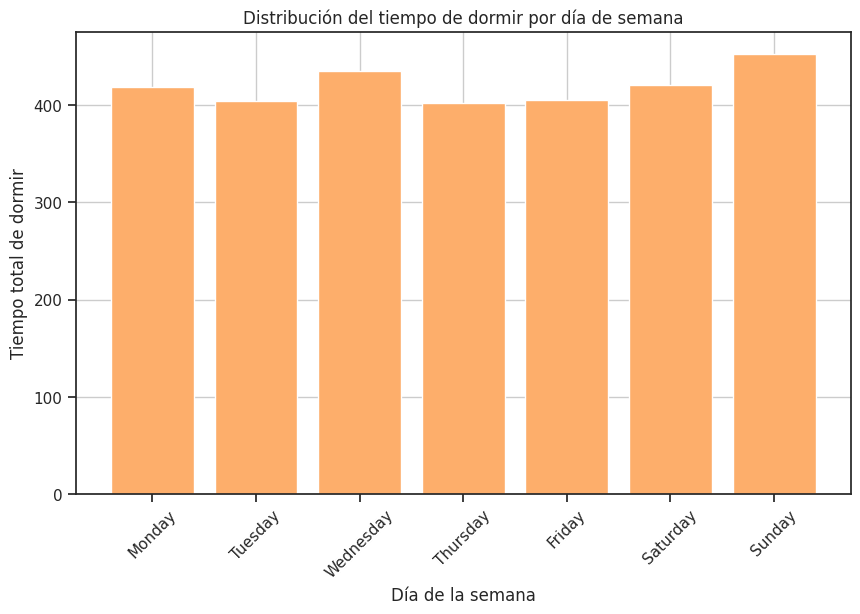

In [165]:
# @title Distribución del tiempo de dormir por dia de la semana
#DayOfWeek

df_weekday_sleep = Sleep.groupby('DayOfWeek')['TotalMinutesAsleep'].mean().reset_index()
df_weekday_sleep
# Ordenar los días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday_sleep['DayOfWeek'] = pd.Categorical(df_weekday_sleep['DayOfWeek'], categories=days_order, ordered=True)
df_weekday_sleep = df_weekday_sleep.sort_values('DayOfWeek')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_weekday_sleep['DayOfWeek'], df_weekday_sleep['TotalMinutesAsleep'], color='#fdae6b')
#'#31a354', '#74c476', '#a1d99b', '#c7e9c0' verdes
#'#e6550d', '#fd8d3c', '#fdae6b', '#fdd0a2' rojos/naranjas

plt.xlabel('Día de la semana')
plt.ylabel('Tiempo total de dormir')
plt.title('Distribución del tiempo de dormir por día de semana')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

* Los domingos los días que le dedican más al descanso

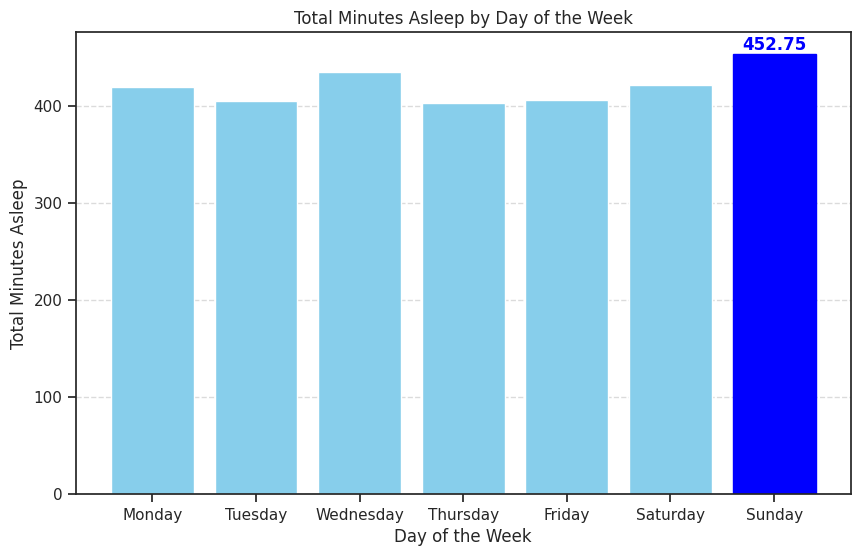

In [166]:
sleep_data = Sleep

# Group by day of the week and calculate the total minutes asleep
sleep_summary = sleep_data.groupby('DayOfWeek')['TotalMinutesAsleep'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Identify the day with the maximum total sleep time
max_sleep_day = sleep_summary.idxmax()
max_sleep_value = round(sleep_summary.max(), 2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(sleep_summary.index, sleep_summary.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Minutes Asleep')
plt.title('Total Minutes Asleep by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the bar with the maximum value
for bar in bars:
    if bar.get_x() + bar.get_width() / 2 == sleep_summary.index.get_loc(max_sleep_day):
        bar.set_color('blue')
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{max_sleep_value}',
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')

plt.show()


In [167]:
# @title Sleep & Activity
Activity = Activity.rename(columns={'ActivityDate': 'Date'})

combined_Sleep_Actitity = pd.merge(Sleep, Activity, on=('Id', 'Date')) # how='outer'
combined_Sleep_Actitity

Id            SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366 2016-04-12 12:00:00                  1                 327   
1    1503960366 2016-04-13 12:00:00                  2                 384   
2    1503960366 2016-04-15 12:00:00                  1                 412   
3    1503960366 2016-04-16 12:00:00                  2                 340   
4    1503960366 2016-04-17 12:00:00                  1                 700   
..          ...                 ...                ...                 ...   
408  8792009665 2016-04-30 12:00:00                  1                 343   
409  8792009665 2016-05-01 12:00:00                  1                 503   
410  8792009665 2016-05-02 12:00:00                  1                 415   
411  8792009665 2016-05-03 12:00:00                  1                 516   
412  8792009665 2016-05-04 12:00:00                  1                 439   

     TotalTimeInBed       Date  rest_gap  DayOfWeek  TotalSteps  \
0               346 2016-04-12        19    Tuesday       13162   
1               407 2016-04-13        23  Wednesday       10735   
2               442 2016-04-15        30     Friday        9762   
3               367 2016-04-16        27   Saturday       12669   
4               712 2016-04-17        12     Sunday        9705   
..              ...        ...       ...        ...         ...   
408             360 2016-04-30        17   Saturday        7174   
409             527 2016-05-01        24     Sunday        1619   
410             423 2016-05-02         8     Monday        1831   
411             545 2016-05-03        29    Tuesday        2421   
412             463 2016-05-04        24  Wednesday        2283   

     TotalDistance  ...  LoggedActivitiesDistance  VeryActiveDistance  \
0             8.50  ...                       0.0                1.88   
1             6.97  ...                       0.0                1.57   
2             6.28  ...                       0.0                2.14   
3             8.16  ...                       0.0                2.71   
4             6.48  ...                       0.0                3.19   
..             ...  ...                       ...                 ...   
408           4.59  ...                       0.0                0.33   
409           1.04  ...                       0.0                0.00   
410           1.17  ...                       0.0                0.00   
411           1.55  ...                       0.0                0.00   
412           1.46  ...                       0.0                0.00   

     ModeratelyActiveDistance  LightActiveDistance  SedentaryActiveDistance  \
0                        0.55                 6.06                      0.0   
1                        0.69                 4.71                      0.0   
2                        1.26                 2.83                      0.0   
3                        0.41                 5.04                      0.0   
4                        0.78                 2.51                      0.0   
..                        ...                  ...                      ...   
408                      0.36                 3.91                      0.0   
409                      0.00                 1.04                      0.0   
410                      0.00                 1.17                      0.0   
411                      0.00                 1.55                      0.0   
412                      0.00                 1.46                      0.0   

     VeryActiveMinutes  FairlyActiveMinutes  LightlyActiveMinutes  \
0                   25                   13                   328   
1                   21                   19                   217   
2                   29                   34                   209   
3                   36                   10                   221   
4                   38                   20                   164   
..                 ...         

In [168]:
df_melted = combined_Sleep_Actitity.melt(id_vars=['Id', 'DayOfWeek'], value_vars=['TotalSteps', 'TotalMinutesAsleep'], var_name='Metric', value_name='Value')
#df_melted = combined_Sleep_Actitity.melt(id_vars='Dayofweek', value_vars=['TotalSteps', 'TotalMinutesAsleep'], var_name='Metric', value_name='Value')
df_melted


Id  DayOfWeek              Metric  Value
0    1503960366    Tuesday          TotalSteps  13162
1    1503960366  Wednesday          TotalSteps  10735
2    1503960366     Friday          TotalSteps   9762
3    1503960366   Saturday          TotalSteps  12669
4    1503960366     Sunday          TotalSteps   9705
..          ...        ...                 ...    ...
821  8792009665   Saturday  TotalMinutesAsleep    343
822  8792009665     Sunday  TotalMinutesAsleep    503
823  8792009665     Monday  TotalMinutesAsleep    415
824  8792009665    Tuesday  TotalMinutesAsleep    516
825  8792009665  Wednesday  TotalMinutesAsleep    439

[826 rows x 4 columns]

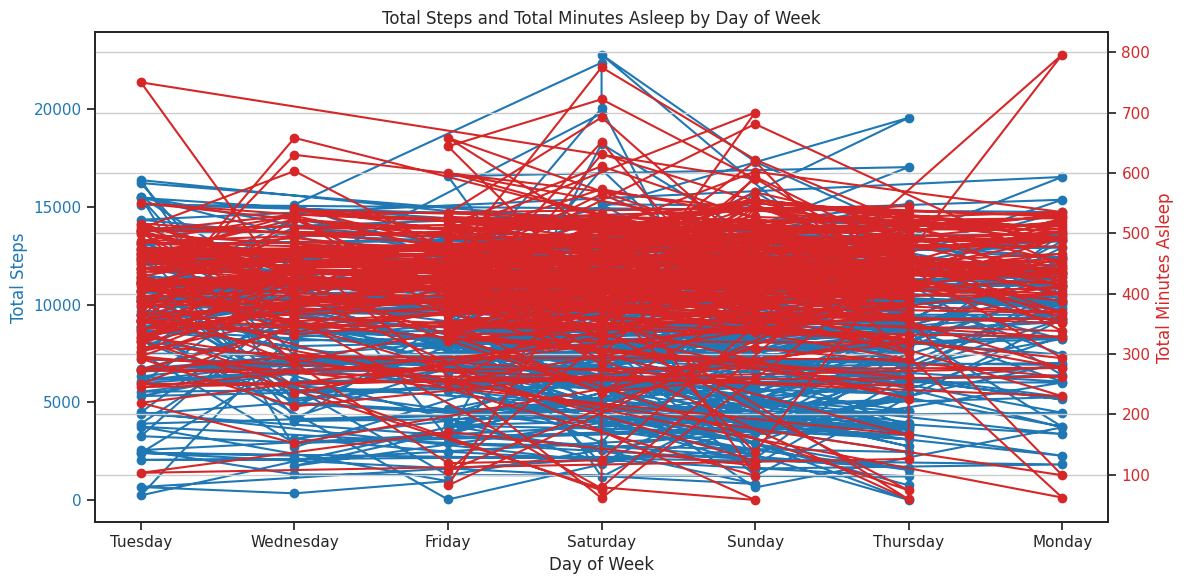

In [169]:
# Crear el gráfico de líneas con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Primer eje Y para TotalSteps
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Total Steps', color='tab:blue')
ax1.plot(combined_Sleep_Actitity['DayOfWeek'], combined_Sleep_Actitity['TotalSteps'], marker='o', color='tab:blue', label='Total Steps')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Segundo eje Y para TotalMinutesAsleep
ax2 = ax1.twinx()
ax2.set_ylabel('Total Minutes Asleep', color='tab:red')
ax2.plot(combined_Sleep_Actitity['DayOfWeek'], combined_Sleep_Actitity['TotalMinutesAsleep'], marker='o', color='tab:red', label='Total Minutes Asleep')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Título y configuración del gráfico
plt.title('Total Steps and Total Minutes Asleep by Day of Week')
fig.tight_layout()
plt.grid(True)
plt.show()

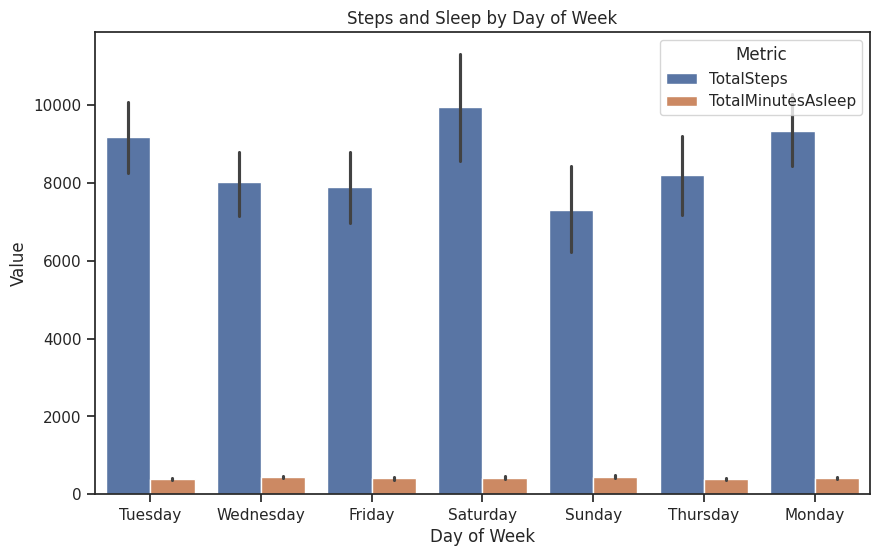

In [170]:
# Transformar el DataFrame para Seaborn
df_melted = combined_Sleep_Actitity.melt(id_vars=['Id', 'DayOfWeek'], value_vars=['TotalSteps', 'TotalMinutesAsleep'], var_name='Metric', value_name='Value')

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='DayOfWeek', y='Value', hue='Metric')

# Configuración del gráfico
plt.title('Steps and Sleep by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Value')
plt.legend(title='Metric')

plt.show()


Analizamos relación entre los minutos sedentarios diarios y el tiempo de descanso

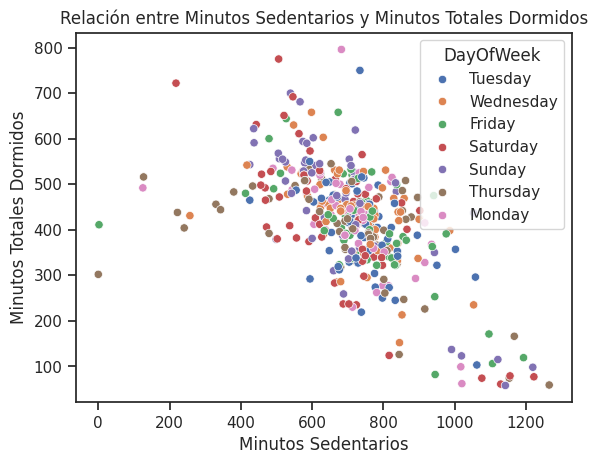

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Crear el gráfico de dispersión
sns.scatterplot(data=combined_Sleep_Actitity, x='SedentaryMinutes', y='TotalMinutesAsleep', hue='DayOfWeek')

# Agregar título y etiquetas
plt.title('Relación entre Minutos Sedentarios y Minutos Totales Dormidos')
plt.xlabel('Minutos Sedentarios')
plt.ylabel('Minutos Totales Dormidos')

# Mostrar el gráfico
plt.show()


Analizamos relación entre los minutos ACTIVOS diarios y el tiempo de descanso

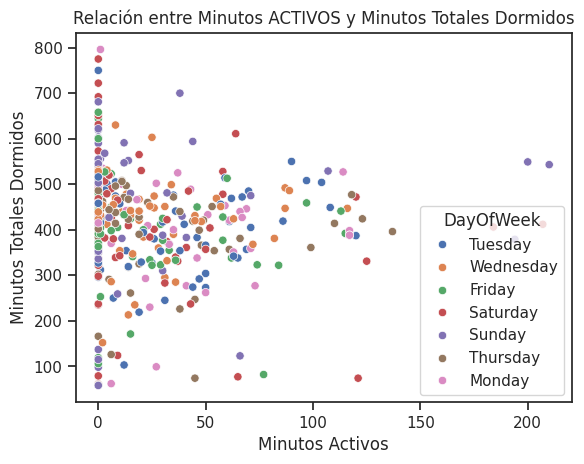

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Crear el gráfico de dispersión
sns.scatterplot(data=combined_Sleep_Actitity, x='VeryActiveMinutes', y='TotalMinutesAsleep', hue='DayOfWeek')

# Agregar título y etiquetas
plt.title('Relación entre Minutos ACTIVOS y Minutos Totales Dormidos')
plt.xlabel('Minutos Activos')
plt.ylabel('Minutos Totales Dormidos')

# Mostrar el gráfico
plt.show()


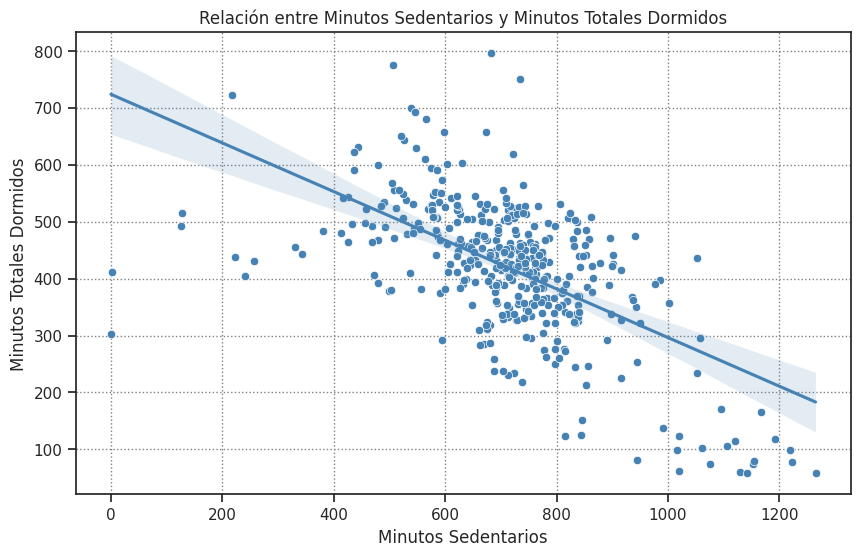

In [173]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_Sleep_Actitity, x='SedentaryMinutes', y='TotalMinutesAsleep', color='steelblue')
sns.regplot(data=combined_Sleep_Actitity, x='SedentaryMinutes', y='TotalMinutesAsleep', scatter=False, color='steelblue')

# Personalizar el gráfico
plt.title('Relación entre Minutos Sedentarios y Minutos Totales Dormidos')
plt.xlabel('Minutos Sedentarios')
plt.ylabel('Minutos Totales Dormidos')
plt.grid(which='major', color='grey', linestyle='dotted')
plt.grid(which='minor', color='grey', linestyle='dotted')
plt.gca().set_facecolor('white')

plt.show()


In [174]:
# Asignar niveles de usuario basado en day_used, se crea otra columna de tipo 'category' que asigna un bin
Summary_Sleep['user_level'] = pd.cut(Summary_Sleep['days_used'],
                                    bins=[0, 10, 20, 32],
                                    labels=["Poco", "Moderado", "Normal"],
                                    include_lowest=True, right=True)
# Ordenar por day_used
Summary_Sleep = Summary_Sleep.sort_values(by='days_used')

# Mostrar los registros
Summary_Sleep

# Agrupar por user_level y contar el número de usuarios en cada nivel
Summary_Sleep_level = Summary_Sleep.groupby('user_level').size().reset_index(name='total')
'''
# Calcular el total de usuarios
total_users = Summary_Sleep_class ['total'].sum()

# Calcular el porcentaje de usuarios en cada nivel
Summary_Sleep_class ['total_percent'] = round(((Summary_Sleep_class ['total'] / total_users)*100),2)
 '''
Summary_Sleep_level



user_level  total
0       Poco      9
1   Moderado      3
2     Normal     12

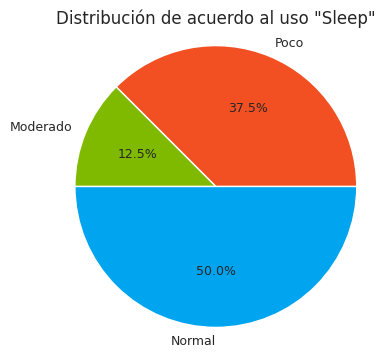

In [175]:
# @title Gráfico Circular de uso Sleep
#Summary_Sleep_level ['labels'] = (Summary_Sleep_level ['total_percent']).map("{:.2f}%".format)

# Crear el gráfico circular
plt.figure(figsize=(4, 4))
plt.pie(Summary_Sleep_level ['total'], labels=Summary_Sleep_level ['user_level'],
        autopct='%1.1f%%', startangle=0, textprops=dict(fontsize=9), colors=['#F25022','#7FBA00','#00A4EF'] )

# Añadir un título
plt.title('Distribución de acuerdo al uso "Sleep"')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

In [176]:
#filtrar el dataframe original Sleep para trabajar sólo con los usuarios que le dan uso 'Normal' y 'Moderado'
#descartar 'Poco'
Sleep_level = Summary_Sleep[Summary_Sleep['user_level'] != 'Poco']
Sleep_level

#unir sleep_level con el dataframe resultante de sleep original de manera que este filtrado también
Sleep_filtered = pd.merge(Sleep_level, Sleep, on=('Id'))
Sleep_filtered

#unir nuevamente con activity
Sleep_filtered_Activity = pd.merge(Sleep_filtered, Activity, on=('Id', 'Date')) # how='outer'
Sleep_filtered_Activity

Id  days_used  averageTimeAsleep  averageTimeInBed user_level  \
0    8792009665         15         435.666667          453.8000   Moderado   
1    8792009665         15         435.666667          453.8000   Moderado   
2    8792009665         15         435.666667          453.8000   Moderado   
3    8792009665         15         435.666667          453.8000   Moderado   
4    8792009665         15         435.666667          453.8000   Moderado   
..          ...        ...                ...               ...        ...   
374  8378563200         32         443.343750          483.3125     Normal   
375  8378563200         32         443.343750          483.3125     Normal   
376  8378563200         32         443.343750          483.3125     Normal   
377  8378563200         32         443.343750          483.3125     Normal   
378  8378563200         32         443.343750          483.3125     Normal   

               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0   2016-04-12 12:00:00                  1                 458   
1   2016-04-13 12:00:00                  1                 531   
2   2016-04-14 12:00:00                  1                 486   
3   2016-04-15 12:00:00                  1                 363   
4   2016-04-20 12:00:00                  1                 528   
..                  ...                ...                 ...   
374 2016-05-08 12:00:00                  1                 545   
375 2016-05-09 12:00:00                  1                 359   
376 2016-05-10 12:00:00                  1                 342   
377 2016-05-11 12:00:00                  1                 368   
378 2016-05-12 12:00:00                  1                 496   

     TotalTimeInBed       Date  ...  LoggedActivitiesDistance  \
0               493 2016-04-12  ...                  0.000000   
1               552 2016-04-13  ...                  0.000000   
2               503 2016-04-14  ...                  0.000000   
3               377 2016-04-15  ...                  0.000000   
4               547 2016-04-20  ...                  0.000000   
..              ...        ...  ...                       ...   
374             606 2016-05-08  ...                  0.000000   
375             399 2016-05-09  ...                  2.092147   
376             391 2016-05-10  ...                  2.253081   
377             387 2016-05-11  ...                  2.092147   
378             546 2016-05-12  ...                  0.000000   

    VeryActiveDistance  ModeratelyActiveDistance  LightActiveDistance  \
0                 0.00                      0.00                 1.64   
1                 0.00                      0.00                 0.84   
2                 0.00                      0.00                 0.78   
3                 0.00                      0.00                 1.59   
4                 0.00                      0.28                 1.74   
..                 ...                       ...                  ...   
374               0.00                      0.00                 2.33   
375               1.27                      0.66                 4.72   
376               0.66                      0.64                 3.92   
377               1.39                      0.59                 5.27   
378               0.65                      0.27                 2.69   

     SedentaryActiveDistance  VeryActiveMinutes  FairlyActiveMinutes  \
0                        0.0                  0                    0   
1                        0.0                  0                    0   
2                        0.0                  0                    0   
3                        0.0                  0                    0   
4                        0.0                  0                   10   
..                       ...                ...                  ...   
374                      0.0                  0                    0   
375                      0.0                 71  

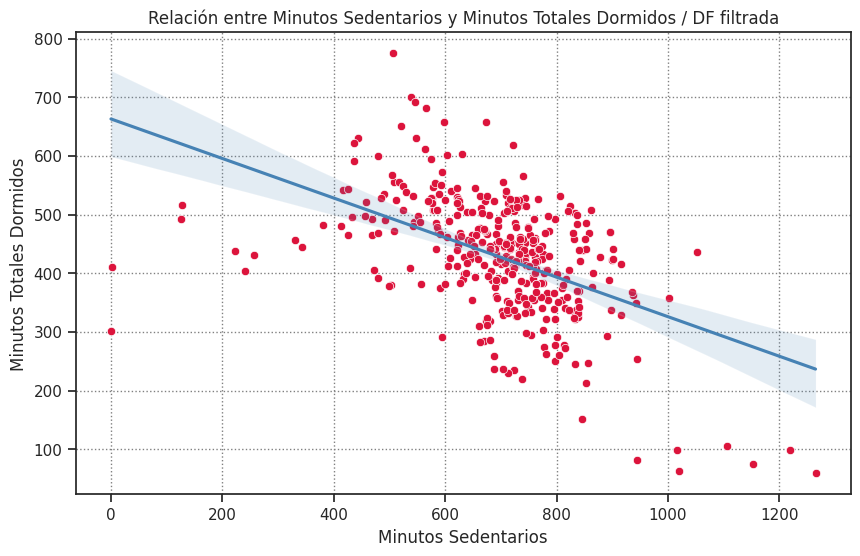

In [177]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Sleep_filtered_Activity, x='SedentaryMinutes', y='TotalMinutesAsleep', color='crimson')
sns.regplot(data=Sleep_filtered_Activity, x='SedentaryMinutes', y='TotalMinutesAsleep', scatter=False, color='steelblue')

# Personalizar el gráfico
plt.title('Relación entre Minutos Sedentarios y Minutos Totales Dormidos / DF filtrada')
plt.xlabel('Minutos Sedentarios')
plt.ylabel('Minutos Totales Dormidos')
plt.grid(which='major', color='grey', linestyle='dotted')
plt.grid(which='minor', color='grey', linestyle='dotted')
plt.gca().set_facecolor('white')

plt.show()


Comparamos las dos regresiones

Original DataFrame:
MSE: 7302.478823459777, RMSE: 85.45454243900541, MAE: 69.16630112050856, R²: 0.3508745224336266
Filtered DataFrame:
MSE: 9741.043481335499, RMSE: 98.69672477511854, MAE: 71.07846336777872, R²: 0.13016300896938848
El modelo original es mejor basado en el R².


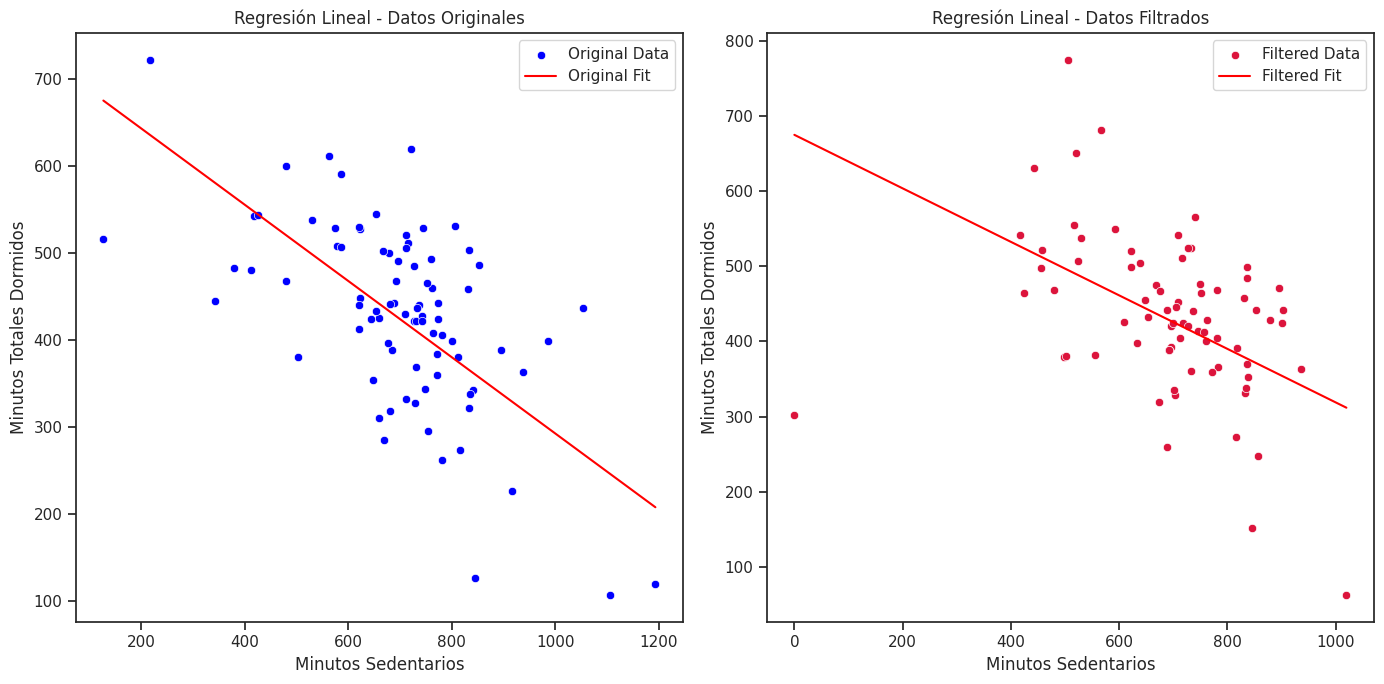

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar los datos
# Reemplaza 'data.csv' con la ruta a tu archivo de datos
df_original = combined_Sleep_Actitity
df_filtered = Sleep_filtered_Activity  # Ejemplo de filtrado

# Definir las variables independientes y dependientes
X_original = df_original[['SedentaryMinutes']]
y_original = df_original['TotalMinutesAsleep']

X_filtered = df_filtered[['SedentaryMinutes']]
y_filtered = df_filtered['TotalMinutesAsleep']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Entrenar los modelos de regresión lineal
model_original = LinearRegression()
model_filtered = LinearRegression()

model_original.fit(X_train_original, y_train_original)
model_filtered.fit(X_train_filtered, y_train_filtered)

# Hacer predicciones
y_pred_original = model_original.predict(X_test_original)
y_pred_filtered = model_filtered.predict(X_test_filtered)

# Evaluar los modelos
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

mse_original, rmse_original, mae_original, r2_original = evaluate_model(y_test_original, y_pred_original)
mse_filtered, rmse_filtered, mae_filtered, r2_filtered = evaluate_model(y_test_filtered, y_pred_filtered)

# Imprimir los resultados
print("Original DataFrame:")
print(f"MSE: {mse_original}, RMSE: {rmse_original}, MAE: {mae_original}, R²: {r2_original}")

print("Filtered DataFrame:")
print(f"MSE: {mse_filtered}, RMSE: {rmse_filtered}, MAE: {mae_filtered}, R²: {r2_filtered}")

# Comparar las métricas y determinar el mejor modelo
if r2_filtered > r2_original:
    print("El modelo filtrado es mejor basado en el R².")
else:
    print("El modelo original es mejor basado en el R².")

# Graficar las regresiones
plt.figure(figsize=(14, 7))

# Datos originales
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_test_original.squeeze(), y=y_test_original, color='blue', label='Original Data')
sns.lineplot(x=X_test_original.squeeze(), y=y_pred_original, color='red', label='Original Fit')
plt.title('Regresión Lineal - Datos Originales')
plt.xlabel('Minutos Sedentarios')
plt.ylabel('Minutos Totales Dormidos')

# Datos filtrados
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test_filtered.squeeze(), y=y_test_filtered, color='crimson', label='Filtered Data')
sns.lineplot(x=X_test_filtered.squeeze(), y=y_pred_filtered, color='red', label='Filtered Fit')
plt.title('Regresión Lineal - Datos Filtrados')
plt.xlabel('Minutos Sedentarios')
plt.ylabel('Minutos Totales Dormidos')

plt.tight_layout()
plt.show()


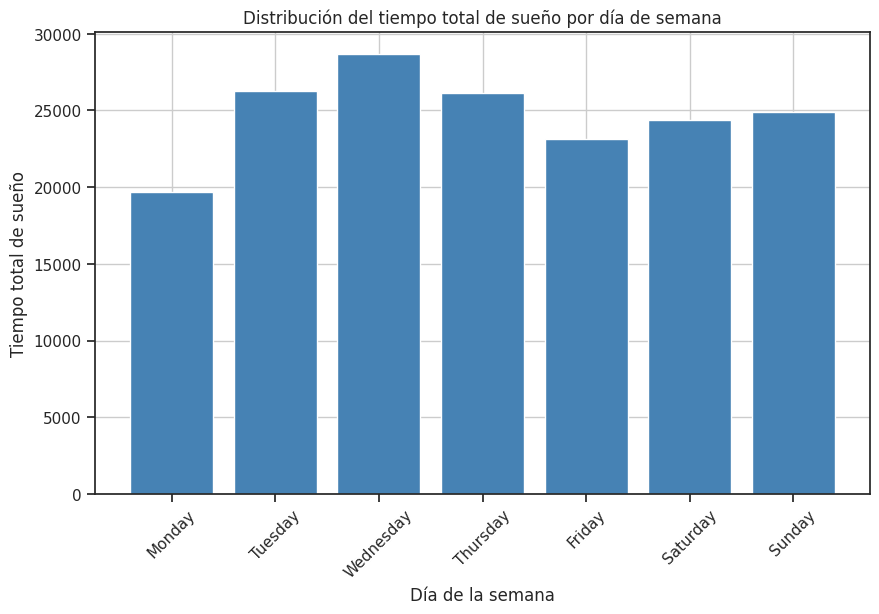

In [179]:
#Distribución del sueño por día con Sleep
#DayOfWeek
#combined_Sleep_Actitity['DayOfWeek'] = combined_Sleep_Actitity['DayOfWeek'].astype('category')
df_weekday = combined_Sleep_Actitity.groupby('DayOfWeek')['TotalMinutesAsleep'].sum().reset_index()
df_weekday
# Ordenar los días de la semana
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_weekday['DayOfWeek'] = pd.Categorical(df_weekday['DayOfWeek'], categories=days_order, ordered=True)
df_weekday = df_weekday.sort_values('DayOfWeek')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_weekday['DayOfWeek'], df_weekday['TotalMinutesAsleep'], color='steelblue')
plt.xlabel('Día de la semana')
plt.ylabel('Tiempo total de sueño')
plt.title('Distribución del tiempo total de sueño por día de semana')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [180]:
#Distribución del sueño por día con Sleep
#DayOfWeek
'''
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
combined_Sleep_Actitity['DayOfWeek'] = combined_Sleep_Actitity['DayOfWeek'].astype(cat_type)

df_weekday = combined_Sleep_Actitity.copy().groupby(combined_Sleep_Actitity['DayOfWeek']).mean().reindex(cats)

df_weekday.filter(['TotalMinutesAsleep'])

df_weekday.plot.bar(xlabel='Day of the Week', ylabel='Promedio de sueño', title='Distribución del descanso', legend=True, rot=0, figsize=(10,5))
plt.show()
#combined_Sleep_Actitity['TotalMinutesAsleep'].plot.bar(xlabel='Day of the Week', ylabel='Promedio de sueño', title='Distribución del descanso', legend=True, rot=0, figsize=(10,5))
#plt.show()
'''

"\ncats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']\ncat_type = CategoricalDtype(categories=cats, ordered=True)\ncombined_Sleep_Actitity['DayOfWeek'] = combined_Sleep_Actitity['DayOfWeek'].astype(cat_type)\n\ndf_weekday = combined_Sleep_Actitity.copy().groupby(combined_Sleep_Actitity['DayOfWeek']).mean().reindex(cats)\n\ndf_weekday.filter(['TotalMinutesAsleep'])\n\ndf_weekday.plot.bar(xlabel='Day of the Week', ylabel='Promedio de sueño', title='Distribución del descanso', legend=True, rot=0, figsize=(10,5))\nplt.show()\n#combined_Sleep_Actitity['TotalMinutesAsleep'].plot.bar(xlabel='Day of the Week', ylabel='Promedio de sueño', title='Distribución del descanso', legend=True, rot=0, figsize=(10,5))\n#plt.show()\n"

Weight

In [181]:
# Asignar niveles de usuario basado en day_used, se crea otra columna de tipo 'category' que asigna un bin
BMI_Summary['user_level'] = pd.cut(BMI_Summary['days_used'],
                                    bins=[0, 10, 20, 32],
                                    labels=["Poco", "Moderado", "Normal"],
                                    include_lowest=True, right=True)
# Ordenar por day_used
BMI_Summary = BMI_Summary.sort_values(by='days_used')

# Mostrar los registros
BMI_Summary

# Agrupar por user_level y contar el número de usuarios en cada nivel
BMI_Summary_level = BMI_Summary.groupby('user_level').size().reset_index(name='total')

# Calcular el total de usuarios
total_users = BMI_Summary_level ['total'].sum()

# Calcular el porcentaje de usuarios en cada nivel
#BMI_Summary_level ['total_percent'] = round(((BMI_Summary_level ['total'] / total_users)*100),2)

BMI_Summary_level


user_level  total
0       Poco      6
1   Moderado      0
2     Normal      2

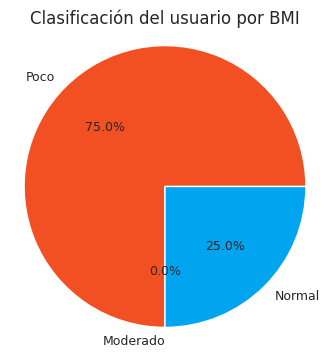

In [182]:
# @title Gráfico Circular de uso Weight
#BMI_Summary_level ['labels'] = (BMI_Summary_level ['total_percent']).map("{:.2f}%".format)

# Crear el gráfico circular
plt.figure(figsize=(4, 4))
plt.pie(BMI_Summary_level ['total'], labels=BMI_Summary_level ['user_level'],
        autopct='%1.1f%%', startangle=0, textprops=dict(fontsize=9), colors=['#F25022','#7FBA00','#00A4EF'] )

# Añadir un título
plt.title('Clasificación del usuario por BMI')

# Mostrar el gráfico
plt.axis('equal')  # Asegura que el gráfico sea un círculo
plt.show()

Código para graficar 3 df simultaneamente


1. Definimos los 3 df, normalizados, mismas columnas
2. Definimmos el gráfico y los subplots



In [183]:
df1 = Activity_summary_level
df2 = Summary_Sleep_level
df3 = BMI_Summary_level

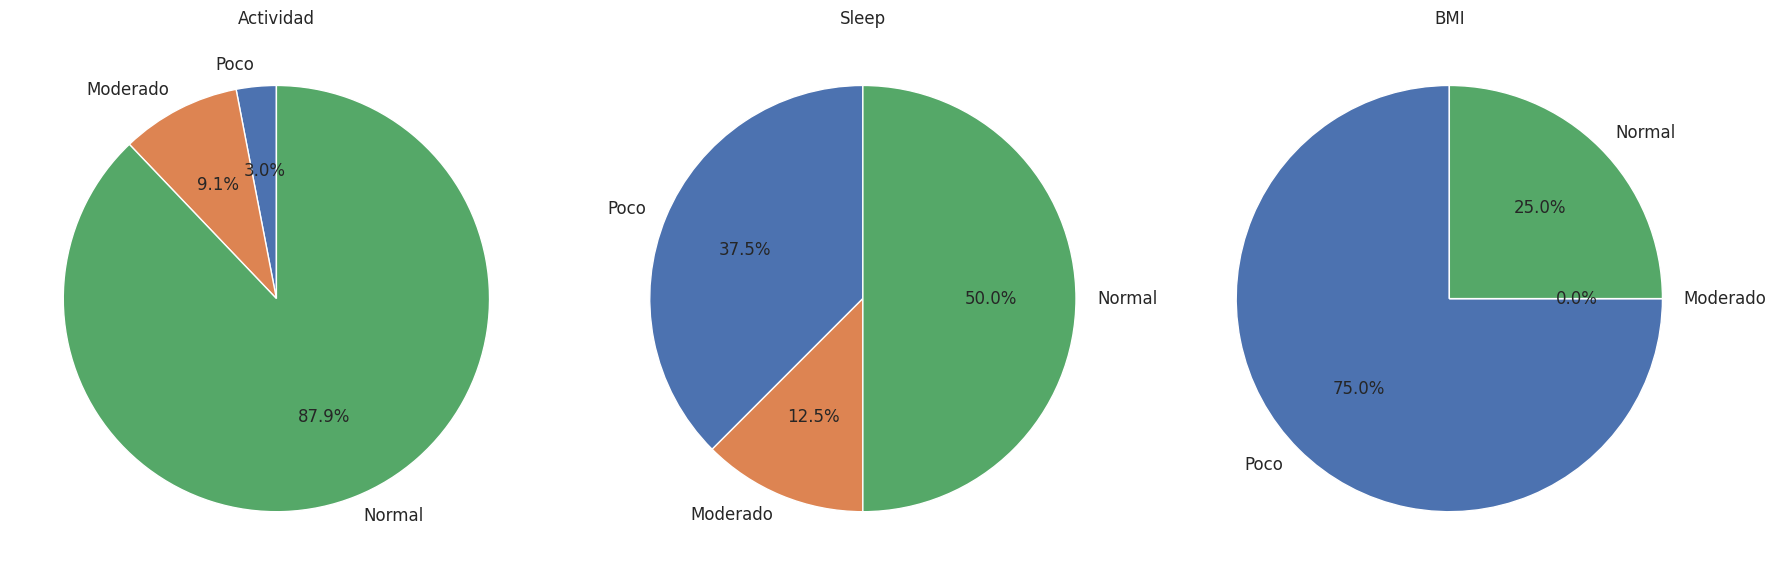

In [184]:
# Configurar la figura y los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico circular 1
axes[0].pie(
    df1['total'], #BMI_Summary_class ['total']
    labels=df1['user_level'], #labels=BMI_Summary_class ['user_class']
    autopct='%1.1f%%',
    startangle=90,
    textprops=dict(fontsize=12)
)
axes[0].set_title('Actividad')

# Gráfico circular 2
axes[1].pie(
    df2['total'],
    labels=df2['user_level'],
    autopct='%1.1f%%',
    startangle=90,
    textprops=dict(fontsize=12)
)
axes[1].set_title('Sleep')

# Gráfico circular 3
axes[2].pie(
    df3['total'],
    labels=df3['user_level'],
    autopct='%1.1f%%',
    startangle=90,
    textprops=dict(fontsize=12)
)
axes[2].set_title('BMI')

# Ajustar el layout para que no haya solapamiento
plt.tight_layout()

# Mostrar los gráficos
plt.show()


## 'Steps'

Importe el archivo de Steps por hora para comparar con el archivo de Steps por día, deberia ser igual la sumatoria de los steps diarios. Hay una ligera diferencia


In [185]:
Stepshourly = pd.read_csv('/content/hourlySteps_merged.csv')

In [186]:
Stepshourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [187]:
Stepshourly.head()

Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160
2  1503960366   4/12/2016 2:00:00 AM        151
3  1503960366   4/12/2016 3:00:00 AM          0
4  1503960366   4/12/2016 4:00:00 AM          0

In [188]:
Stepshourly ['ActivityHour'] = pd.to_datetime(Stepshourly['ActivityHour'], format= '%m/%d/%Y %H:%M:%S %p')
Stepshourly ['Date'] = Stepshourly ['ActivityHour'].dt.date
Stepshourly ['Date'] = pd.to_datetime(Stepshourly ['Date'])

StepsDaily = Stepshourly.groupby(['Id', 'Date']).sum('StepTotal').reset_index()
StepsDaily.head()

Id       Date  StepTotal
0  1503960366 2016-04-12      13158
1  1503960366 2016-04-13      10735
2  1503960366 2016-04-14      10460
3  1503960366 2016-04-15       9685
4  1503960366 2016-04-16      12669

In [189]:
Steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Id           940 non-null    int64         
 1   ActivityDay  940 non-null    datetime64[ns]
 2   StepTotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [190]:
Steps = Steps.rename (columns={'ActivityDay' : 'Date'})
Steps.head()

Id       Date  StepTotal
0  1503960366 2016-04-12      13162
1  1503960366 2016-04-13      10735
2  1503960366 2016-04-14      10460
3  1503960366 2016-04-15       9762
4  1503960366 2016-04-16      12669

In [191]:
Combined_steps = pd.merge(Steps, StepsDaily, on=('Id', 'Date')) # how='outer'
Combined_steps

Id       Date  StepTotal_x  StepTotal_y
0    1503960366 2016-04-12        13162        13158
1    1503960366 2016-04-13        10735        10735
2    1503960366 2016-04-14        10460        10460
3    1503960366 2016-04-15         9762         9685
4    1503960366 2016-04-16        12669        12669
..          ...        ...          ...          ...
929  8877689391 2016-05-08        10686        10665
930  8877689391 2016-05-09        20226        20156
931  8877689391 2016-05-10        10733        10693
932  8877689391 2016-05-11        21420        21391
933  8877689391 2016-05-12         8064         7577

[934 rows x 4 columns]

Con el archivo de los Steps por hora **'StepsHourly'** se podría estudiar el **comportamiento diario de la actividad** por usuario.

Sin embargo, la diferencia que arroja la cantidad total de pasos dados por dia es muy alta en varios casos.

El df de **'Steps'** diarios es más confiable al regristrar mayor cantidad de datos, nos vendrá bien para analizar el **comportamiento en una semana o en un mes.**

In [192]:
Combined_steps ['Dif_Steps'] = Combined_steps['StepTotal_x'] - Combined_steps['StepTotal_y']
Combined_steps

Id       Date  StepTotal_x  StepTotal_y  Dif_Steps
0    1503960366 2016-04-12        13162        13158          4
1    1503960366 2016-04-13        10735        10735          0
2    1503960366 2016-04-14        10460        10460          0
3    1503960366 2016-04-15         9762         9685         77
4    1503960366 2016-04-16        12669        12669          0
..          ...        ...          ...          ...        ...
929  8877689391 2016-05-08        10686        10665         21
930  8877689391 2016-05-09        20226        20156         70
931  8877689391 2016-05-10        10733        10693         40
932  8877689391 2016-05-11        21420        21391         29
933  8877689391 2016-05-12         8064         7577        487

[934 rows x 5 columns]

In [193]:
# @title Summary Steps 1
Summary_Steps1 = Steps.groupby(['Id']).agg(
    Days = ('Id', 'size'),
    StepTotal = ('StepTotal', 'sum')
    )
Summary_Steps1

Days  StepTotal
Id                         
1503960366    31     375619
1624580081    31     178061
1644430081    30     218489
1844505072    31      79982
1927972279    31      28400
2022484408    31     352490
2026352035    31     172573
2320127002    31     146223
2347167796    18     171354
2873212765    31     234229
3372868164    20     137233
3977333714    30     329537
4020332650    31      70284
4057192912     4      15352
4319703577    31     225334
4388161847    31     335232
4445114986    31     148693
4558609924    31     238239
4702921684    31     265734
5553957443    31     266990
5577150313    30     249133
6117666160    28     197308
6290855005    29     163837
6775888955    26      65512
6962181067    31     303639
7007744171    26     294409
7086361926    31     290525
8053475328    31     457662
8253242879    19     123161
8378563200    31     270249
8583815059    31     223154
8792009665    29      53758
8877689391    31     497241

In [194]:
# @title Summary Steps 2
Summary_Steps2 = StepsDaily.groupby(['Id']).agg(
    Days = ('Id', 'size'),
    StepTotal = ('StepTotal', 'sum')
    )
Summary_Steps2

Days  StepTotal
Id                         
1503960366    30     374546
1624580081    31     177750
1644430081    30     217927
1844505072    31      79942
1927972279    31      28400
2022484408    31     351712
2026352035    31     172068
2320127002    31     146035
2347167796    18     171337
2873212765    31     234130
3372868164    20     137057
3977333714    29     328244
4020332650    31      68399
4057192912     4      15305
4319703577    31     209464
4388161847    31     319765
4445114986    31     148548
4558609924    31     237909
4702921684    31     265559
5553957443    31     266906
5577150313    30     248519
6117666160    28     185673
6290855005    28     163678
6775888955    26      65371
6962181067    31     303621
7007744171    26     294409
7086361926    31     287503
8053475328    31     457463
8253242879    18     122838
8378563200    31     269705
8583815059    30     176200
8792009665    28      53750
8877689391    31     495623

In [197]:
Promedio_Registro_steps = Summary_Steps1['Days'].mean()
print(Promedio_Registro_steps)

28.484848484848484


### Extraemos el dia de la semana
De ambos dataframes, el hourly y del diario

In [198]:
StepsDaily ['DayOfWeek'] = StepsDaily ['Date'].dt.day_name()
Steps ['DayOfWeek'] = Steps ['Date'].dt.day_name()

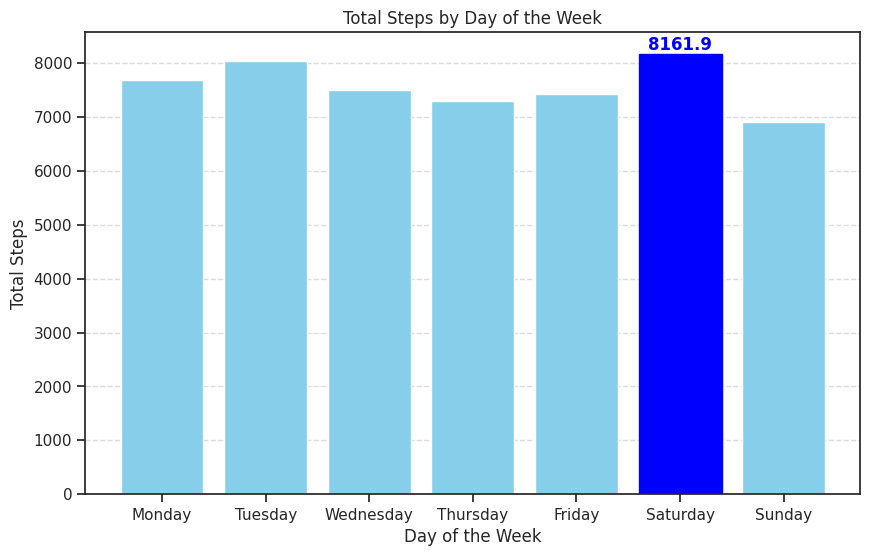

In [199]:
step_data = StepsDaily

# Group by day of the week and calculate the total steps
step_summary = step_data.groupby('DayOfWeek')['StepTotal'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Identify the day with the maximum total steps
max_step_day = step_summary.idxmax()
max_step_value = round(step_summary.max(), 2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(step_summary.index, step_summary.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.title('Total Steps by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight the bar with the maximum value
for bar in bars:
    if bar.get_x() + bar.get_width() / 2 == step_summary.index.get_loc(max_step_day):
        bar.set_color('blue')
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{max_step_value}',
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')

plt.show()


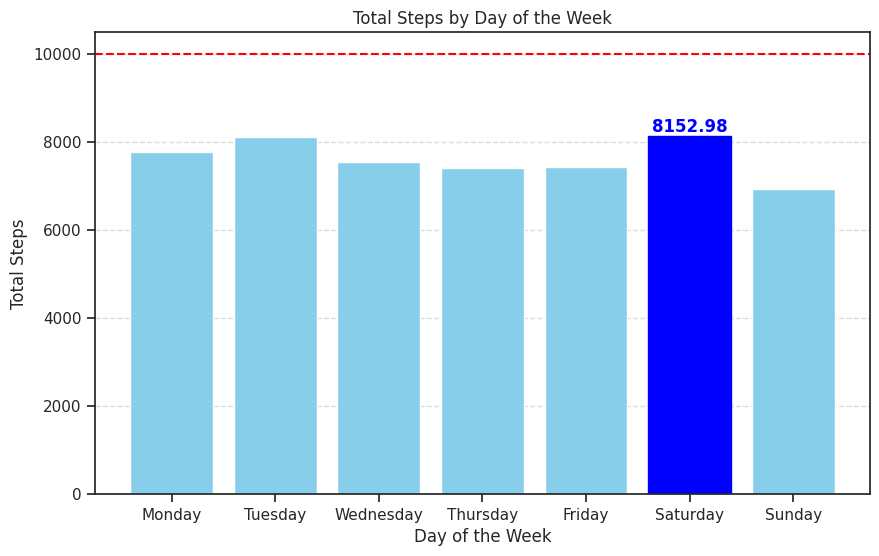

In [200]:
step_data = Steps

# Group by day of the week and calculate the total steps
step_summary = step_data.groupby('DayOfWeek')['StepTotal'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Identify the day with the maximum total steps
max_step_day = step_summary.idxmax()
max_step_value = round(step_summary.max(), 2)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(step_summary.index, step_summary.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Steps')
plt.title('Total Steps by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=10000, color='red', linestyle='--')

# Highlight the bar with the maximum value
for bar in bars:
    if bar.get_x() + bar.get_width() / 2 == step_summary.index.get_loc(max_step_day):
        bar.set_color('blue')
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{max_step_value}',
                 ha='center', va='bottom', fontsize=12, fontweight='bold', color='blue')

plt.show()


In [201]:
combined_step_Activity = pd.merge(Activity, Steps, on=('Id', 'Date'))
combined_step_Activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   Date                      940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [202]:
columns_to_eliminate = combined_step_Activity[['TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'SedentaryActiveDistance','LightActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes' ]]
combined_step_Activity = combined_step_Activity.drop(columns_to_eliminate, axis = 1)
combined_step_Activity.head(10)

Id       Date  TotalSteps  Calories  StepTotal  DayOfWeek
0  1503960366 2016-04-12       13162      1985      13162    Tuesday
1  1503960366 2016-04-13       10735      1797      10735  Wednesday
2  1503960366 2016-04-14       10460      1776      10460   Thursday
3  1503960366 2016-04-15        9762      1745       9762     Friday
4  1503960366 2016-04-16       12669      1863      12669   Saturday
5  1503960366 2016-04-17        9705      1728       9705     Sunday
6  1503960366 2016-04-18       13019      1921      13019     Monday
7  1503960366 2016-04-19       15506      2035      15506    Tuesday
8  1503960366 2016-04-20       10544      1786      10544  Wednesday
9  1503960366 2016-04-21        9819      1775       9819   Thursday

La suma del total de pasos por usuario coincide en los dos df: 'Steps' y 'Activity'

Analizando 'Activity' ya no tenemos que volver al df de 'Steps'
